# Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import f_oneway

## Input dataset

In [ ]:
df = pd.read_csv('/content/employee_churn_prediction_updated.csv')

In [ ]:
display(df.head(10))

employee_id  age  gender    education  experience_years  monthly_target  \
0            1   28    Male  High School                 0             153   
1            2   41    Male      Diploma                 6             188   
2            3   36  Female  High School                 8             159   
3            4   32    Male      Diploma                 7             185   
4            5   29  Female  High School                 7             142   
5            6   42    Male      Diploma                 5             143   
6            7   28  Female     Bachelor                 3             105   
7            8   40    Male     Bachelor                 7             109   
8            9   44    Male      Diploma                 2             187   
9           10   32    Male      Diploma                 8              88   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   
5                0.73                      62                       16   
6                0.92                      43                       18   
7                0.86                      54                        1   
8                0.42                      63                        1   
9                1.19                      64                        5   

    salary  commission_rate  job_satisfaction work_location  \
0  4667108             0.03                 4      Suburban   
1  5853507             0.06                 3         Urban   
2  4781336             0.07                 1         Urban   
3  3624588             0.05                 1         Urban   
4  5154327             0.08                 3         Rural   
5  7070081             0.06                 3         Urban   
6  4150127             0.03                 3      Suburban   
7  7999712             0.04                 2         Urban   
8  5489913             0.09                 1         Urban   
9  6917000             0.08                 1         Urban   

   manager_support_score  company_tenure_years  churn marital_status  \
0                      3                   2.8      0        Married   
1                      3                   2.7      1         Single   
2                      2                   1.7      1         Single   
3                      2                   0.5      1        Married   
4                      2                   4.5      0         Single   
5                      2                   4.0      0         Single   
6                      2                   0.8      0         Single   
7                      1                   3.9      0         Single   
8                      2                   3.2      1         Single   
9                      4                   2.1      0        Married   

   distance_to_office_km churn_period  
0                     22       Stayed  
1                     36   Onboarding  
2                     17   Onboarding  
3                     32   Onboarding  
4                     14       Stayed  
5                     42       Stayed  
6                     29       Stayed  
7                      6       Stayed  
8                      4      1 Month  
9                     11       Stayed

## Handling type data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

### Type data is already correct !!

## Missing values

In [ ]:
display(df.isnull().sum())

employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64

### No missing values in the dataset

## Duplicated data

In [ ]:
display(df.duplicated().sum())

np.int64(0)

### There's no duplicated data in dataset

## Outliers

In [ ]:
display(df.describe())

employee_id          age  experience_years  monthly_target  \
count  1000.000000  1000.000000       1000.000000     1000.000000   
mean    500.500000    32.845000          4.495000      125.877000   
std     288.819436     6.854046          2.890732       43.895748   
min       1.000000    22.000000          0.000000       50.000000   
25%     250.750000    27.000000          2.000000       86.750000   
50%     500.500000    33.000000          5.000000      127.500000   
75%     750.250000    39.000000          7.000000      164.000000   
max    1000.000000    44.000000          9.000000      199.000000   

       target_achievement  working_hours_per_week  overtime_hours_per_week  \
count          1000.00000             1000.000000              1000.000000   
mean              0.79188               54.102000                 9.508000   
std               0.22872                8.721907                 5.739066   
min               0.40000               40.000000                 0.000000   
25%               0.59000               46.000000                 5.000000   
50%               0.79000               54.000000                 9.500000   
75%               0.99000               62.000000                15.000000   
max               1.20000               69.000000                19.000000   

             salary  commission_rate  job_satisfaction  manager_support_score  \
count  1.000000e+03      1000.000000       1000.000000             1000.00000   
mean   5.487914e+06         0.058830          2.524000                2.53200   
std    1.436482e+06         0.023278          1.125474                1.11724   
min    3.000037e+06         0.020000          1.000000                1.00000   
25%    4.258970e+06         0.040000          2.000000                2.00000   
50%    5.471270e+06         0.060000          3.000000                3.00000   
75%    6.727894e+06         0.080000          4.000000                4.00000   
max    7.999712e+06         0.100000          4.000000                4.00000   

       company_tenure_years        churn  distance_to_office_km  
count            1000.00000  1000.000000            1000.000000  
mean                2.59800     0.629000              24.119000  
std                 1.40282     0.483314              13.978062  
min                 0.10000     0.000000               1.000000  
25%                 1.40000     0.000000              12.000000  
50%                 2.60000     1.000000              23.500000  
75%                 3.80000     1.000000              36.000000  
max                 5.00000     1.000000              49.000000

In [ ]:
# IDENTIFIKASI KOLOM NUMERIK
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Drop kolom yang tidak relevan untuk analisis outlier
for col in ['employee_id', 'churn','']:
    if col in num_cols:
        num_cols.remove(col)

print("Kolom numerik yang akan dianalisis untuk outlier:")
print(num_cols)

Kolom numerik yang akan dianalisis untuk outlier:
['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'distance_to_office_km']


In [ ]:
# 3. OUTLIER
# Buat DataFrame untuk menyimpan jumlah outlier per kolom
outlier_summary = pd.DataFrame(columns=["column", "outlier_count", "total_data", "percent_outlier"])

for col in num_cols:
    if df[col].dtype in [np.float64, np.int64]:  # hanya numerik
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = (z_scores > 3)
        count_out = outliers.sum()
        total = df[col].notna().sum()
        percent = round((count_out / total) * 100, 2)
        outlier_summary = pd.concat([outlier_summary, pd.DataFrame({
            "column": [col],
            "outlier_count": [count_out],
            "total_data": [total],
            "percent_outlier": [percent]
        })], ignore_index=True)

# Tampilkan ringkasan jumlah outlier per kolom
display(outlier_summary.sort_values(by="percent_outlier", ascending=False))

/tmp/ipython-input-2271221977.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([outlier_summary, pd.DataFrame({


column outlier_count total_data  percent_outlier
0                       age             0       1000              0.0
1          experience_years             0       1000              0.0
2            monthly_target             0       1000              0.0
3        target_achievement             0       1000              0.0
4    working_hours_per_week             0       1000              0.0
5   overtime_hours_per_week             0       1000              0.0
6                    salary             0       1000              0.0
7           commission_rate             0       1000              0.0
8          job_satisfaction             0       1000              0.0
9     manager_support_score             0       1000              0.0
10     company_tenure_years             0       1000              0.0
11    distance_to_office_km             0       1000              0.0

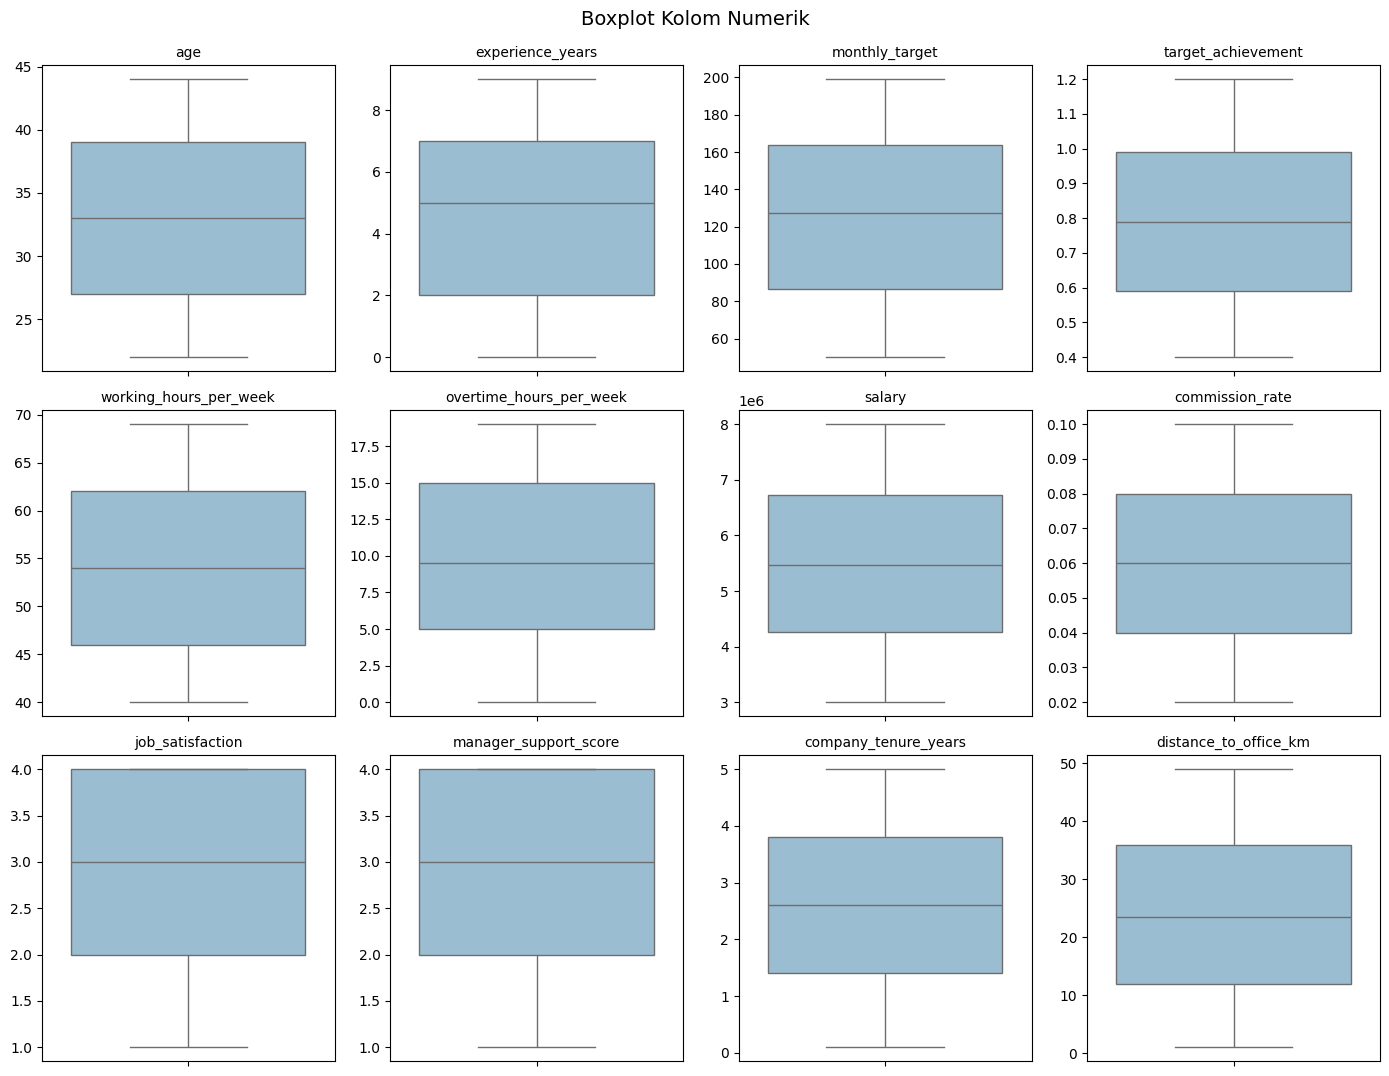

In [ ]:
# Visualisasi boxplot untuk kolom numerik
top_cols = outlier_summary.sort_values(by="percent_outlier", ascending=False)["column"]

# Tentukan jumlah subplot per baris (misal 3x3 grid)
n_cols = 4
n_rows = int(np.ceil(len(top_cols) / n_cols))

# Buat figure grid untuk boxplot
plt.figure(figsize=(3.5 * n_cols, 3.5 * n_rows))

for i, col in enumerate(top_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='#91bfdb', orient='v')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Boxplot Kolom Numerik", fontsize=14, y=1.02)
plt.show()

### The dataset its actually good and there's no extreme outliers in dataset

## Inconsistent data

In [ ]:
print(df['work_location'].value_counts())
print(df['education'].value_counts())
print(df['gender'].value_counts())
print(df['marital_status'].value_counts())

work_location
Urban       500
Suburban    305
Rural       195
Name: count, dtype: int64
education
Diploma        404
High School    299
Bachelor       297
Name: count, dtype: int64
gender
Male      703
Female    297
Name: count, dtype: int64
marital_status
Single     606
Married    394
Name: count, dtype: int64


### From the data extracts, the categories seem consistence

## Anomaly detection

### Anomaly 1 : Work Experience vs. Age is Illogical

There is data where an employee's age is not proportional to their work experience.
For example, someone is 25 years old but has 10 years of work experience, which means they started working full-time at the age of 15.
Although possible, this is highly unusual in the context of professional data.

In [ ]:
# membuat kolum sementara
df['approx_start_age'] = df['age'] - df['experience_years']
unreasonable_start_age_data = df[df['approx_start_age'] < 18]

if unreasonable_start_age_data.empty:
    print("Tidak ada data anomali yang ditemukan dengan kriteria usia mulai bekerja < 18 tahun.")
else:
    # Menampilkan hanya kolom yang relevan agar mudah dibaca
    print("Ditemukan baris-baris berikut yang dianggap anomali:")
    print(unreasonable_start_age_data[['employee_id', 'age', 'experience_years', 'approx_start_age']])


Ditemukan baris-baris berikut yang dianggap anomali:
     employee_id  age  experience_years  approx_start_age
17            18   23                 8                15
20            21   23                 7                16
35            36   24                 7                17
70            71   23                 7                16
90            91   22                 9                13
..           ...  ...               ...               ...
959          960   22                 7                15
968          969   22                 8                14
981          982   22                 6                16
982          983   26                 9                17
999         1000   23                 6                17

[74 rows x 4 columns]


In [ ]:
# PENANGANAN: Hapus baris anomali
initial_rows = len(df)
df = df[df['approx_start_age'] >= 18]
cleaned_rows = len(df)
print(f"\n[PENANGANAN] Anomali 2 telah ditangani: {initial_rows - cleaned_rows} baris dengan usia/pengalaman tidak logis telah dihapus.")


[PENANGANAN] Anomali 2 telah ditangani: 74 baris dengan usia/pengalaman tidak logis telah dihapus.


In [ ]:
# Menghapus kolom bantu
df = df.drop(columns=['approx_start_age'])

In [ ]:
print(f"Jumlah baris data akhir setelah pembersihan: {len(df)}")

Jumlah baris data akhir setelah pembersihan: 926


For the illogical Age vs. Experience data anomaly, it is better to delete it, because we cannot guess the correct value and the amount is likely to be small.

# Exploratory Data Analysis (EDA)

In [ ]:
#DATASET OVERVIEW
# =====================================================
print("=== DATASET OVERVIEW ===")
print(f"Jumlah baris dan kolom: {df.shape}")

=== DATASET OVERVIEW ===
Jumlah baris dan kolom: (926, 19)



Target column terdeteksi: 'churn'
churn
1    585
0    341
Name: count, dtype: int64


/tmp/ipython-input-1915858118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


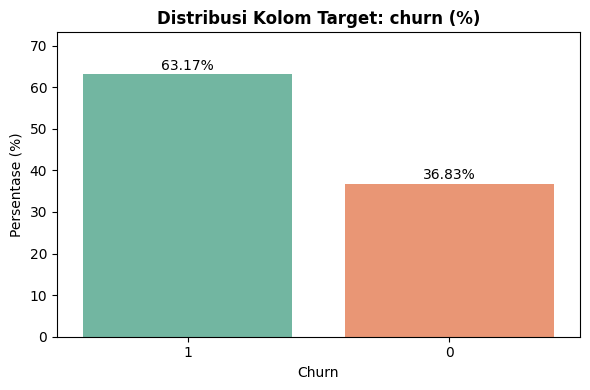

In [ ]:
# IDENTIFIKASI TARGET DAN CEK DISTRIBUSINYA
target_col = 'churn'

if target_col in df.columns:
    print(f"\nTarget column terdeteksi: '{target_col}'")

    # Hitung distribusi dalam jumlah
    target_counts = df[target_col].value_counts()
    print(target_counts)

    # Hitung distribusi dalam persen
    target_pct = df[target_col].value_counts(normalize=True) * 100

    # Visualisasi distribusi target dalam persen
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=target_pct.index.astype(str),
        y=target_pct.values,
        palette="Set2"   # Warna berbeda untuk tiap bar
    )

    plt.title(f"Distribusi Kolom Target: {target_col} (%)", fontsize=12, weight='bold')
    plt.xlabel(target_col.capitalize())
    plt.ylabel("Persentase (%)")
    plt.ylim(0, target_pct.max() + 10)  # Tambahkan ruang untuk label di atas bar
    plt.xticks(rotation=0)

    # Tambahkan label persen di atas tiap bar
    for i, val in enumerate(target_pct.values):
        plt.text(i, val + 1, f"{val:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("❌ Kolom target tidak ditemukan, silakan tentukan secara manual.")

In [ ]:
# Pisahkan fitur numerik dan kategorikal, dengan pengecualian kolom tertentu
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Keluarkan kolom yang tidak relevan dari masing-masing list
if 'employee_id' in numeric_features:
    numeric_features.remove('employee_id')

if 'churn_period' in categorical_features:
    categorical_features.remove('churn_period')

# Tampilkan hasil akhir untuk verifikasi
print("Fitur numerik:", numeric_features)
print("Fitur kategorikal:", categorical_features)

Fitur numerik: ['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'churn', 'distance_to_office_km']
Fitur kategorikal: ['gender', 'education', 'work_location', 'marital_status']


In [ ]:
# Pisahkan fitur selain target, dan drop kolom employee_id serta churn_period
X = df.drop(columns=[target_col, 'employee_id', 'churn_period'], errors='ignore')
y = df[target_col]

# Konversi kategorikal ke numerik sementara untuk perhitungan Mutual Information
X_encoded = X.copy()
for col in categorical_features:
    if col in X_encoded.columns:  # pastikan kolom masih ada di fitur
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Data Visualization & Analysis

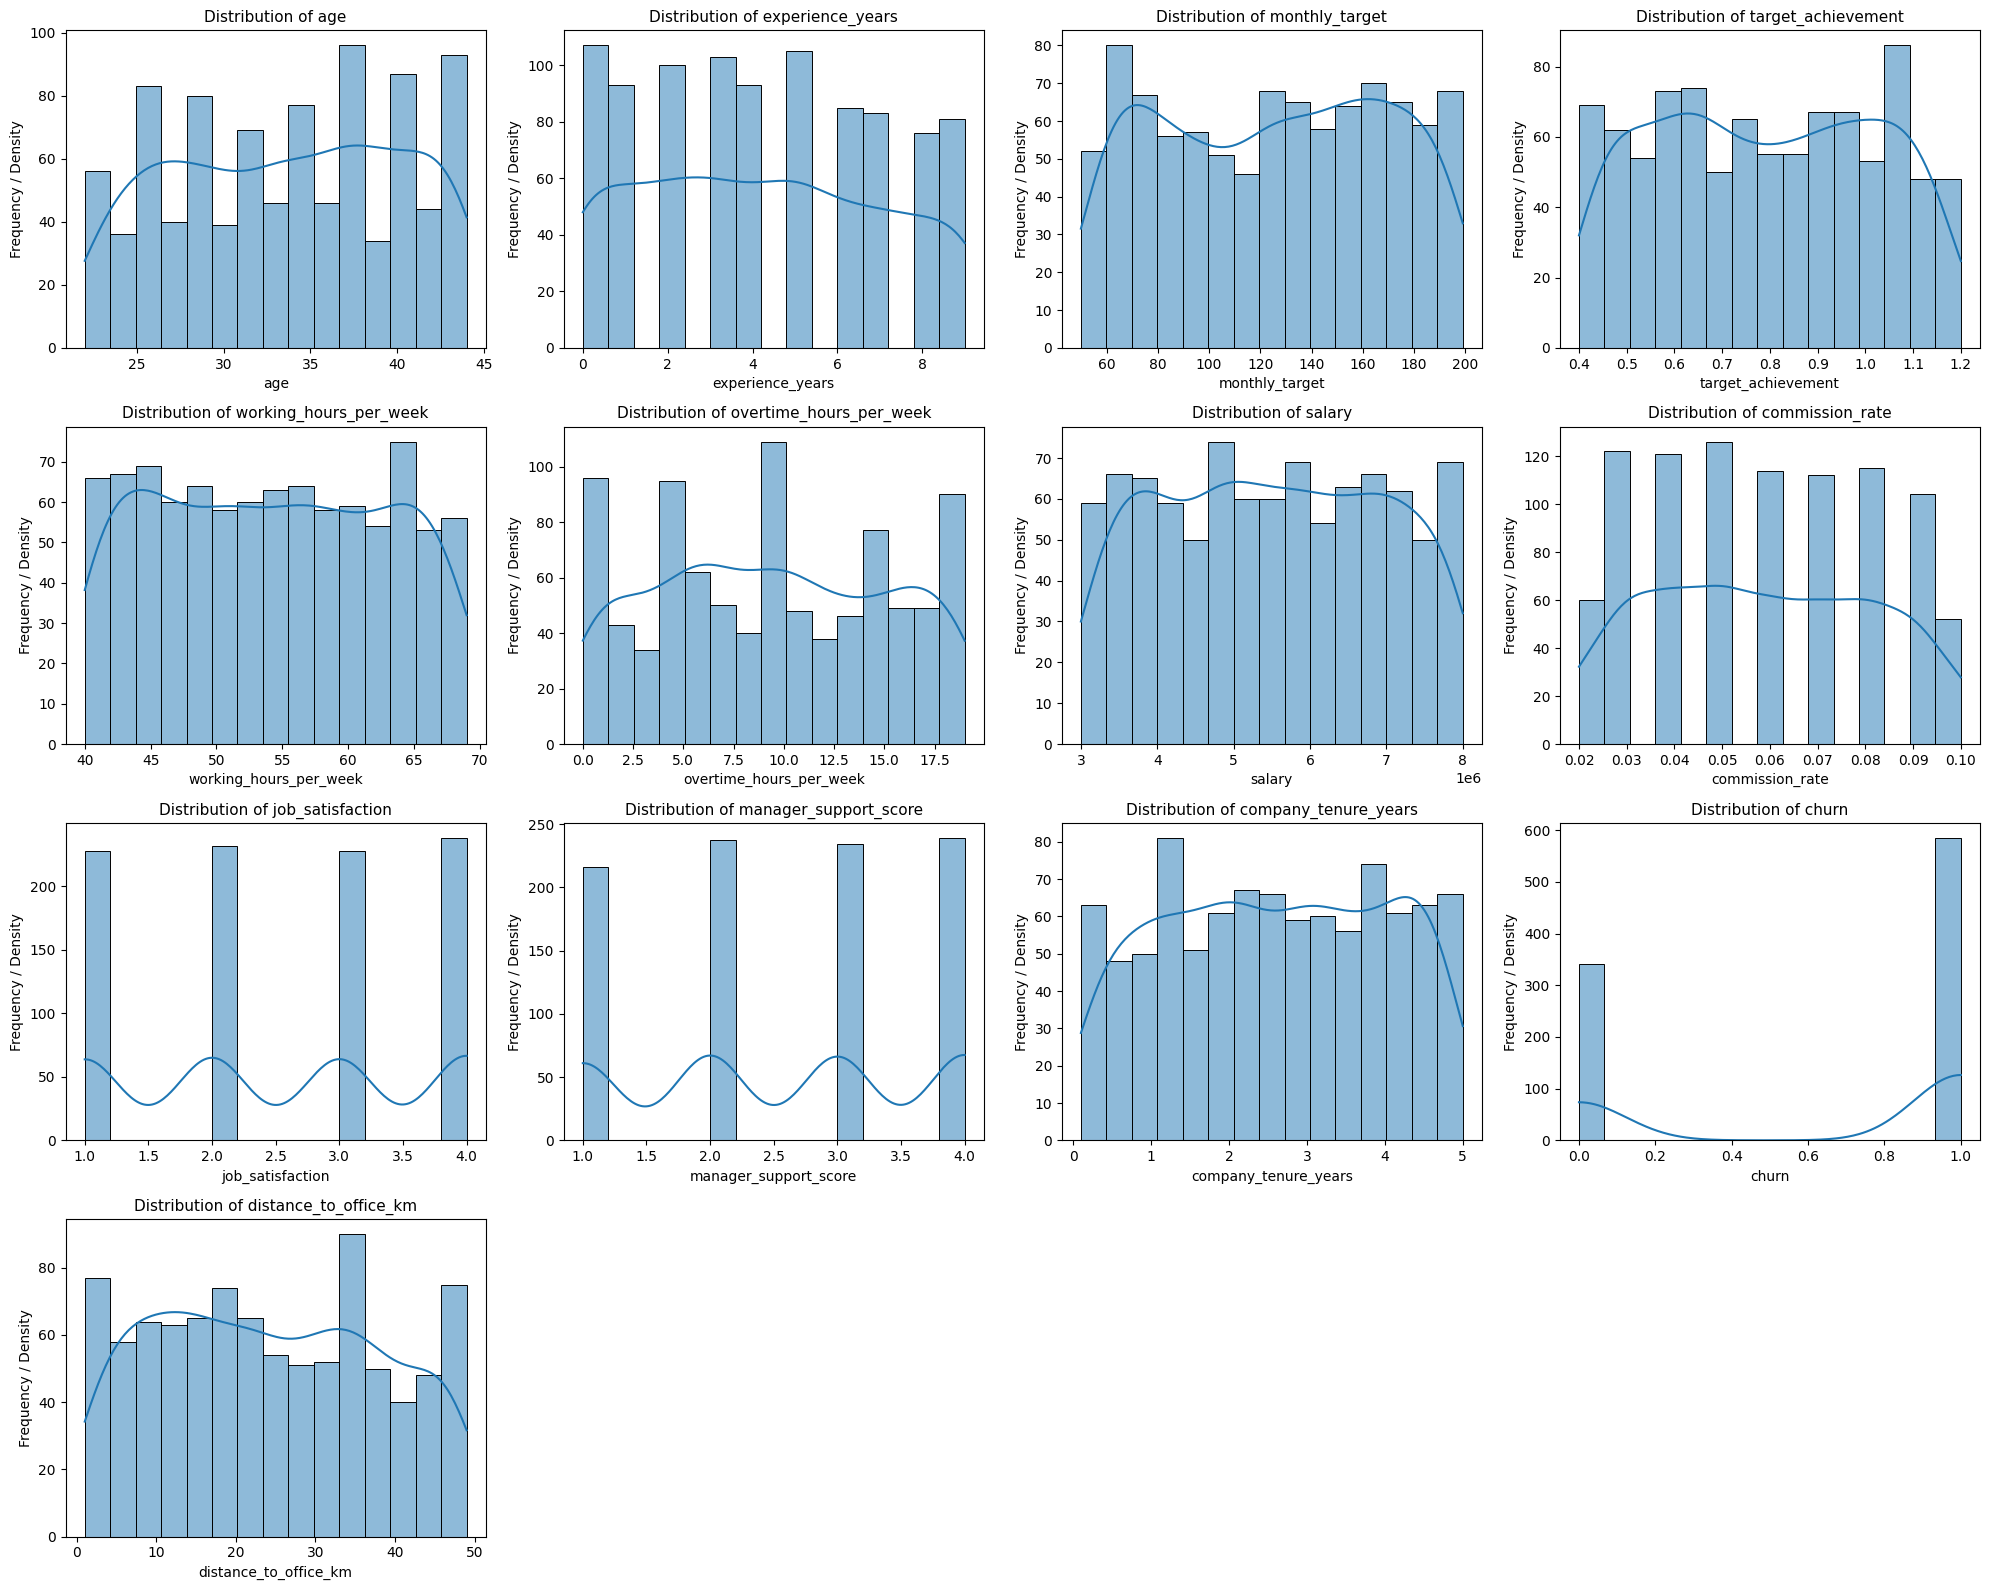

In [ ]:
# Visualisasi Univariate Analysis
n_cols = 4
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

# --- Plot Hist & KDE ---
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, bins=15, kde=True, ax=ax, edgecolor='black', linewidth=0.7)
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')

plt.tight_layout()
plt.show()

The visualization above shows that the data distribution exhibits a multimodal pattern (many peaks). This indicates that the data has characteristics or is diverse. This pattern also indicates that the data likely consists of several distinct population subgroups with non-uniform behavior.

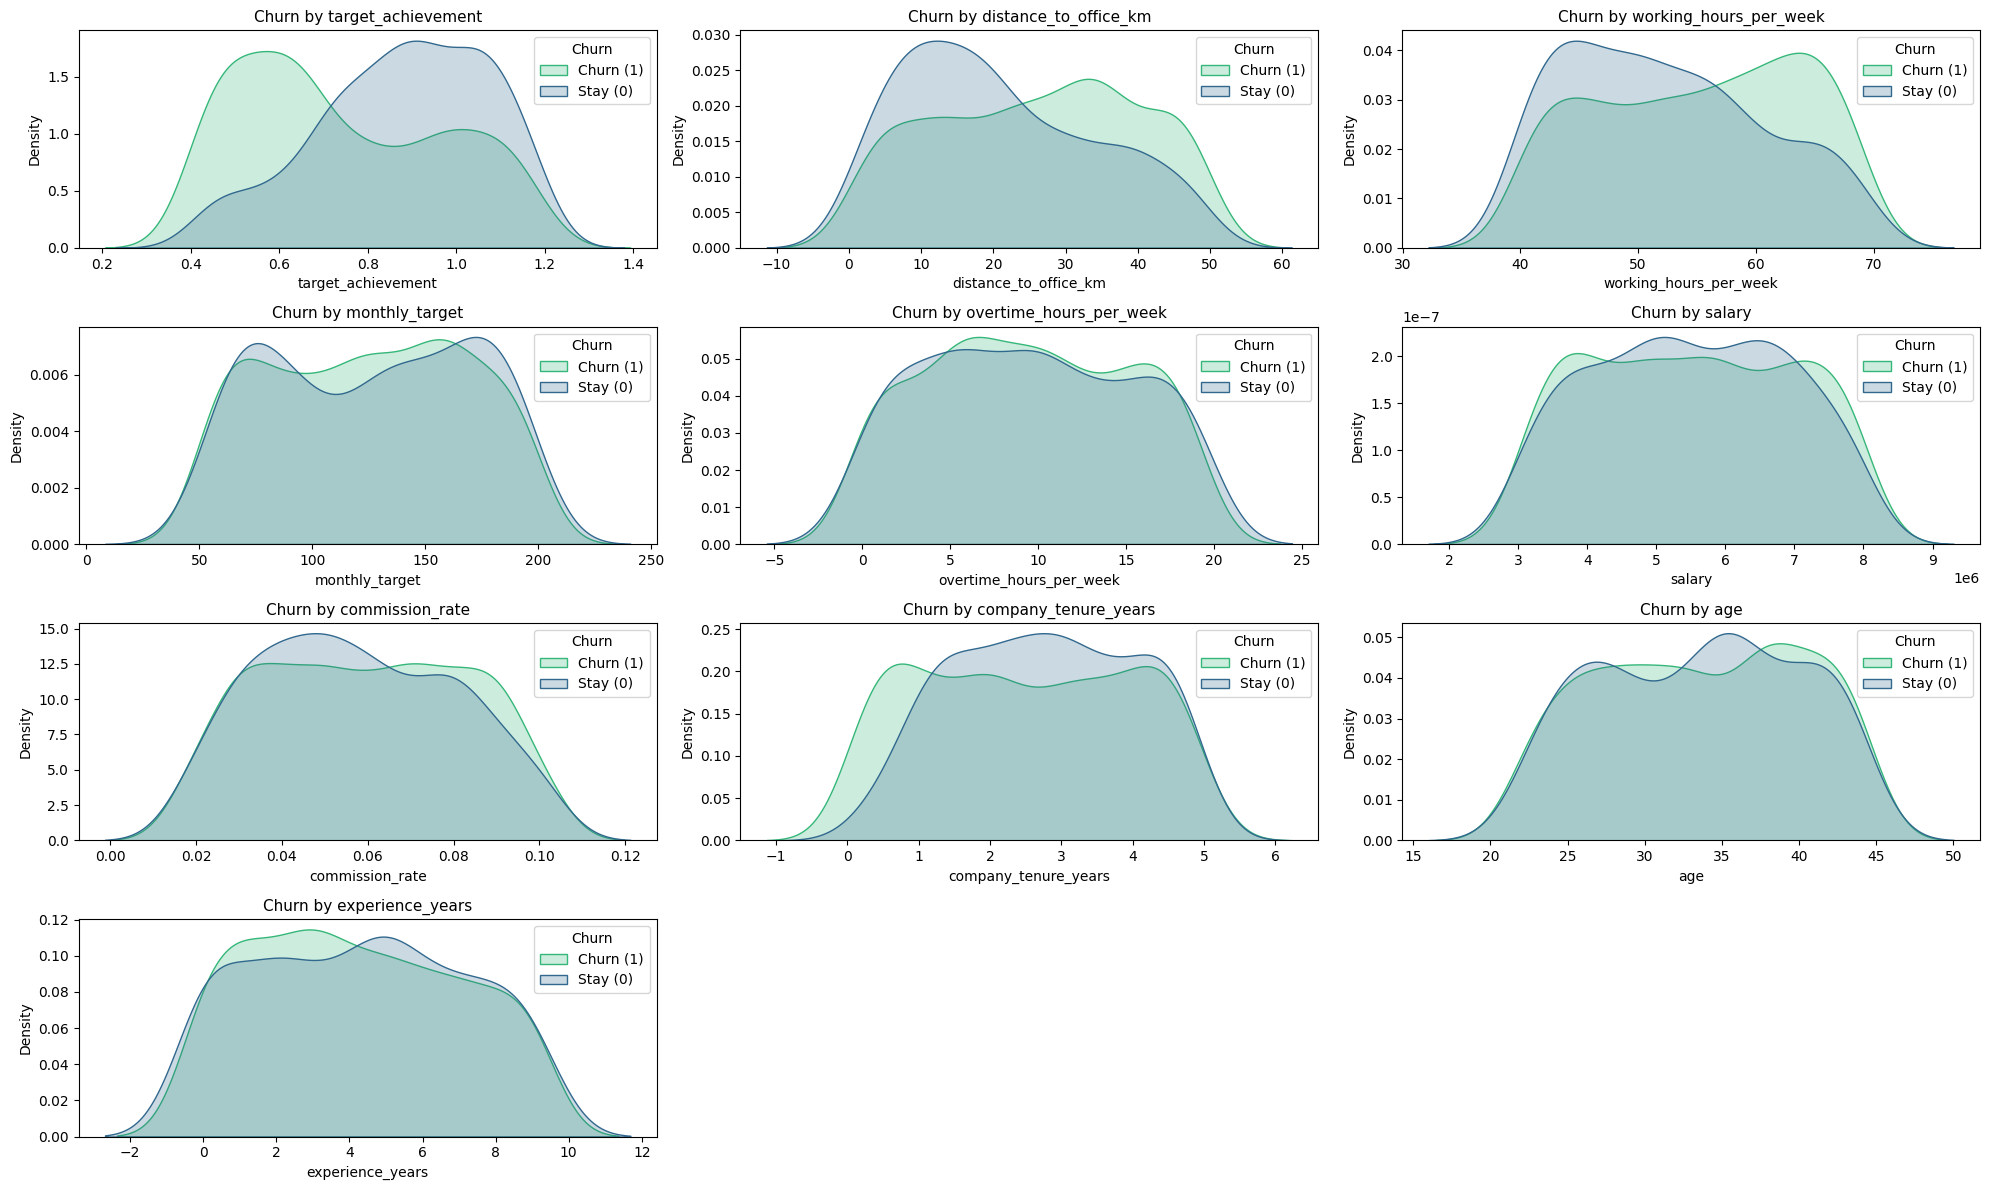

In [ ]:
# Visualisasi Multivariate Analysis

# --- Pastikan kolom salary & commission_rate numerik ---
df['salary'] = df['salary'].replace('[^0-9.]', '', regex=True).astype(float)
df['commission_rate'] = df['commission_rate'].replace('%', '', regex=True).astype(float)

# --- Daftar kolom yang ingin diplot ---
features_to_plot_kde = [
    'target_achievement', 'distance_to_office_km', 'working_hours_per_week',
    'monthly_target', 'overtime_hours_per_week', 'salary', 'commission_rate',
    'company_tenure_years', 'age', 'experience_years'
]

# --- Pastikan semua kolom numerik ---
numeric_cols = [col for col in features_to_plot_kde if pd.api.types.is_numeric_dtype(df[col])]

# --- Plot KDE ---
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Churn by {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Churn (1)', 'Stay (0)'])

plt.tight_layout()
plt.show()

In general, the factors that clearly drive employee churn are target achievement, distance to the office, and weekly working hours.

Other factors that appear to have an influence include commission rate, work experience and length of service with the company.

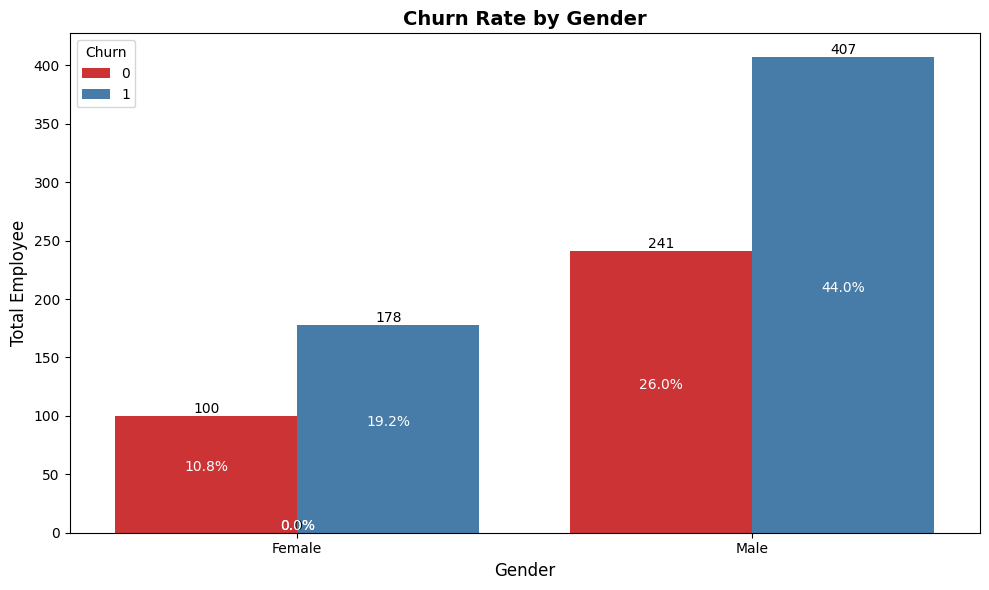

In [ ]:
# Multivariate Gender

gender_churn = df.groupby('gender')['churn'].value_counts(normalize=False).rename('employee').reset_index()
total = len(df)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='employee', hue='churn', data=gender_churn, palette='Set1')

plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  gender_churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{gender_churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Male employees are the most likely to churn or leaves. However, the churn rate between male and female employees is very small or almost insignificant.

This means that gender is not the primary factor determining whether an employee leaves or not.

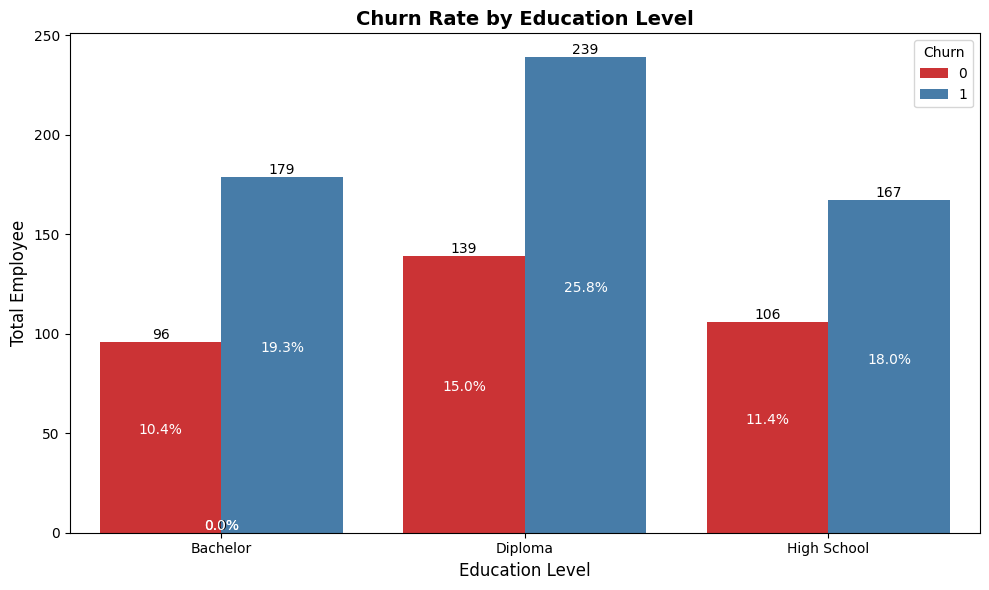

In [ ]:
# Multivariate Education

education_churn = df.groupby('education')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y='employee', hue='churn', data=education_churn, palette='Set1')

plt.title('Churn Rate by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)

for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.legend(title='Churn')
plt.tight_layout()
plt.show()

* Highest Risk: Employees with a Bachelor's degree (S1) have the highest likelihood of leaving (65.1%)

* Highest Volume: Despite their relatively moderate churn rate, employees with a Diploma contributed the largest churn volume (239 people) because they are the largest employee group.

* Lowest Risk: Employees with a High School education have the lowest risk of churn.

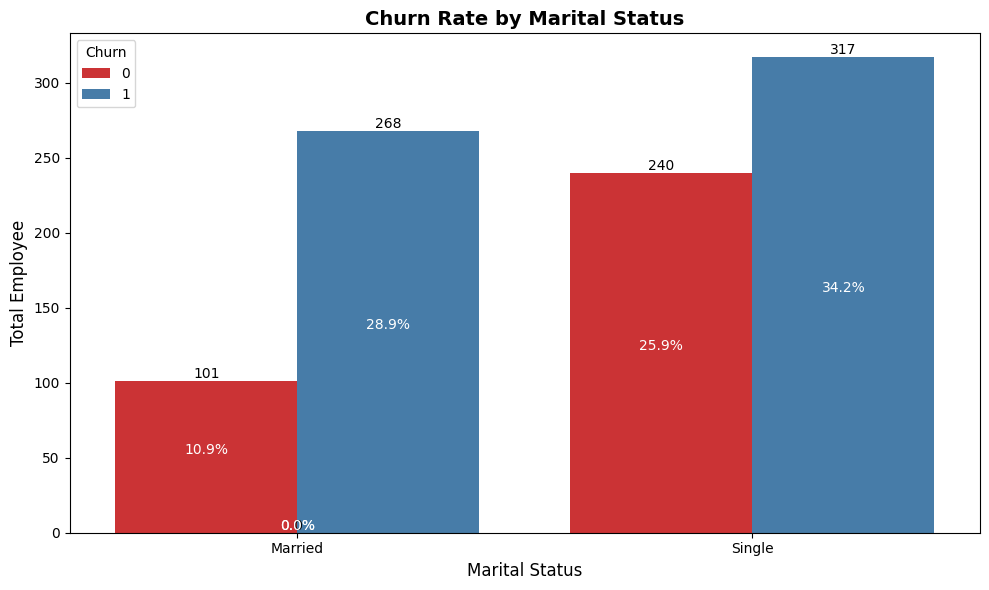

In [ ]:
# Multivariate Marital

marital_churn = df.groupby('marital_status')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='marital_status', y='employee', hue='churn', data=marital_churn, palette='Set1')

plt.title('Churn Rate by Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Married employees had a significantly higher chance of leaving at 72.6% compared to single employees at 56.9%.

Married status is a strong indicator of churn risk in this company. Further research is needed to investigate the reasons behind the high churn rate in this group.

Factors such as lack of work flexibility or work-life balance pressures may be contributing factors.

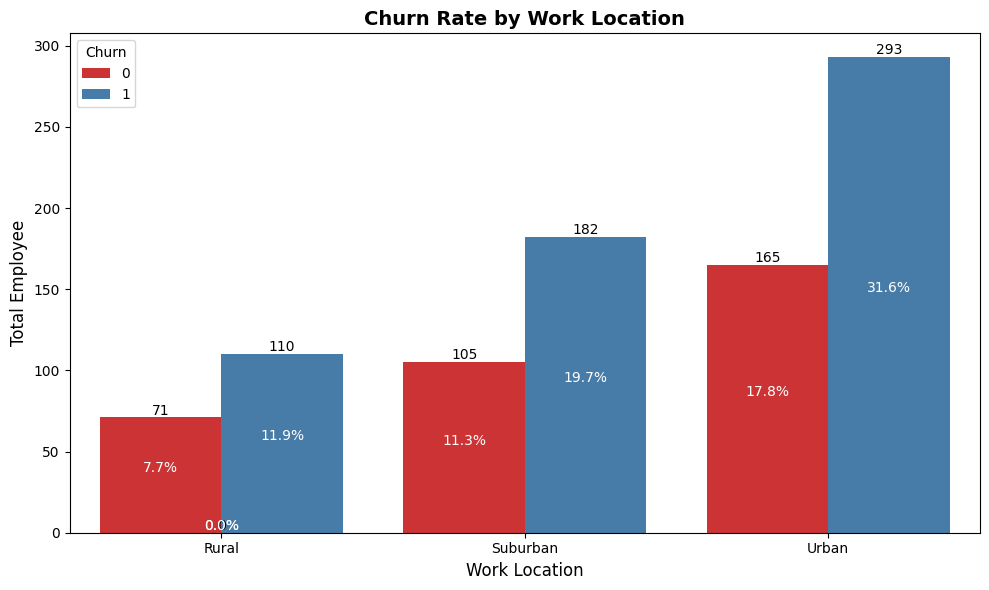

In [ ]:
# Multivariate Location

location_churn = df.groupby('work_location')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='work_location', y='employee', hue='churn', data=location_churn, palette='Set1')

plt.title('Churn Rate by Work Location', fontsize=14, fontweight='bold')
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Employees in urban locations had the highest churn volume and a relatively higher churn rate 63.9%.

Meanwhile, employees in suburban locations had a churn rate at 63.4% and Employees in rural locations had the lowest churn rate 60.8%.

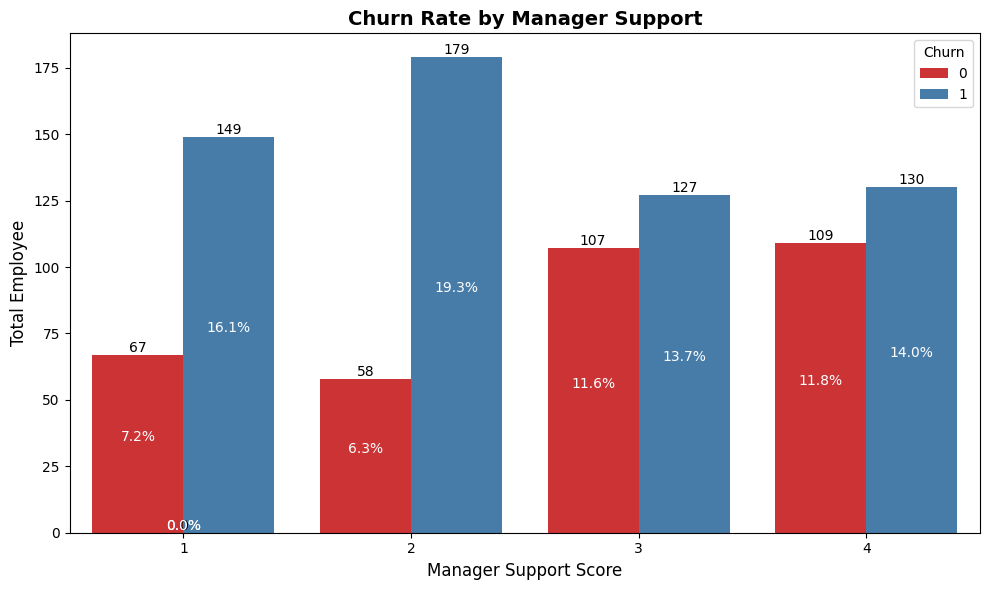

In [ ]:
# Multivariate Manager Support

manager_support_churn = df.groupby('manager_support_score')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='manager_support_score', y='employee', hue='churn', data=manager_support_churn, palette='Set1')

plt.title('Churn Rate by Manager Support', fontsize=14, fontweight='bold')
plt.xlabel('Manager Support Score', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Manager support is a very strong predictor of churn:

There is a significant difference in churn risk between the low support (Scores 1 & 2) and high support (Scores 3 & 4) groups, with a difference of approximately 21 percentage points between the highest (75.5%) and lowest (54.3%).

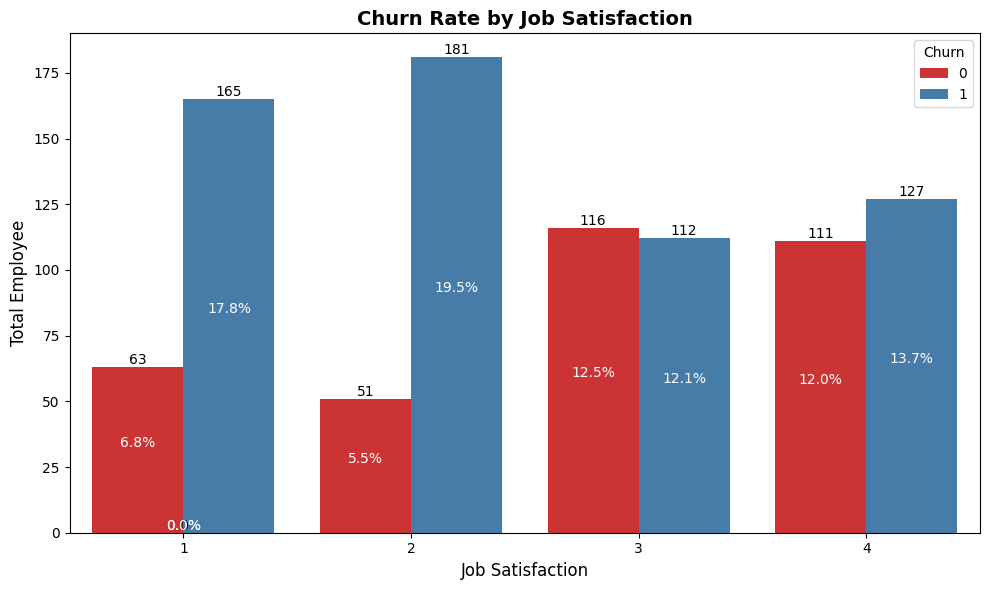

In [ ]:
# Multivariate Job Satisfication

satisfaction_churn = df.groupby('job_satisfaction')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_satisfaction', y='employee', hue='churn', data=satisfaction_churn, palette='Set1')

plt.title('Churn Rate by Job Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Job satisfaction is also a very strong determinant of churn:

There is a significant difference in churn risk, reaching 28.9 percentage points between the highest risk (Scores 1&2: 78.0%) and the lowest (Scores 3&4: 49.1%).

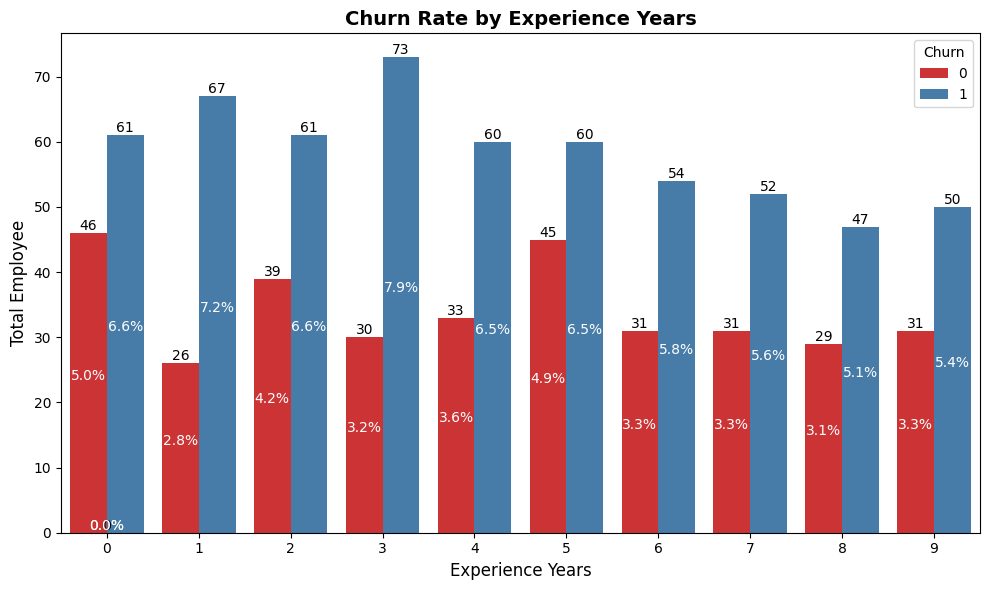

In [ ]:
# Multivariate Experience Years

years_churn = df.groupby('experience_years')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='experience_years', y='employee', hue='churn', data=years_churn, palette='Set1')

plt.title('Churn Rate by Experience Years', fontsize=14, fontweight='bold')
plt.xlabel('Experience Years', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

The overall churn risk is very high early in a career. Employees with 0 to 4 years of experience all have relative churn rates above 57%, with peaks in the first (72.0%) and third years (70.9%).

# Feature Engineering

In [ ]:
# OVERTIME RATIO
# Measures how much of total weekly working time is spent in overtime.
df['overtime_ratio'] = df['overtime_hours_per_week'] / df['working_hours_per_week']

# BURNOUT SCORE
# Combines overtime intensity and low job satisfaction into a single stress metric.
df['burnout_score'] = df['overtime_ratio'] * (1 - df['job_satisfaction'] / 5)

# ACHIEVEMENT STRESS
# Captures the frustration of working overtime but still missing targets.
df['achievement_stress'] = (1 - df['target_achievement']) * df['overtime_ratio']
df['achievement_stress'] = df['achievement_stress'].clip(lower=0)  # No negative stress

# ACHIEVE STATUS (binary)
# Indicates whether the employee met or exceeded their performance target.
df['achieve_status'] = (df['target_achievement'] >= 1).astype(int)

# LOYALTY INDEX
# Represents the proportion of an employee's total career spent at the company.
df['loyalty_index'] = df['company_tenure_years'] / (df['experience_years'] + 1)

# DISTANCE STRESS (adjusted by marital status)
# Reflects commuting stress, adjusted for family obligations and manager support.
df['distance_stress'] = df['distance_to_office_km'] / (df['manager_support_score'] + 1)

def adjust_distance_stress(row):
    if row['marital_status'] == 'Married':
        return row['distance_stress'] * 1.2
    else:
        return row['distance_stress'] * 1

df['distance_stress_adjusted'] = df.apply(adjust_distance_stress, axis=1)

# PROMOTION POTENTIAL
# Balances job satisfaction, performance, and tenure using a log scale to reduce saturation.
df['promotion_potential'] = (df['job_satisfaction'] + 2 * df['target_achievement']) * np.log(df['company_tenure_years'] + 1)

# STRESS INDEX
# Overall stress index combining workload, performance pressure, and commute strain.
# 0.01 scaling keeps commuting influence proportional to other stress sources.
df['stress_index'] = df['burnout_score'] + df['achievement_stress'] + 0.01 * df['distance_stress_adjusted']

# CHECK RESULTS
feature_cols = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

# Show statistical summary
display(df[feature_cols].describe())

overtime_ratio  burnout_score  achievement_stress  achieve_status  \
count      926.000000     926.000000          926.000000      926.000000   
mean         0.177736       0.088896            0.041487        0.240821   
std          0.111940       0.073737            0.049678        0.427813   
min          0.000000       0.000000            0.000000        0.000000   
25%          0.086957       0.031484            0.000000        0.000000   
50%          0.170732       0.070088            0.022743        0.000000   
75%          0.262295       0.128429            0.066846        0.000000   
max          0.463415       0.361905            0.256500        1.000000   

       loyalty_index  distance_stress_adjusted  promotion_potential  \
count     926.000000                926.000000           926.000000   
mean        0.786133                  8.228567             4.870974   
std         0.880231                  5.913164             2.415961   
min         0.012500                  0.240000             0.285931   
25%         0.275000                  3.616667             3.083590   
50%         0.500000                  7.100000             4.696336   
75%         0.900000                 11.000000             6.712037   
max         4.900000                 29.400000            10.784519   

       stress_index  
count    926.000000  
mean       0.212669  
std        0.119043  
min        0.002400  
25%        0.122438  
50%        0.190986  
75%        0.279642  
max        0.751500

# Visualisasi Fitur Baru

**Distribusi numerik (histogram + KDE)**

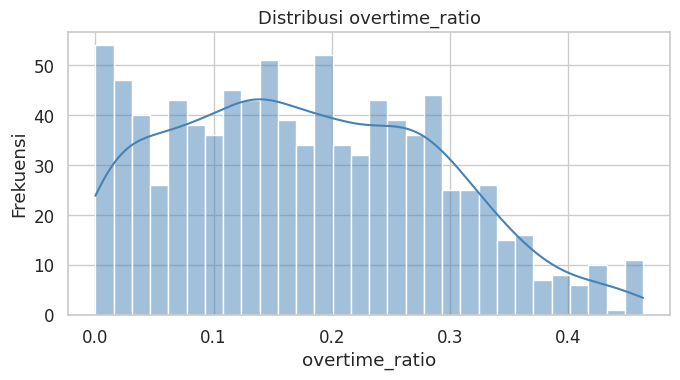

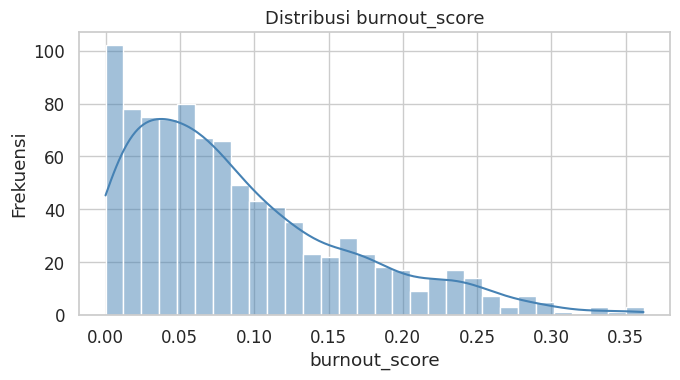

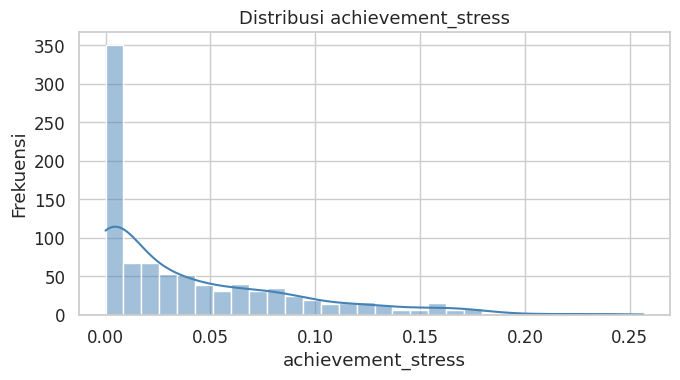

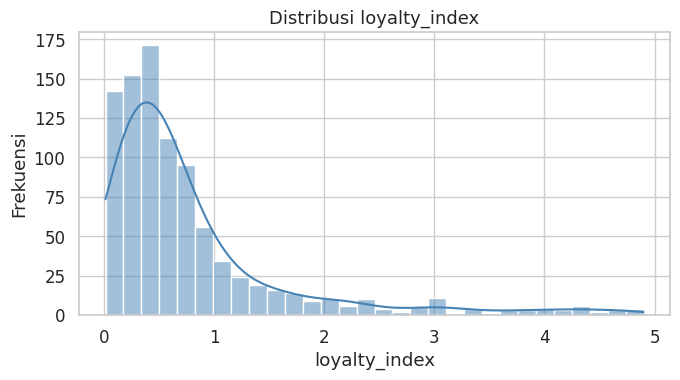

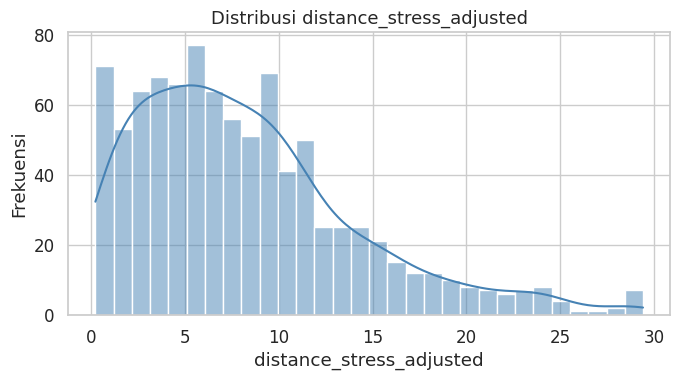

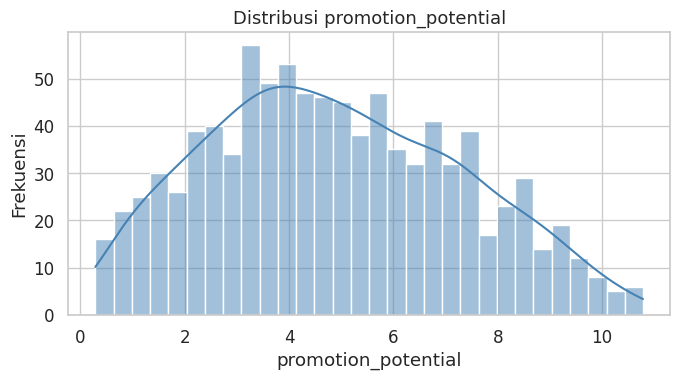

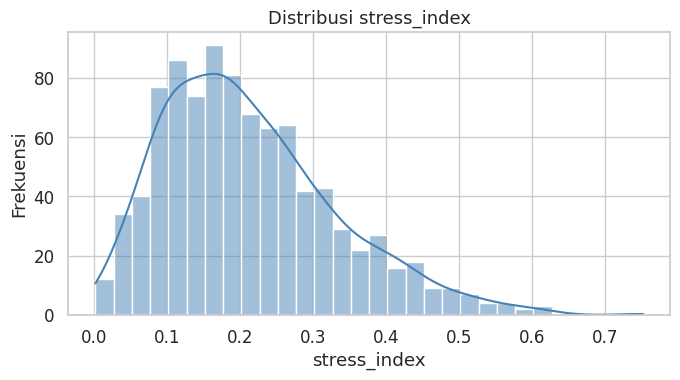

In [ ]:
# Styling untuk visual agar rapi
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 4)

# List fitur baru
feature_cols = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

# Plot histogram + KDE untuk fitur numerik
numeric_features = [col for col in feature_cols if df[col].dtype != 'object' and df[col].nunique() > 2]

for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribusi {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

**Bar chart (untuk fitur biner atau kategorikal)**

/tmp/ipython-input-2229522909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='achieve_status', data=df, palette='viridis')


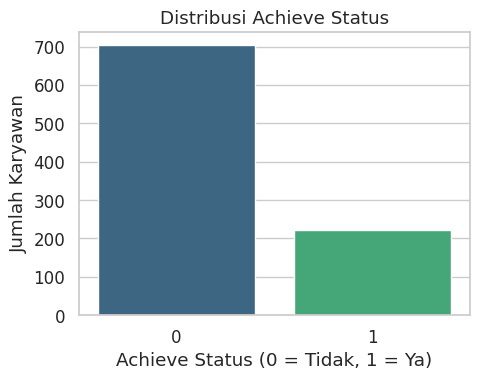

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='achieve_status', data=df, palette='viridis')
plt.title('Distribusi Achieve Status')
plt.xlabel('Achieve Status (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Karyawan')
plt.tight_layout()
plt.show()

**Boxplot (deteksi outlier & sebaran antar fitur)**

/tmp/ipython-input-784422892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='achieve_status', y='stress_index', data=df, palette='mako')


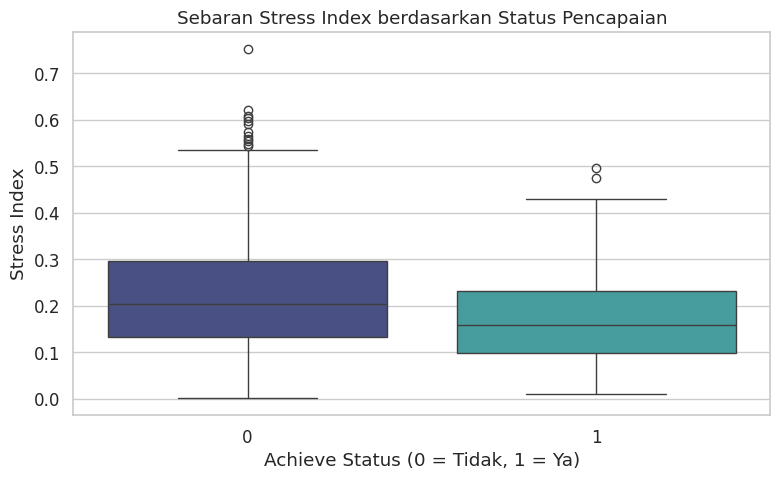

In [ ]:
# Boxplot bagus untuk membandingkan sebaran relatif fitur stres terhadap status pencapaian target.

plt.figure(figsize=(8,5))
sns.boxplot(x='achieve_status', y='stress_index', data=df, palette='mako')
plt.title('Sebaran Stress Index berdasarkan Status Pencapaian')
plt.xlabel('Achieve Status (0 = Tidak, 1 = Ya)')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

**Korelasi antar fitur baru (heatmap)**

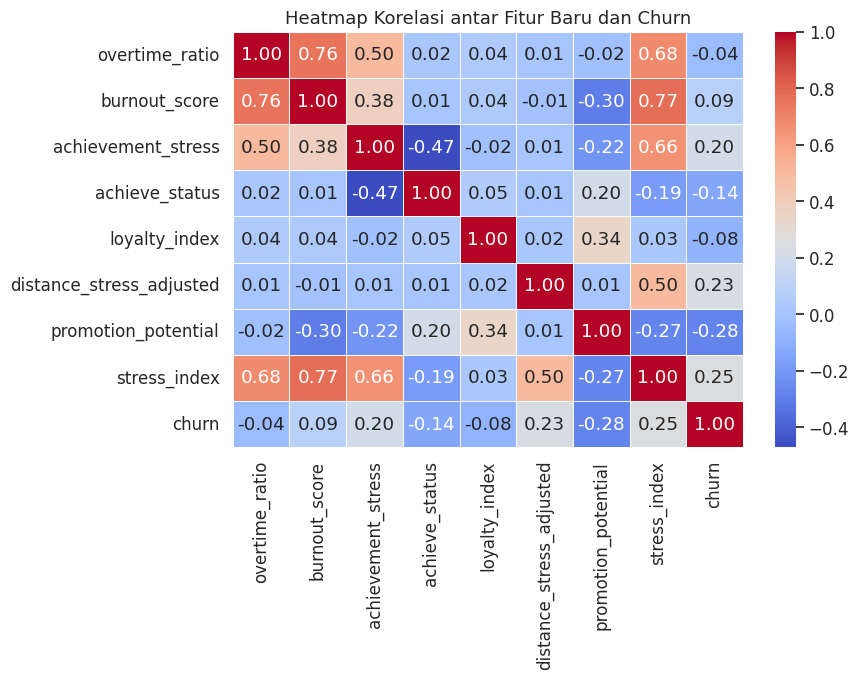

In [ ]:
plt.figure(figsize=(9,7))
corr_matrix = df[feature_cols + ['churn']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Heatmap Korelasi antar Fitur Baru dan Churn', fontsize=13)
plt.tight_layout()
plt.show()

**Line chart (tren stress terhadap tenure)**

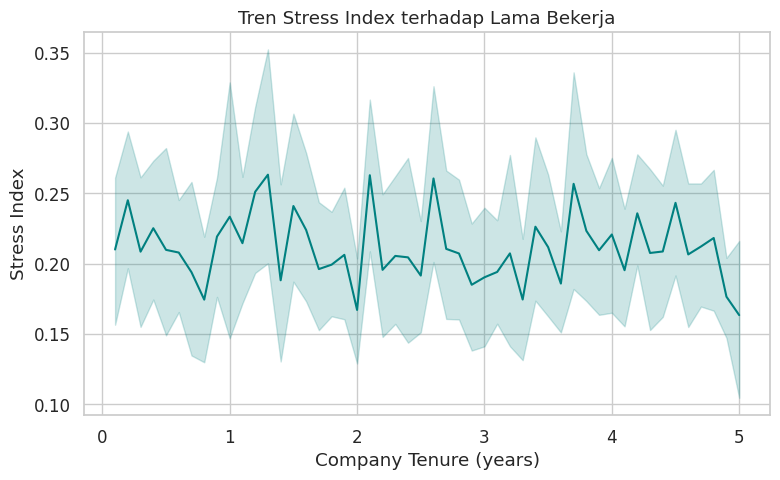

In [ ]:
# bagaimana stress meningkat seiring masa kerja

plt.figure(figsize=(8,5))
sns.lineplot(
    x='company_tenure_years',
    y='stress_index',
    data=df.sort_values('company_tenure_years'),
    color='teal'
)
plt.title('Tren Stress Index terhadap Lama Bekerja')
plt.xlabel('Company Tenure (years)')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

**Pairplot (hubungan multi-dimensi)**

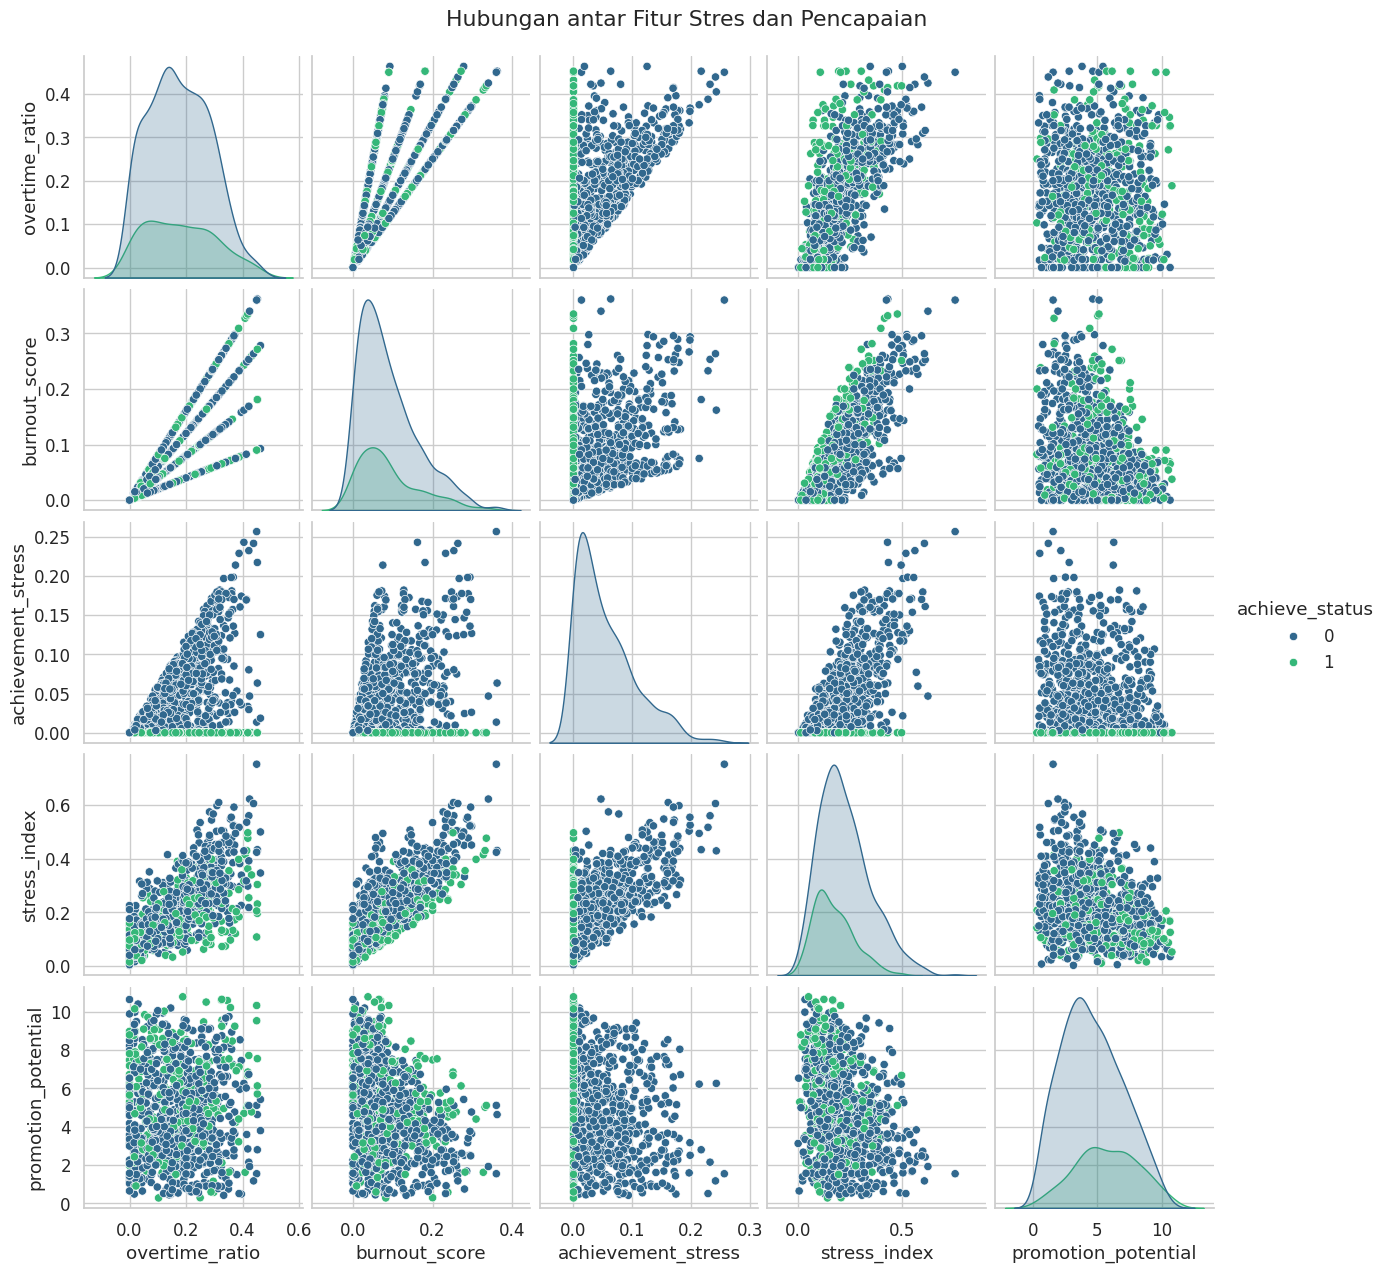

In [ ]:
sns.pairplot(
    df,
    vars=['overtime_ratio', 'burnout_score', 'achievement_stress', 'stress_index', 'promotion_potential'],
    hue='achieve_status',
    diag_kind='kde',
    palette='viridis'
)
plt.suptitle('Hubungan antar Fitur Stres dan Pencapaian', y=1.02)
plt.show()

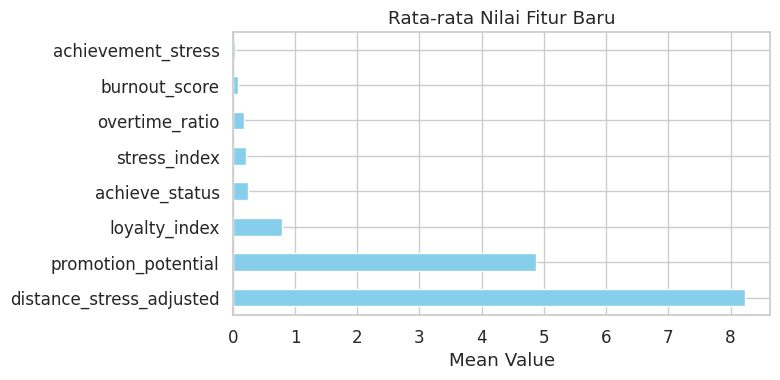

In [ ]:
df[feature_cols].mean().sort_values(ascending=False).plot(
    kind='barh', color='skyblue', figsize=(8,4), title='Rata-rata Nilai Fitur Baru'
)
plt.xlabel('Mean Value')
plt.tight_layout()
plt.show()

Insight Tambahan :

1. Burnout tinggi saat overtime_ratio > 0.3
2. Achievement stress cenderung tinggi pada pegawai yang tidak mencapai target
3. Stress index meningkat seiring tenure (loyal tapi stres tinggi)
4. Korelasi kuat antara burnout_score dan stress_index

# Bivariate Analysis (Fitur Baru vs churn)

**Distribusi fitur numerik berdasarkan Churn**

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


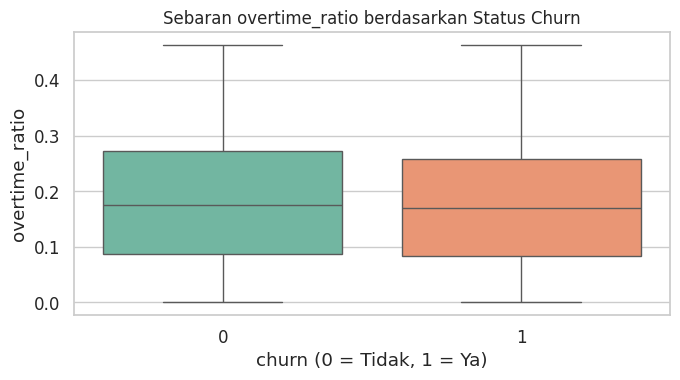

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


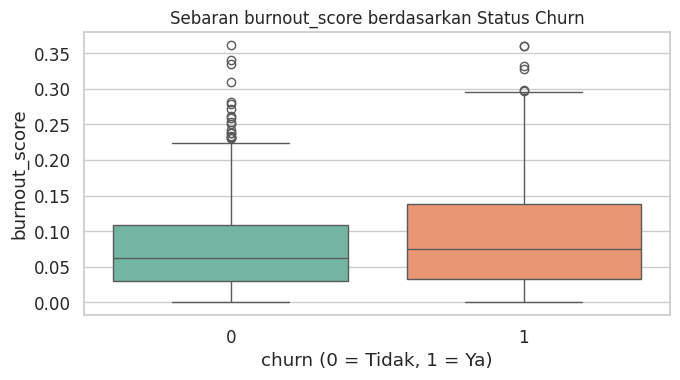

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


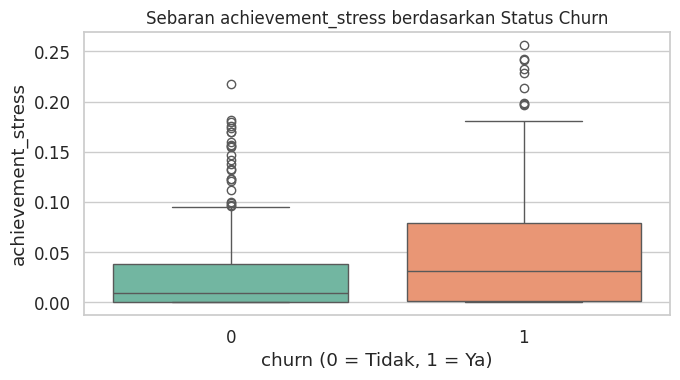

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


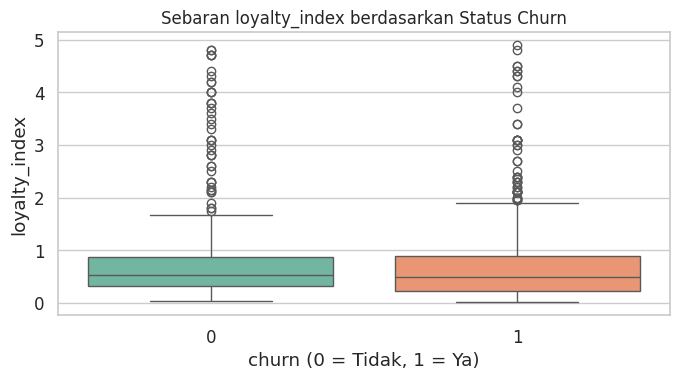

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


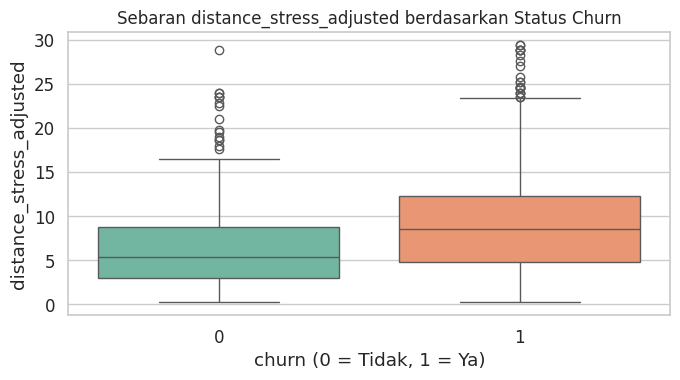

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


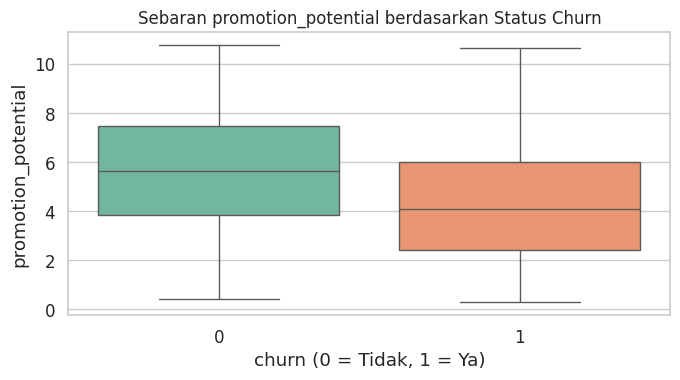

/tmp/ipython-input-1217071735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


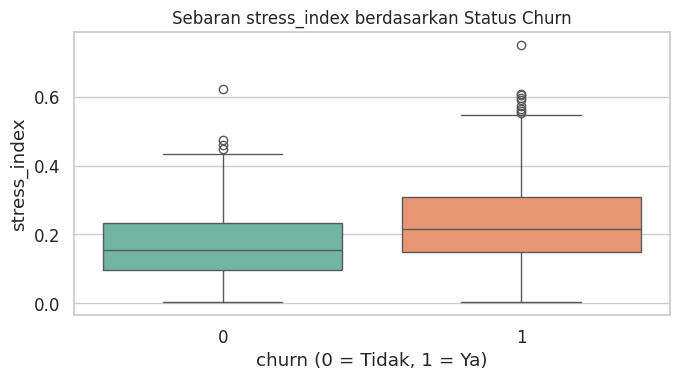

In [ ]:
numeric_features = [col for col in feature_cols if df[col].nunique() > 2]

for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(
        x='churn',
        y=col,
        data=df,
        palette='Set2'
    )
    plt.title(f'Sebaran {col} berdasarkan Status Churn', fontsize=12)
    plt.xlabel('churn (0 = Tidak, 1 = Ya)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Perbandingan rata-rata fitur untuk tiap status churn**

<Figure size 1000x700 with 0 Axes>

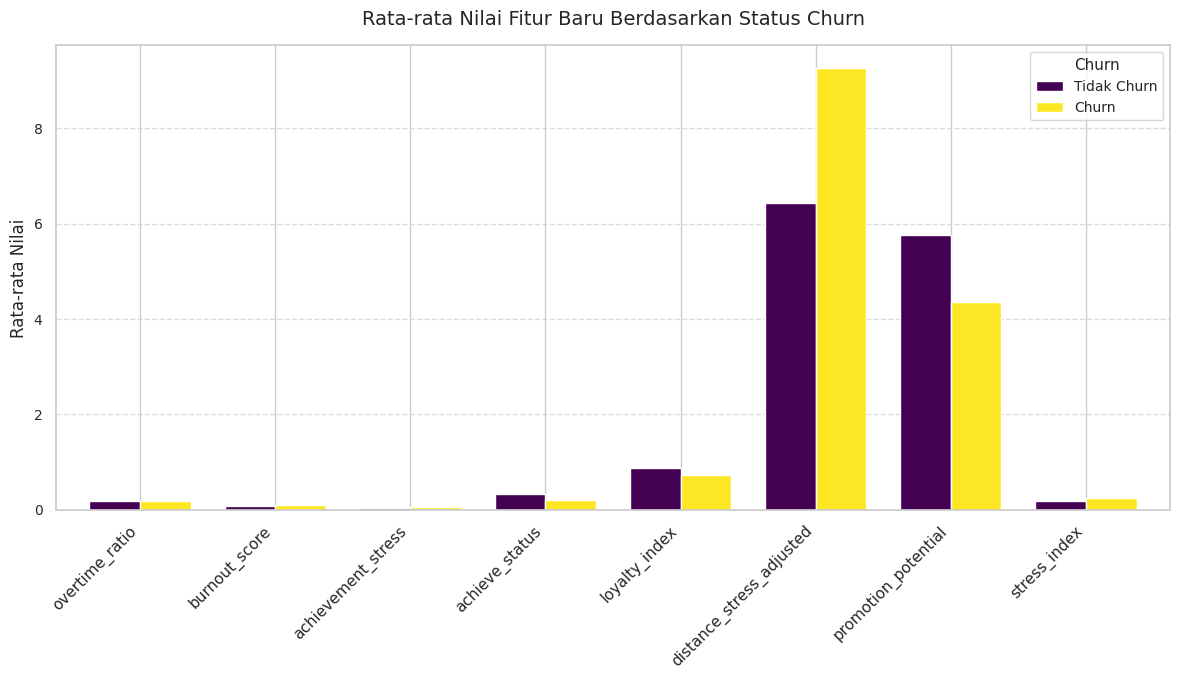

In [ ]:
# Hitung rata-rata tiap fitur berdasarkan status churn
mean_features = df.groupby('churn')[feature_cols].mean().T

# Plot bar chart dengan ukuran lebih tinggi
plt.figure(figsize=(10, 7))  # Lebih tinggi agar tidak gepeng
mean_features.plot(
    kind='bar',
    figsize=(12, 7),          # Lebar 12, tinggi 7 (bisa disesuaikan)
    colormap='viridis',
    width=0.75
)

plt.title('Rata-rata Nilai Fitur Baru Berdasarkan Status Churn', fontsize=14, pad=15)
plt.ylabel('Rata-rata Nilai', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'], fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Scatter plot untuk fitur kunci**

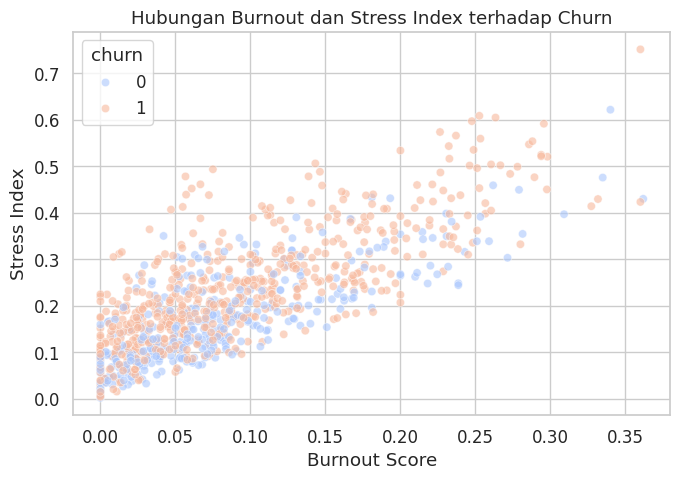

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='burnout_score',
    y='stress_index',
    hue='churn',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Hubungan Burnout dan Stress Index terhadap Churn')
plt.xlabel('Burnout Score')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

employee_id  age  gender    education  experience_years  monthly_target  \
0            1   28    Male  High School                 0             153   
1            2   41    Male      Diploma                 6             188   
2            3   36  Female  High School                 8             159   
3            4   32    Male      Diploma                 7             185   
4            5   29  Female  High School                 7             142   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   

      salary  ...  churn_period  overtime_ratio burnout_score  \
0  4667108.0  ...        Stayed        0.145161      0.029032   
1  5853507.0  ...    Onboarding        0.145455      0.058182   
2  4781336.0  ...    Onboarding        0.169492      0.135593   
3  3624588.0  ...    Onboarding        0.220588      0.176471   
4  5154327.0  ...        Stayed        0.200000      0.080000   

   achievement_stress  achieve_status  loyalty_index distance_stress  \
0            0.008710               0       2.800000        5.500000   
1            0.066909               0       0.385714        9.000000   
2            0.094915               0       0.188889        5.666667   
3            0.075000               0       0.062500       10.666667   
4            0.000000               1       0.562500        4.666667   

   distance_stress_adjusted promotion_potential  stress_index  
0                  6.600000            7.849806      0.103742  
1                  9.000000            5.337998      0.215091  
2                  5.666667            1.867313      0.287175  
3                 12.800000            0.940679      0.379471  
4                  4.666667            8.557835      0.126667  

[5 rows x 28 columns]

In [ ]:
if 'distance_stress' in df.columns:
    df.drop(columns=['distance_stress'], inplace=True)
    print("🗑️ Dropped column: distance_stress")

🗑️ Dropped column: distance_stress


* overtime_ratio — Measures how much of total weekly working time is spent in overtime, indicating workload intensity.
* burnout_score — Captures stress from high overtime combined with low job satisfaction, representing burnout risk.
* achievement_stress — Reflects frustration from working overtime but still missing performance targets.
* achieve_status — A binary flag showing whether an employee met or exceeded their target (1 = yes, 0 = no).
* loyalty_index — Represents the proportion of an employee’s total career spent in the current company, showing attachment level.
* distance_stress_adjusted — Indicates commuting stress scaled by manager support and marital status sensitivity.
* promotion_potential — Estimates growth opportunity using job satisfaction, performance, and log-scaled tenure.
* stress_index — A composite indicator combining burnout, achievement stress, and commute fatigue into total stress level.

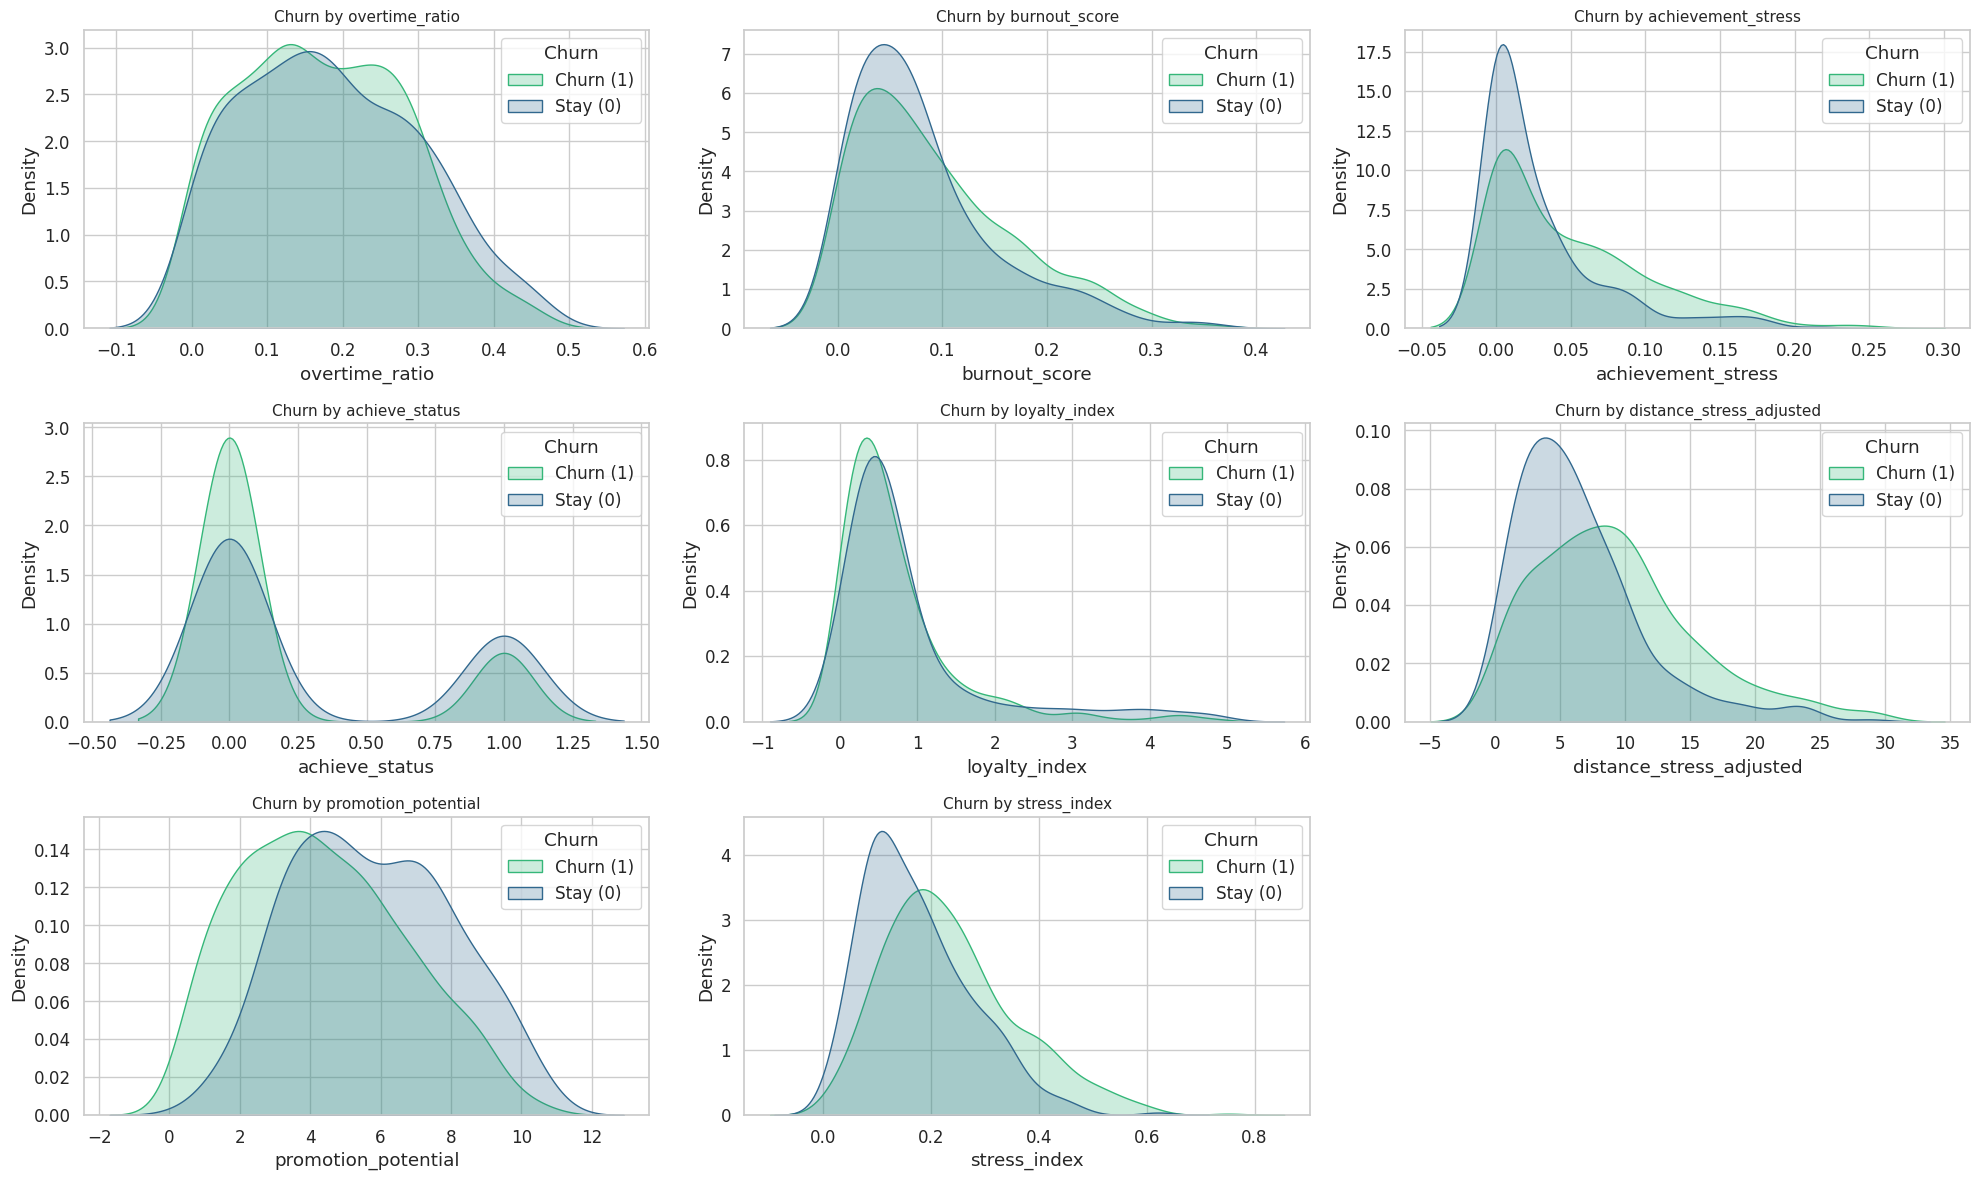

In [ ]:
# Multivariate Feature Enggineering

plt.figure(figsize=(20, 12))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 3, i + 1)

    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Churn by {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Churn (1)', 'Stay (0)'])

plt.tight_layout()
plt.show()

It's show that employee churn is a toxic combination of external pressure (stress/commute) and internal dissatisfaction (burnout/loyalty), severely magnified by managerial failure and poor performance outcomes.

The hierarchy of churn drivers is:

* Workplace Experience & Wellbeing: Burnout Score, Loyalty Index, Stress Index, Job Satisfaction, and Manager Support Score are the most powerful predictors.

* Performance & Career Outlook: Target Achievement (failure to meet targets) and low Promotion Potential are key drivers.

* External Pressure: Distance-related stress and high Working Hours are significant contributing factors.

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define categorical columns
categorical_cols = ['gender', 'education', 'work_location', 'marital_status']

# Make a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Number of columns before encoding:", df.shape[1])
print("Number of columns after encoding:", df_encoded.shape[1])

Number of columns before encoding: 27
Number of columns after encoding: 27


In [ ]:
display(df_encoded.head())

employee_id  age  gender  education  experience_years  monthly_target  \
0            1   28       1          2                 0             153   
1            2   41       1          1                 6             188   
2            3   36       0          2                 8             159   
3            4   32       1          1                 7             185   
4            5   29       0          2                 7             142   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   

      salary  ...  distance_to_office_km  churn_period  overtime_ratio  \
0  4667108.0  ...                     22        Stayed        0.145161   
1  5853507.0  ...                     36    Onboarding        0.145455   
2  4781336.0  ...                     17    Onboarding        0.169492   
3  3624588.0  ...                     32    Onboarding        0.220588   
4  5154327.0  ...                     14        Stayed        0.200000   

   burnout_score  achievement_stress  achieve_status  loyalty_index  \
0       0.029032            0.008710               0       2.800000   
1       0.058182            0.066909               0       0.385714   
2       0.135593            0.094915               0       0.188889   
3       0.176471            0.075000               0       0.062500   
4       0.080000            0.000000               1       0.562500   

   distance_stress_adjusted promotion_potential  stress_index  
0                  6.600000            7.849806      0.103742  
1                  9.000000            5.337998      0.215091  
2                  5.666667            1.867313      0.287175  
3                 12.800000            0.940679      0.379471  
4                  4.666667            8.557835      0.126667  

[5 rows x 27 columns]

In [ ]:
display(df_encoded.head())

employee_id  age  gender  education  experience_years  monthly_target  \
0            1   28       1          2                 0             153   
1            2   41       1          1                 6             188   
2            3   36       0          2                 8             159   
3            4   32       1          1                 7             185   
4            5   29       0          2                 7             142   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0                0.94                      62                        9   
1                0.54                      55                        8   
2                0.44                      59                       10   
3                0.66                      68                       15   
4                1.01                      45                        9   

      salary  ...  distance_to_office_km  churn_period  overtime_ratio  \
0  4667108.0  ...                     22        Stayed        0.145161   
1  5853507.0  ...                     36    Onboarding        0.145455   
2  4781336.0  ...                     17    Onboarding        0.169492   
3  3624588.0  ...                     32    Onboarding        0.220588   
4  5154327.0  ...                     14        Stayed        0.200000   

   burnout_score  achievement_stress  achieve_status  loyalty_index  \
0       0.029032            0.008710               0       2.800000   
1       0.058182            0.066909               0       0.385714   
2       0.135593            0.094915               0       0.188889   
3       0.176471            0.075000               0       0.062500   
4       0.080000            0.000000               1       0.562500   

   distance_stress_adjusted promotion_potential  stress_index  
0                  6.600000            7.849806      0.103742  
1                  9.000000            5.337998      0.215091  
2                  5.666667            1.867313      0.287175  
3                 12.800000            0.940679      0.379471  
4                  4.666667            8.557835      0.126667  

[5 rows x 27 columns]

In [ ]:
display(df.describe())

employee_id         age  experience_years  monthly_target  \
count   926.000000  926.000000        926.000000      926.000000   
mean    504.122030   33.611231          4.240821      125.462203   
std     288.497336    6.530928          2.834402       43.891958   
min       1.000000   22.000000          0.000000       50.000000   
25%     256.250000   28.000000          2.000000       86.000000   
50%     507.500000   34.000000          4.000000      127.000000   
75%     753.750000   39.000000          7.000000      163.750000   
max     999.000000   44.000000          9.000000      199.000000   

       target_achievement  working_hours_per_week  overtime_hours_per_week  \
count          926.000000              926.000000               926.000000   
mean             0.790778               54.153348                 9.429806   
std              0.228264                8.682398                 5.722118   
min              0.400000               40.000000                 0.000000   
25%              0.590000               46.000000                 5.000000   
50%              0.790000               54.000000                 9.000000   
75%              0.990000               62.000000                14.000000   
max              1.200000               69.000000                19.000000   

             salary  commission_rate  job_satisfaction  ...       churn  \
count  9.260000e+02       926.000000        926.000000  ...  926.000000   
mean   5.501960e+06         0.058790          2.514039  ...    0.631749   
std    1.442609e+06         0.023237          1.121446  ...    0.482590   
min    3.000037e+06         0.020000          1.000000  ...    0.000000   
25%    4.253052e+06         0.040000          2.000000  ...    0.000000   
50%    5.492408e+06         0.060000          3.000000  ...    1.000000   
75%    6.749480e+06         0.080000          4.000000  ...    1.000000   
max    7.999712e+06         0.100000          4.000000  ...    1.000000   

       distance_to_office_km  overtime_ratio  burnout_score  \
count             926.000000      926.000000     926.000000   
mean               24.152268        0.177736       0.088896   
std                13.993648        0.111940       0.073737   
min                 1.000000        0.000000       0.000000   
25%                12.000000        0.086957       0.031484   
50%                23.000000        0.170732       0.070088   
75%                36.000000        0.262295       0.128429   
max                49.000000        0.463415       0.361905   

       achievement_stress  achieve_status  loyalty_index  \
count          926.000000      926.000000     926.000000   
mean             0.041487        0.240821       0.786133   
std              0.049678        0.427813       0.880231   
min              0.000000        0.000000       0.012500   
25%              0.000000        0.000000       0.275000   
50%              0.022743        0.000000       0.500000   
75%              0.066846        0.000000       0.900000   
max              0.256500        1.000000       4.900000   

       distance_stress_adjusted  promotion_potential  stress_index  
count                926.000000           926.000000    926.000000  
mean                   8.228567             4.870974      0.212669  
std                    5.913164             2.415961      0.119043  
min                    0.240000             0.285931      0.002400  
25%                    3.616667             3.083590      0.122438  
50%                    7.100000             4.696336      0.190986  
75%                   11.000000             6.712037      0.279642  
max                   29.400000            10.784519      0.751500  

[8 rows x 22 columns]

# Mutual Information Correlation

In [ ]:
# =====================================================
# 🔢 KONVERSI FITUR KATEGORIKAL KE NUMERIK
# =====================================================
X = df.drop(columns=[target_col])

# Drop churn_period dari X supaya tidak dianalisis
if 'churn_period' in X.columns:
    X = X.drop(columns=['churn_period'])

y = df[target_col]

# Deteksi kolom non-numerik setelah drop churn_period
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Buat salinan data untuk encoding
X_encoded = X.copy()
le = LabelEncoder()

for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

print(f"\n📊 {len(categorical_cols)} kolom kategorikal berhasil di-encode:")
print(categorical_cols)

# =====================================================
# 🧠 CEK FITUR ENGINEERING SUDAH TERMASUK
# =====================================================
engineered_features = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

print("\n🧩 Mengecek fitur hasil feature engineering di X_encoded:")
for f in engineered_features:
    status = "✅" if f in X_encoded.columns else "❌"
    print(f" - {f}: {status}")

# =====================================================
# 📈 HITUNG MUTUAL INFORMATION
# =====================================================
mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'mutual_info': mi_scores
}).sort_values(by='mutual_info', ascending=False)

# =====================================================
# 🔍 TAMPILKAN HASIL
# =====================================================
print("\n🔍 Top 10 Fitur Berdasarkan Mutual Information:")
display(mi_df.head(10))


📊 4 kolom kategorikal berhasil di-encode:
['gender', 'education', 'work_location', 'marital_status']

🧩 Mengecek fitur hasil feature engineering di X_encoded:
 - overtime_ratio: ✅
 - burnout_score: ✅
 - achievement_stress: ✅
 - achieve_status: ✅
 - loyalty_index: ✅
 - distance_stress_adjusted: ✅
 - promotion_potential: ✅
 - stress_index: ✅

🔍 Top 10 Fitur Berdasarkan Mutual Information:


feature  mutual_info
23       promotion_potential     0.060723
24              stress_index     0.054460
19        achievement_stress     0.054197
6         target_achievement     0.046313
22  distance_stress_adjusted     0.042747
14      company_tenure_years     0.030882
11          job_satisfaction     0.018883
9                     salary     0.017935
21             loyalty_index     0.016909
1                        age     0.014910

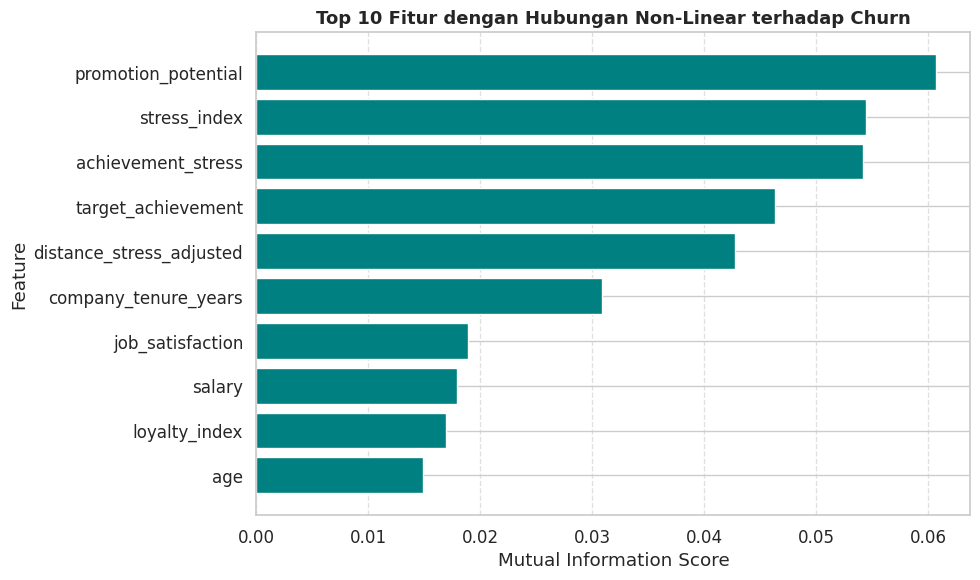

In [ ]:
# 📊 VISUALISASI
# =====================================================
plt.figure(figsize=(10, 6))
plt.barh(mi_df.head(10)['feature'][::-1], mi_df.head(10)['mutual_info'][::-1], color='teal')
plt.title('Top 10 Fitur dengan Hubungan Non-Linear terhadap Churn', fontsize=13, weight='bold')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Pearson & Spearman Correlation

In [ ]:
# =====================================================
# 🔢 DEFINISI FITUR NUMERIK UNTUK KORELASI
# =====================================================

# Semua kolom numerik termasuk hasil feature engineering
numeric_features = [col for col in df_encoded.select_dtypes(include=['number']).columns if col != 'employee_id']

# Pastikan target_col tidak dihitung
if target_col in numeric_features:
    numeric_features.remove(target_col)

# =====================================================
# 🔍 HITUNG KORELASI PEARSON & SPEARMAN TERHADAP TARGET
# =====================================================
from scipy import stats

corr_list = []
for col in numeric_features:
    try:
        # Handle potential non-numeric values that might have slipped through
        # or issues with the target column in case of encoding errors earlier.
        if pd.api.types.is_numeric_dtype(df_encoded[col]) and pd.api.types.is_numeric_dtype(df_encoded[target_col]):
             # Check for sufficient variance in both columns
            if df_encoded[col].nunique() > 1 and df_encoded[target_col].nunique() > 1:
                pearson_r, pearson_p = stats.pearsonr(df_encoded[col], df_encoded[target_col])
                spearman_r, spearman_p = stats.spearmanr(df_encoded[col], df_encoded[target_col])
                corr_list.append({
                    'feature': col,
                    'pearson_r': pearson_r,
                    'pearson_p': pearson_p,
                    'spearman_r': spearman_r,
                    'spearman_p': spearman_p
                })
            else:
                 print(f"⚠️ Kolom '{col}' atau target '{target_col}' tidak memiliki cukup variasi untuk korelasi.")
        else:
             print(f"⚠️ Kolom '{col}' atau target '{target_col}' bukan numerik setelah encoding.")

    except Exception as e:
        print(f"⚠️ Gagal menghitung korelasi untuk kolom {col}: {e}")

corr_df = pd.DataFrame(corr_list).sort_values(by='pearson_r', ascending=False)

print("\nTop 10 fitur numerik berdasarkan Pearson correlation:")
display(corr_df.head(10))


Top 10 fitur numerik berdasarkan Pearson correlation:


feature  pearson_r     pearson_p  spearman_r  \
23              stress_index   0.253269  5.095428e-15    0.257932   
21  distance_stress_adjusted   0.231611  9.628149e-13    0.246689   
18        achievement_stress   0.204785  3.174392e-10    0.208919   
15     distance_to_office_km   0.179762  3.634513e-08    0.179032   
6     working_hours_per_week   0.166235  3.634403e-07    0.166074   
17             burnout_score   0.085180  9.506788e-03    0.079428   
9            commission_rate   0.041220  2.101481e-01    0.041223   
11             work_location   0.023128  4.820932e-01    0.021727   
8                     salary   0.007542  8.187227e-01    0.007232   
0                        age   0.006665  8.394999e-01    0.008351   

      spearman_p  
23  1.540810e-15  
21  2.643963e-14  
18  1.364028e-10  
15  4.134470e-08  
6   3.731132e-07  
17  1.562419e-02  
9   2.101096e-01  
11  5.090279e-01  
8   8.260334e-01  
0   7.996683e-01

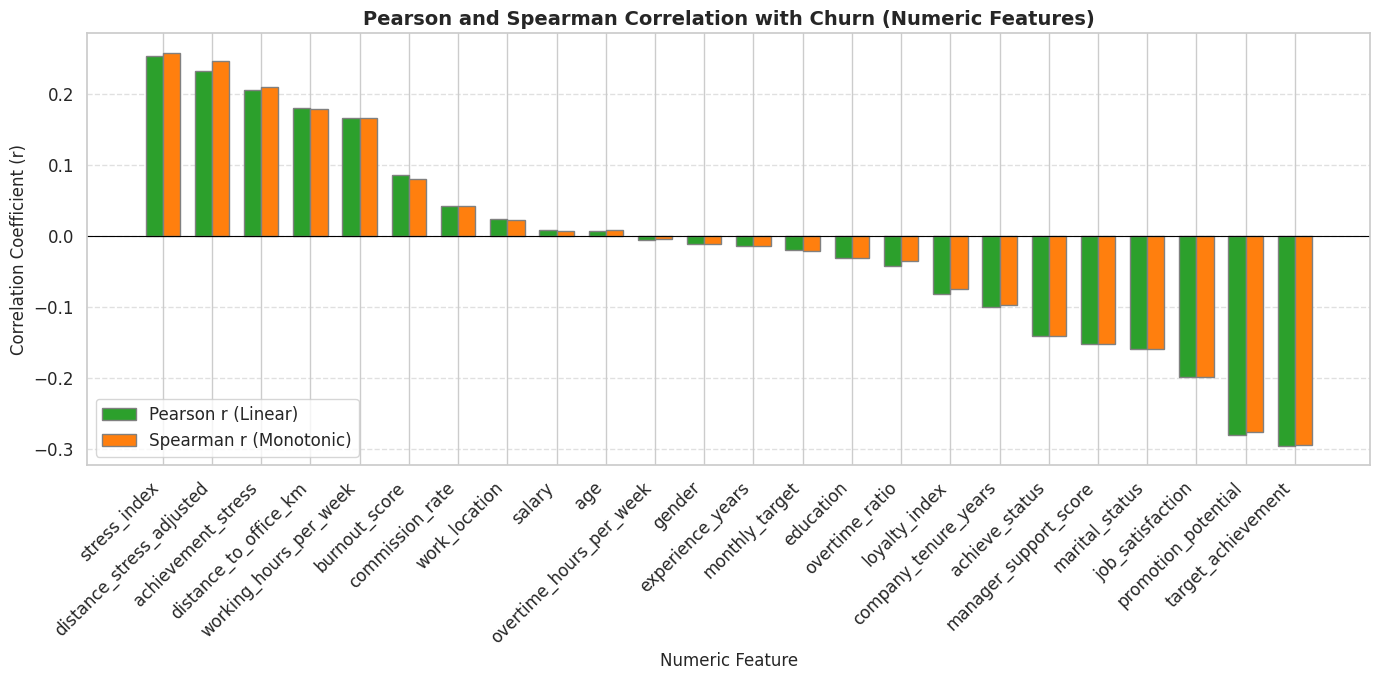

In [ ]:
# Urutkan berdasarkan korelasi Pearson tertinggi
corr_df_sorted = corr_df.sort_values(by='pearson_r', ascending=False)
order = corr_df_sorted['feature'].tolist()

# Plot Bar Pearson & Spearman
plt.figure(figsize=(14, 7))
bar_width = 0.35
r = np.arange(len(order))

pearson_data = corr_df_sorted['pearson_r']
spearman_data = corr_df_sorted['spearman_r']

plt.bar(r - bar_width/2, pearson_data, color='#2ca02c', width=bar_width, edgecolor='grey', label='Pearson r (Linear)')
plt.bar(r + bar_width/2, spearman_data, color='#ff7f0e', width=bar_width, edgecolor='grey', label='Spearman r (Monotonic)')

plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.xlabel('Numeric Feature', fontsize=12)
plt.ylabel('Correlation Coefficient (r)', fontsize=12)
plt.title('Pearson and Spearman Correlation with Churn (Numeric Features)', fontsize=14, fontweight='bold')
plt.xticks(r, order, rotation=45, ha='right')
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Top 3 Prediktor Terkuat:**
  1. Stress Index (stress_index): Ini menunjukkan bahwa stres total yang dirasakan karyawan-gabungan antara burnout, tekanan pencapaian target, dan commute strain—adalah faktor paling signifikan untuk churn. Karyawan dengan stres lebih tinggi cenderung meninggalkan perusahaan.

  2. Distance Stress Adjusted (distance_stress_adjusted): Stres akibat perjalanan ke kantor yang sudah disesuaikan dengan status pernikahan memegang peranan penting; karyawan yang harus menempuh jarak jauh, apalagi dengan tanggung jawab keluarga, lebih rentan churn.

  3. Achievement Stress (achievement_stress): Karyawan yang bekerja keras tapi gagal mencapai target mengalami frustrasi yang signifikan, mendorong keputusan untuk meninggalkan perusahaan.

**Prediktor Sekunder:**

  1. Distance to Office (km) (distance_to_office_km): Jarak fisik ke kantor tetap relevan, tetapi pengaruhnya lebih rendah dibandingkan stres yang diperhitungkan.

  2. Working Hours per Week (working_hours_per_week): Jumlah jam kerja mempengaruhi churn secara moderat; terlalu banyak jam kerja meningkatkan risiko.

  3. Burnout Score (burnout_score): Kombinasi overtime dan kepuasan kerja rendah berkontribusi terhadap churn, tetapi efeknya lebih kecil dibandingkan stress index.

Commission Rate & Salary : Pengaruh finansial hanya minor; ini menunjukkan faktor “soft” seperti stres dan jarak lebih dominan daripada uang semata.

  1. Work Location (work_location): Lokasi kerja memiliki dampak rendah tetapi tetap ada peran minor.

  2. Age (age): Usia hampir tidak mempengaruhi churn dalam dataset ini.

**Crucial Insight:**

  1. Fitur target achievement tidak muncul di top 10, tetapi stress yang terkait dengan pencapaian target (achievement_stress) sangat penting. Hal ini menegaskan bahwa bukan besar kecilnya target yang mempengaruhi churn, tapi frustrasi akibat ketidakmampuan memenuhi target.

  2. Faktor finansial dan demografis (salary, age, work location) memiliki pengaruh lebih kecil dibandingkan faktor psikologis dan lingkungan kerja seperti stres, jarak, dan burnout.

These correlation results largely confirm the findings from the Mutual Information Scores (previous analysis):

Target Achievement, Job Satisfaction, and Manager Support are the most important factors inhibiting churn (strong negative correlations).

Distance to the Office and Hours Worked per Week are the most important factors driving churn (strong positive correlations).

Overtime Hours have a very weak correlation, indicating that the number of overtime hours per person is less of a driver of churn than the total number of weekly hours worked.

The Pearson (Linear) and Spearman (Monotone) correlations are very similar for all features, indicating that the relationship is fairly linear and well represented by Pearson's r.

**Anova Analysis**

In [ ]:
# Pastikan target kolom
target_col = 'churn'

# Pastikan semua fitur (termasuk fitur baru) tersedia
feature_cols = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

# Tambahkan juga fitur numerik lain (kecuali kolom target dan ID)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['employee_id', target_col, 'churn_period']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Gabungkan fitur numerik dan hasil feature engineering
all_features = list(set(numeric_cols + feature_cols))

# Encode target (jika masih kategorikal)
if df[target_col].dtype == 'object':
    df[target_col] = LabelEncoder().fit_transform(df[target_col])

# Pisahkan data berdasarkan kategori churn
group_0 = df[df[target_col] == 0]
group_1 = df[df[target_col] == 1]

# Simpan hasil ANOVA
anova_results = []

for col in all_features:
    try:
        # Pastikan kolom tidak memiliki NaN
        group0_vals = group_0[col].dropna()
        group1_vals = group_1[col].dropna()

        # Hitung ANOVA F-test
        f_stat, p_val = f_oneway(group0_vals, group1_vals)
        anova_results.append({'Feature': col, 'F_stat': f_stat, 'p_value': p_val})
    except Exception as e:
        print(f"Kolom {col} error: {e}")

# Buat DataFrame hasil analisis
anova_df = pd.DataFrame(anova_results).sort_values(by='p_value')

# Tampilkan hasil
print("=== HASIL UJI ANOVA TERHADAP CHURN ===")
display(anova_df)

# Tampilkan fitur dengan pengaruh signifikan (p < 0.05)
significant_features = anova_df[anova_df['p_value'] < 0.05]
print("\n=== FITUR DENGAN PENGARUH SIGNIFIKAN (p < 0.05) ===")
display(significant_features)

=== HASIL UJI ANOVA TERHADAP CHURN ===


Feature     F_stat       p_value
11        target_achievement  88.561225  3.794251e-20
12       promotion_potential  79.159360  2.969282e-18
10              stress_index  63.332386  5.095428e-15
0   distance_stress_adjusted  52.376599  9.628149e-13
16        achievement_stress  40.445798  3.174392e-10
14          job_satisfaction  38.173062  9.694305e-10
13     distance_to_office_km  30.855674  3.634513e-08
1     working_hours_per_week  26.259522  3.634403e-07
3      manager_support_score  21.859462  3.370386e-06
5             achieve_status  18.675686  1.717443e-05
8       company_tenure_years   9.376900  2.260980e-03
9              burnout_score   6.753251  9.506788e-03
15             loyalty_index   6.206461  1.290297e-02
7             overtime_ratio   1.689223  1.940276e-01
18           commission_rate   1.572592  2.101481e-01
4             monthly_target   0.368851  5.437804e-01
19          experience_years   0.205785  6.501975e-01
6                     salary   0.052557  8.187227e-01
2                        age   0.041043  8.394999e-01
17   overtime_hours_per_week   0.029515  8.636330e-01


=== FITUR DENGAN PENGARUH SIGNIFIKAN (p < 0.05) ===


Feature     F_stat       p_value
11        target_achievement  88.561225  3.794251e-20
12       promotion_potential  79.159360  2.969282e-18
10              stress_index  63.332386  5.095428e-15
0   distance_stress_adjusted  52.376599  9.628149e-13
16        achievement_stress  40.445798  3.174392e-10
14          job_satisfaction  38.173062  9.694305e-10
13     distance_to_office_km  30.855674  3.634513e-08
1     working_hours_per_week  26.259522  3.634403e-07
3      manager_support_score  21.859462  3.370386e-06
5             achieve_status  18.675686  1.717443e-05
8       company_tenure_years   9.376900  2.260980e-03
9              burnout_score   6.753251  9.506788e-03
15             loyalty_index   6.206461  1.290297e-02

/tmp/ipython-input-3304838833.py:32: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(


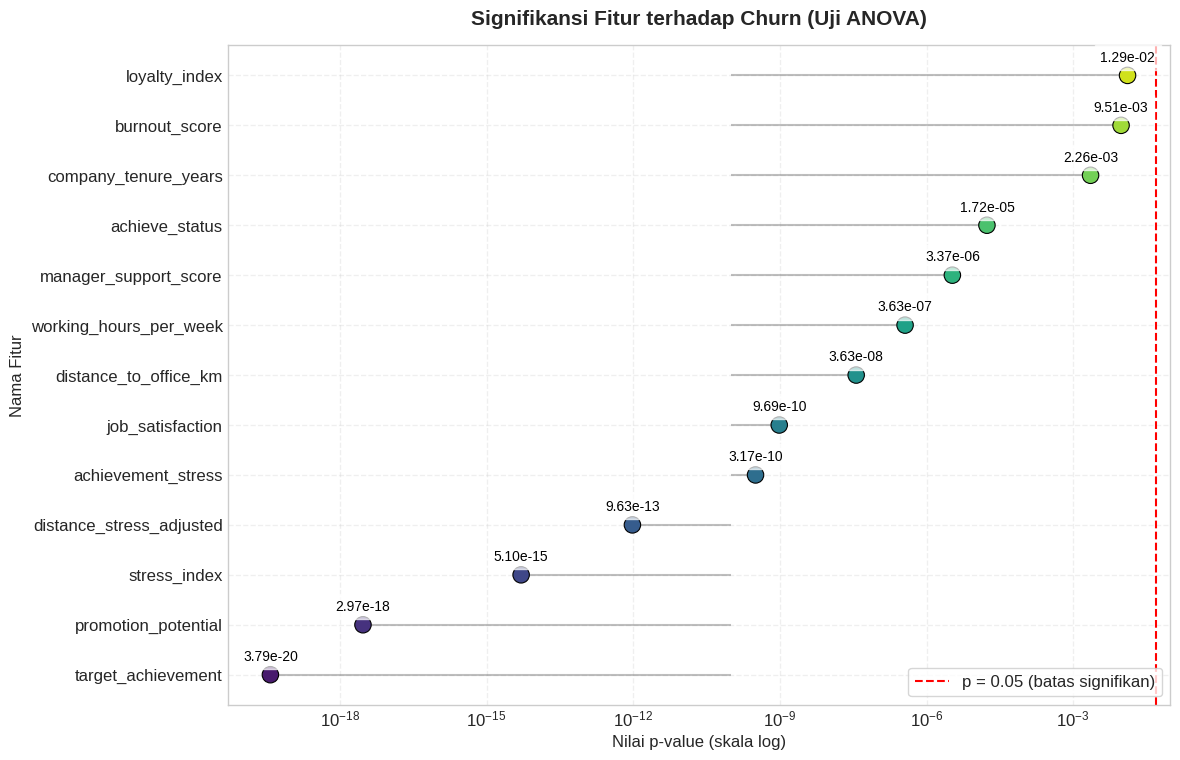

In [ ]:
# ===============================================
# VISUALISASI P-VALUE FITUR SIGNIFIKAN (LOLLIPOP CHART - LABEL DI ATAS TITIK)

if not significant_features.empty:
    # Urutkan fitur dari p-value terkecil ke terbesar
    sig_sorted = significant_features.sort_values(by='p_value', ascending=True).reset_index(drop=True)

    # Hindari p_value = 0 untuk skala log
    sig_sorted['p_value_plot'] = sig_sorted['p_value'].replace(0, 1e-10)

    # Setup style
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, max(6, 0.6 * len(sig_sorted))))  # tinggi menyesuaikan jumlah fitur

    # Warna gradasi
    colors = sns.color_palette("viridis", len(sig_sorted))

    # Gunakan skala log agar p-value kecil terlihat jelas
    ax.set_xscale("log")

    # Gambar garis horizontal (lollipop stem)
    ax.hlines(
        y=sig_sorted["Feature"],
        xmin=1e-10,
        xmax=sig_sorted["p_value_plot"],
        color="gray",
        alpha=0.5,
        linewidth=1.5
    )

    # Titik utama (p-value point)
    ax.scatter(
        sig_sorted["p_value_plot"],
        sig_sorted["Feature"],
        s=140,
        color=colors,
        edgecolor="black",
        linewidth=0.8,
        zorder=3
    )

    # Garis batas signifikansi
    ax.axvline(x=0.05, color="red", linestyle="--", linewidth=1.5, label="p = 0.05 (batas signifikan)")

    # Judul dan label sumbu
    ax.set_title("Signifikansi Fitur terhadap Churn (Uji ANOVA)", fontsize=15, fontweight="bold", pad=15)
    ax.set_xlabel("Nilai p-value (skala log)", fontsize=12)
    ax.set_ylabel("Nama Fitur", fontsize=12)

    # Tambahkan label p-value di atas titik menggunakan annotate
    for feature, pval in zip(sig_sorted["Feature"], sig_sorted["p_value_plot"]):
        ax.annotate(
            f"{pval:.2e}",
            xy=(pval, feature),
            xytext=(0, 8),  # posisi sedikit di atas titik
            textcoords="offset points",
            ha="center", va="bottom",
            fontsize=10, fontweight="medium",
            color="black",
            backgroundcolor=(1, 1, 1, 0.7),  # latar semi-transparan
            zorder=4
        )

    # Estetika tambahan
    ax.legend(loc="lower right", frameon=True)
    ax.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()

else:
    print("Tidak ada fitur signifikan dengan p-value < 0.05.")

**Chi-Square Test**

In [ ]:
from scipy.stats import chi2_contingency

# Tentukan kolom target kategorikal
target_col = 'churn'  # ubah jika target berbeda

# Daftar kolom kategorikal hasil encoding
categorical_cols = ['gender', 'education', 'work_location', 'marital_status']

# Simpan hasil analisis
chi2_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df_encoded[col], df_encoded[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Hitung Cramér's V (asosiasi)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt((chi2 / n) / (min(contingency_table.shape) - 1))

    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': round(chi2, 3),
        'p_value': round(p, 5),
        'Degrees of Freedom': dof,
        "Cramér's V": round(cramers_v, 3),
        "Significant (p<0.05)": "Yes" if p < 0.05 else "No"
    })

# Buat tabel hasil
chi2_summary = pd.DataFrame(chi2_results).sort_values(by='p_value', ascending=True)
display(chi2_summary)

Feature  Chi2 Statistic  p_value  Degrees of Freedom  Cramér's V  \
3  marital_status          22.896  0.00000                   1       0.157   
1       education           0.905  0.63601                   2       0.031   
2   work_location           0.581  0.74774                   2       0.025   
0          gender           0.078  0.78062                   1       0.009   

  Significant (p<0.05)  
3                  Yes  
1                   No  
2                   No  
0                   No

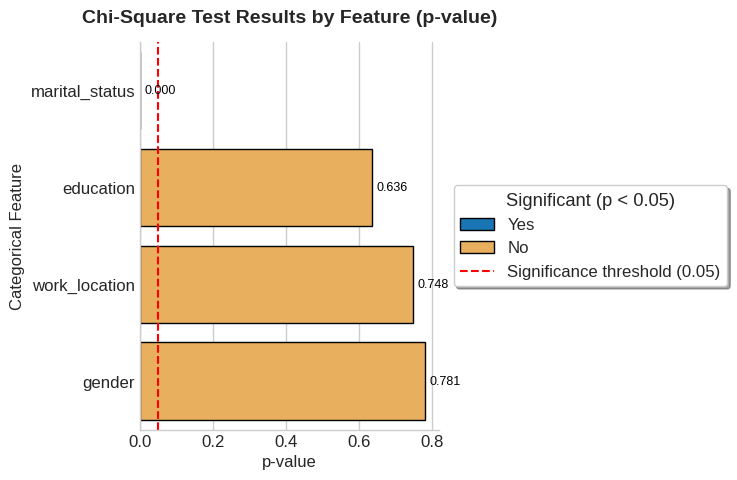

In [ ]:
# 🎨 VISUALISASI: Bar Chart berdasarkan p-value
# ======================================================

plt.figure(figsize=(9, 5))
bar_colors = {'Yes': '#007ACC', 'No': '#FFB347'}  # biru lembut & oranye pastel

ax = sns.barplot(
    data=chi2_summary,
    x='p_value',
    y='Feature',
    hue='Significant (p<0.05)',
    palette=bar_colors,
    dodge=False,
    edgecolor='black'
)

# Garis batas signifikansi
plt.axvline(0.05, color='red', linestyle='--', linewidth=1.5, label='Significance threshold (0.05)')

# Tambahkan label nilai p di ujung batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3, fontsize=9, color='black')

# Judul & label sumbu
plt.title('Chi-Square Test Results by Feature (p-value)', fontsize=14, pad=14, weight='bold')
plt.xlabel('p-value', fontsize=12)
plt.ylabel('Categorical Feature', fontsize=12)

# Legend dipindahkan keluar grafik agar tidak overlap
plt.legend(
    title='Significant (p < 0.05)',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    shadow=True
)

# Sesuaikan tampilan agar layout rapi dan proporsional
plt.tight_layout(rect=[0, 0, 0.85, 1])  # sisakan ruang untuk legend di kanan
sns.despine()
plt.show()

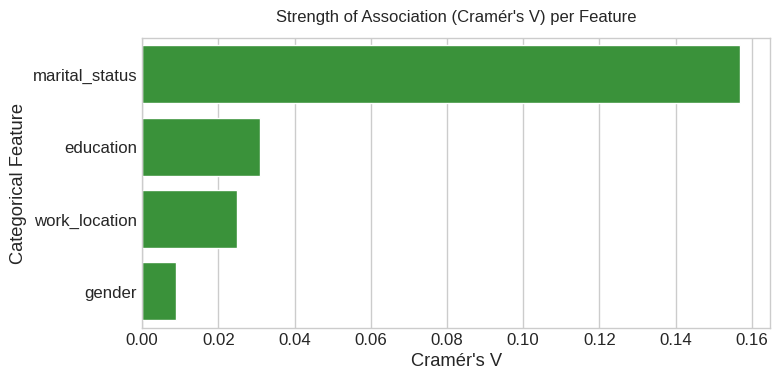

In [ ]:
# 🧭 Optional: Visualisasi tambahan (asosiasi kekuatan)
# ======================================================

plt.figure(figsize=(8, 4))
sns.barplot(
    data=chi2_summary,
    x="Cramér's V",
    y='Feature',
    color='tab:green'
)
plt.title("Strength of Association (Cramér's V) per Feature", fontsize=12, pad=12)
plt.xlabel("Cramér's V")
plt.ylabel("Categorical Feature")
plt.tight_layout()
plt.show()

# Heatmap Correlation

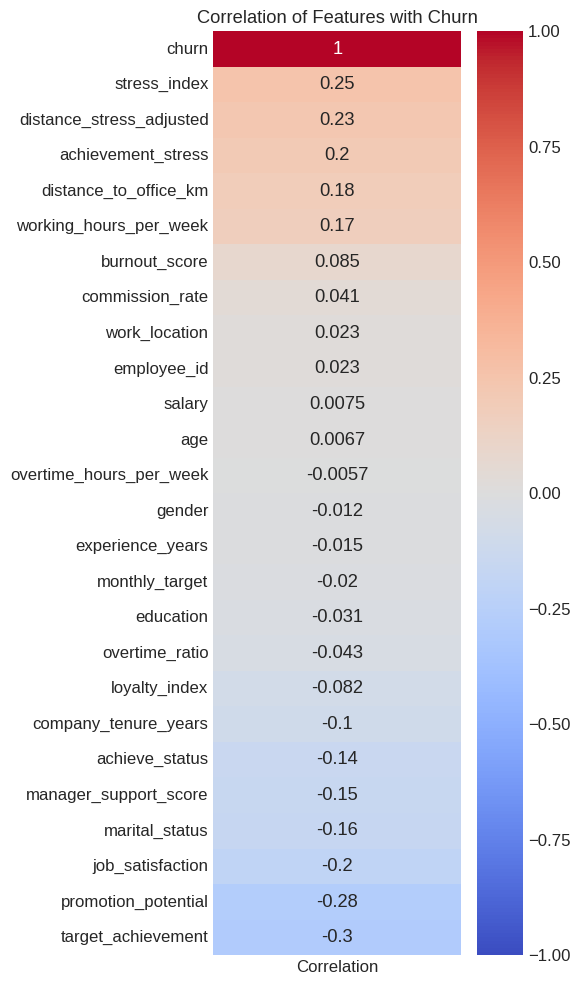

In [ ]:
# Heatmap Correlation
if 'df_encoded' not in locals() or not isinstance(df_encoded, pd.DataFrame):
     print("⚠️ DataFrame 'df_encoded' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    encoded_exclude = ['churn_period_Stayed', 'churn_period_Onboarding', 'churn_period_3 Months']
    # Filter columns, ensuring they exist in df_encoded before attempting exclusion
    encoded_filtered = [f for f in df_encoded.columns if f not in encoded_exclude]

    # Calculate correlation matrix
    # Ensure numeric_only is True to avoid errors with non-numeric columns if any were missed
    corr_matrix = df_encoded[encoded_filtered].corr(numeric_only=True)

    # Check if 'churn' is in the correlation matrix columns before proceeding
    if 'churn' in corr_matrix.columns:
        churn_corr = corr_matrix['churn'].sort_values(ascending=False)

        # Visualisation
        plt.figure(figsize=(4,12))
        sns.heatmap(churn_corr.to_frame(name='Correlation'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation of Features with Churn')
        plt.show()
    else:
        print("⚠️ Kolom 'churn' tidak ditemukan setelah filtering kolom yang diexclude.")

**Positive Correlation:** Features with positive correlation mean that as their values increase, the probability of churn also increases. Key features include:

1. Stress Index (0.25) → Higher stress levels strongly increase churn.

2. Distance Stress Adjusted (0.23) → The combined effect of commute distance and stress contributes to churn.

3. Achievement Stress (0.20) → Performance pressure from achievement targets can lead to burnout and exit.

4. Distance to Office (0.18) → Employees living farther from the office are more likely to leave.

5. Working Hours per Week (0.17) → Longer working hours slightly raise churn probability.


> Workload and stress-related factors are the main churn drivers. This highlights the importance of work-life balance and mental well-being support.

**Negative Correlation:** Features with negative correlation mean that as their values increase, the probability of churn decreases. Key features include:

1. Target Achievement (-0.30) → Employees who meet targets tend to stay longer.

2. Promotion Potential (-0.28) → Clear promotion opportunities reduce churn.

3. Job Satisfaction (-0.20) → Higher satisfaction strongly correlates with retention.

4. Marital Status - Single (-0.16) → Single employees show slightly better retention, possibly due to fewer external responsibilities.

5. Manager Support Score (-0.15) → Strong managerial support lowers churn risk.

6. Company Tenure (-0.10) → Longer-tenured employees are less likely to leave.

> Factors tied to career growth, recognition, and job satisfaction are key to retaining employees.

# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

if 'df_encoded' not in locals() or not isinstance(df_encoded, pd.DataFrame):
     print("⚠️ DataFrame 'df_encoded' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'churn' in numeric_cols:
        numeric_cols.remove('churn')

    scaler = StandardScaler()

    df_scaled = df_encoded.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    display(df_scaled[numeric_cols].head())

employee_id       age   gender  education  experience_years  \
0    -1.744882 -0.859643  0.65499   1.302729         -1.497004   
1    -1.741414  1.131962  0.65499   0.002808          0.620988   
2    -1.737946  0.365960 -1.52674   1.302729          1.326986   
3    -1.734478 -0.246841  0.65499   0.002808          0.973987   
4    -1.731010 -0.706442 -1.52674   1.302729          0.973987   

   monthly_target  target_achievement  working_hours_per_week  \
0        0.627739            0.654081                0.904231   
1        1.425582           -1.099223                0.097566   
2        0.764512           -1.537549                0.558518   
3        1.357196           -0.573232                1.595658   
4        0.376988            0.960909               -1.054812   

   overtime_hours_per_week    salary  ...  marital_status  \
0                -0.075154 -0.579022  ...       -1.228611   
1                -0.250009  0.243820  ...        0.813927   
2                 0.099701 -0.499798  ...        0.813927   
3                 0.973976 -1.302076  ...       -1.228611   
4                -0.075154 -0.241105  ...        0.813927   

   distance_to_office_km  overtime_ratio  burnout_score  achievement_stress  \
0              -0.153886       -0.291162      -0.812293           -0.660153   
1               0.847108       -0.288541      -0.416759            0.512004   
2              -0.511384       -0.073694       0.633644            1.076058   
3               0.561110        0.383016       1.188314            0.674958   
4              -0.725883        0.198995      -0.120706           -0.835568   

   achieve_status  loyalty_index  distance_stress_adjusted  \
0       -0.563216       2.289123                 -0.275563   
1       -0.563216      -0.455147                  0.130531   
2       -0.563216      -0.678875                 -0.433488   
3       -0.563216      -0.822539                  0.773512   
4        1.775519      -0.254199                 -0.602693   

   promotion_potential  stress_index  
0             1.233647     -0.915514  
1             0.193412      0.020359  
2            -1.243929      0.626217  
3            -1.627683      1.401948  
4             1.526868     -0.722834  

[5 rows x 25 columns]

In [ ]:
if 'df_scaled' not in locals() or not isinstance(df_scaled, pd.DataFrame):
     print("⚠️ DataFrame 'df_scaled' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    # Safely drop columns, ignoring errors if they don't exist
    cols_to_drop = ['employee_id', 'churn_period']
    df_model = df_scaled.drop(columns=cols_to_drop, errors='ignore')

    # Optional: Display the first few rows of the prepared data for modeling
    # display(df_model.head())
    print("Data prepared for modeling (df_model).")
    print(f"Shape of df_model: {df_model.shape}")

Data prepared for modeling (df_model).
Shape of df_model: (926, 25)


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

if 'df_model' not in locals() or not isinstance(df_model, pd.DataFrame):
     print("⚠️ DataFrame 'df_model' belum terdefinisi. Harap jalankan sel sebelumnya.")
elif 'churn' not in df_model.columns:
     print("⚠️ Kolom target 'churn' tidak ditemukan dalam df_model.")
else:
    X = df_model.drop(columns=['churn'])
    y = df_model['churn']

    # Ensure y has at least two unique values for stratification
    if y.nunique() < 2:
        print("⚠️ Kolom target 'churn' tidak memiliki cukup variasi untuk stratifikasi.")
        # You might want to skip train_test_split or handle it differently
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=42,
            stratify=y)

        print("Training set shape :", X_train.shape)
        print("Testing set shape  :", X_test.shape)

Training set shape : (740, 24)
Testing set shape  : (186, 24)


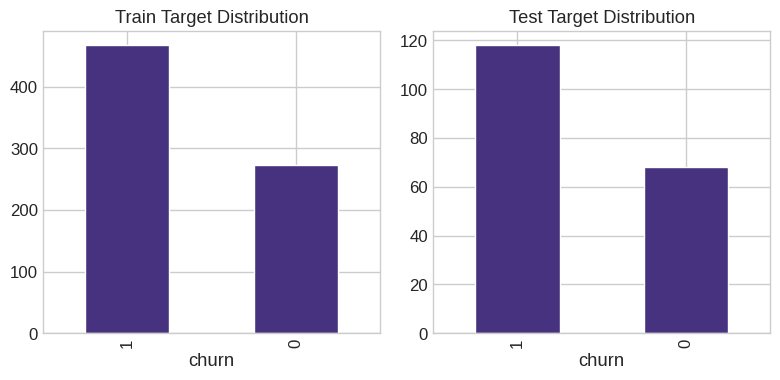

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

y_train.value_counts().plot(kind='bar', ax=ax[0], title='Train Target Distribution')
y_test.value_counts().plot(kind='bar', ax=ax[1], title='Test Target Distribution')

plt.tight_layout()
plt.show()

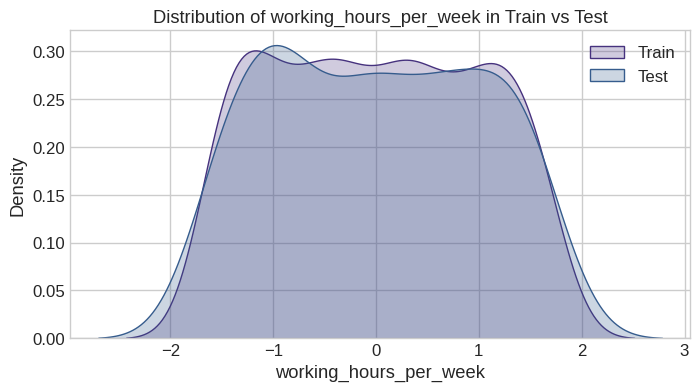

In [ ]:
import seaborn as sns

feature = 'working_hours_per_week'

sns.kdeplot(X_train[feature], label='Train', fill=True)
sns.kdeplot(X_test[feature], label='Test', fill=True)
plt.title(f"Distribution of {feature} in Train vs Test")
plt.legend()
plt.show()

# Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check if X_train and y_train exist
if 'X_train' not in locals() or 'y_train' not in locals():
     print("⚠️ Data training (X_train, y_train) belum terdefinisi. Harap jalankan sel sebelumnya.")
elif y_train.nunique() < 2:
      print("⚠️ Kolom target y_train tidak memiliki cukup variasi untuk SMOTE.")
else:
    print("Distribusi sebelum SMOTE:")
    print(Counter(y_train))

    smote = SMOTE(random_state=42, sampling_strategy='auto')

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Cek distribusi setelah SMOTE
    print("\nDistribusi setelah SMOTE:")
    print(Counter(y_train_resampled))

    # Tampilkan perbandingan jumlah data
    print(f"\nJumlah data sebelum SMOTE: {len(y_train)}")
    print(f"Jumlah data setelah SMOTE : {len(y_train_resampled)}")

Distribusi sebelum SMOTE:
Counter({1: 467, 0: 273})

Distribusi setelah SMOTE:
Counter({1: 467, 0: 467})

Jumlah data sebelum SMOTE: 740
Jumlah data setelah SMOTE : 934


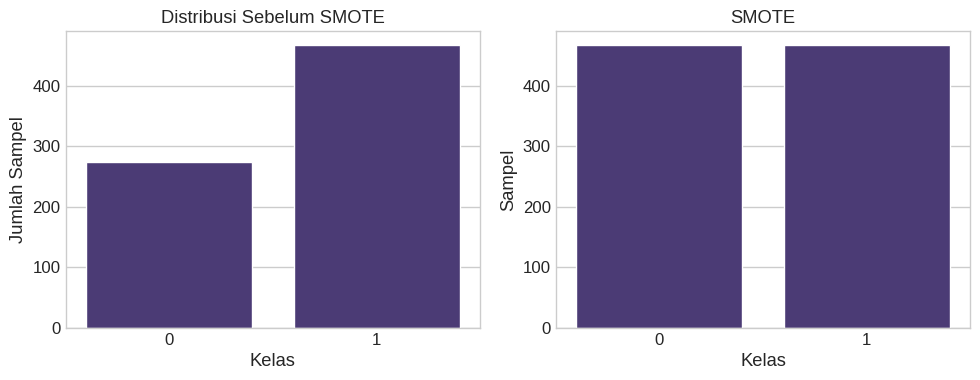

In [ ]:
from collections import Counter

# --- Distribusi Kelas Sebelum & Sesudah SMOTE ---
before = Counter(y_train)
after = Counter(y_train_resampled)

# Bar chart perbandingan
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Sebelum SMOTE
sns.barplot(x=list(before.keys()), y=list(before.values()), ax=ax[0])
ax[0].set_title('Distribusi Sebelum SMOTE')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah Sampel')

# Sesudah SMOTE
sns.barplot(x=list(after.keys()), y=list(after.values()), ax=ax[1])
ax[1].set_title('SMOTE')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Sampel')

plt.tight_layout()
plt.show()


# Logistic Regression Base Model

===== Logistic Regression Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.7537
Precision : 0.7559
Recall    : 0.7495
F1-Score  : 0.7527

🔹 TESTING PERFORMANCE
Accuracy  : 0.6935
Precision : 0.8081
Recall    : 0.6780
F1-Score  : 0.7373

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5632    0.7206    0.6323        68
           1     0.8081    0.6780    0.7373       118

    accuracy                         0.6935       186
   macro avg     0.6856    0.6993    0.6848       186
weighted avg     0.7186    0.6935    0.6989       186



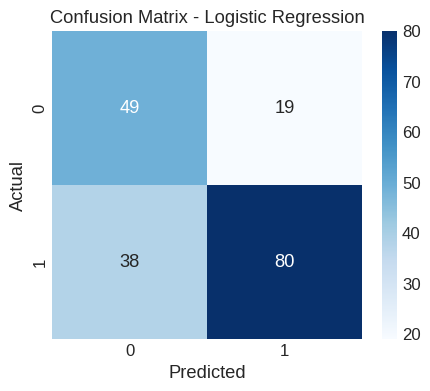

/tmp/ipython-input-4145976729.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')


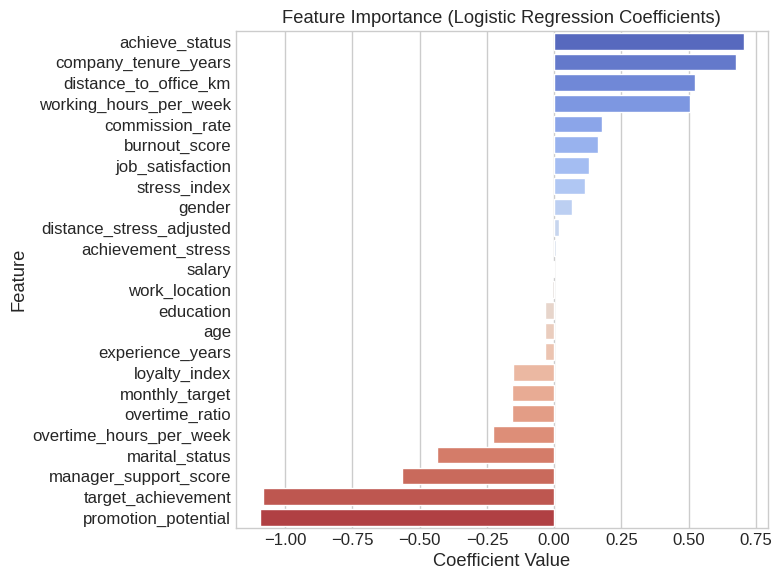


Top 10 positive coefficients (increase churn likelihood):
                     Feature  Coefficient
19            achieve_status     0.704466
13      company_tenure_years     0.674158
15     distance_to_office_km     0.522868
6     working_hours_per_week     0.503184
9            commission_rate     0.177551
17             burnout_score     0.162804
10          job_satisfaction     0.130986
23              stress_index     0.113629
1                     gender     0.067967
21  distance_stress_adjusted     0.019655

Top 10 negative coefficients (decrease churn likelihood):
                    Feature  Coefficient
0                       age    -0.034154
3          experience_years    -0.035772
20            loyalty_index    -0.153024
4            monthly_target    -0.156552
16           overtime_ratio    -0.157931
7   overtime_hours_per_week    -0.228784
14           marital_status    -0.434886
12    manager_support_score    -0.566321
5        target_achievement    -1.081365
22      pr

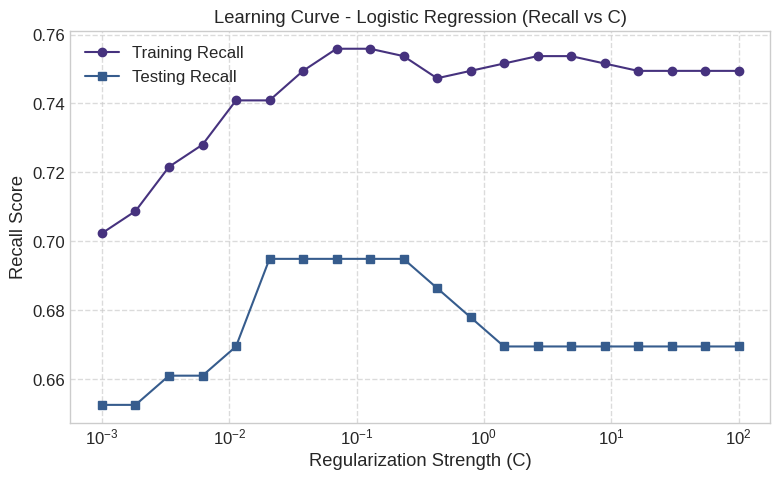

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'X_train_resampled' not in locals() or 'y_train_resampled' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    print("⚠️ Data training/testing belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_train_pred = log_reg.predict(X_train_resampled)
    y_train_prob = log_reg.predict_proba(X_train_resampled)[:, 1]
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_prec = precision_score(y_train_resampled, y_train_pred)
    train_rec = recall_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)

    y_test_pred = log_reg.predict(X_test)
    y_test_prob = log_reg.predict_proba(X_test)[:, 1]
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print("===== Logistic Regression Model Evaluation =====\n")
    print("🔹 TRAINING PERFORMANCE")
    print(f"Accuracy  : {train_acc:.4f}")
    print(f"Precision : {train_prec:.4f}")
    print(f"Recall    : {train_rec:.4f}")
    print(f"F1-Score  : {train_f1:.4f}\n")
    print("🔹 TESTING PERFORMANCE")
    print(f"Accuracy  : {test_acc:.4f}")
    print(f"Precision : {test_prec:.4f}")
    print(f"Recall    : {test_rec:.4f}")
    print(f"F1-Score  : {test_f1:.4f}\n")
    print("===== Classification Report (Testing Set) =====")
    print(classification_report(y_test, y_test_pred, digits=4))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    feature_importance = pd.DataFrame({
        'Feature': X_train_resampled.columns,
        'Coefficient': log_reg.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

    plt.figure(figsize=(8,6))
    sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
    plt.title("Feature Importance (Logistic Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    print("\nTop 10 positive coefficients (increase churn likelihood):")
    print(feature_importance.head(10))
    print("\nTop 10 negative coefficients (decrease churn likelihood):")
    print(feature_importance.tail(10))

    from sklearn.metrics import recall_score

    param_values = [float(x) for x in np.logspace(-3, 2, 20)]
    train_recalls, test_recalls = [], []

    for p in param_values:
        model = LogisticRegression(C=p, max_iter=2000, random_state=42)
        model.fit(X_train_resampled, y_train_resampled)
        y_train_pred = model.predict(X_train_resampled)
        y_test_pred = model.predict(X_test)
        train_recalls.append(recall_score(y_train_resampled, y_train_pred))
        test_recalls.append(recall_score(y_test, y_test_pred))

    plt.figure(figsize=(8, 5))
    plt.plot(param_values, train_recalls, label="Training Recall", marker='o')
    plt.plot(param_values, test_recalls, label="Testing Recall", marker='s')
    plt.xscale('log')
    plt.xlabel("Regularization Strength (C)")
    plt.ylabel("Recall Score")
    plt.title("Learning Curve - Logistic Regression (Recall vs C)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Logistic Regression Hypertuning

Distribusi sebelum SMOTE: Counter({1: 409, 0: 239})
Distribusi setelah SMOTE: Counter({0: 409, 1: 409})
Fitting 5 folds for each of 30 candidates, totalling 150 fits

===== 🔍 Best Logistic Regression Hyperparameters =====
{'solver': 'saga', 'penalty': 'l2', 'C': np.float64(1264.8552168552983)}
Best CV Recall: 0.7751

===== Logistic Regression Model Evaluation (After Random Search) =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.7787
Precision : 0.7767
Recall    : 0.7824
F1-Score  : 0.7795

🔹 TESTING PERFORMANCE
Accuracy  : 0.7338
Precision : 0.8355
Recall    : 0.7216
F1-Score  : 0.7744

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.6111    0.7549    0.6754       102
           1     0.8355    0.7216    0.7744       176

    accuracy                         0.7338       278
   macro avg     0.7233    0.7382    0.7249       278
weighted avg     0.7532    0.7338    0.7381       278



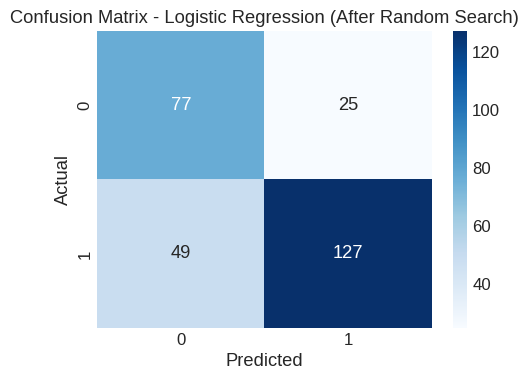

/tmp/ipython-input-347983134.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')


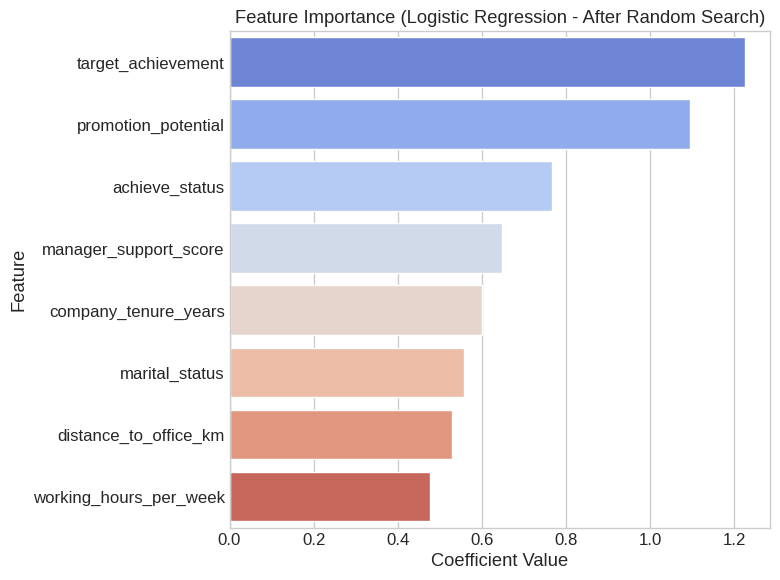


Top 10 Positive Coefficients (Increase Churn Likelihood):
                  Feature  Coefficient
6      target_achievement     1.225212
7     promotion_potential     1.094724
0          achieve_status     0.767116
4   manager_support_score     0.648106
1    company_tenure_years     0.600936
5          marital_status     0.557185
2   distance_to_office_km     0.529904
3  working_hours_per_week     0.476213

Top 10 Negative Coefficients (Decrease Churn Likelihood):
                  Feature  Coefficient
6      target_achievement     1.225212
7     promotion_potential     1.094724
0          achieve_status     0.767116
4   manager_support_score     0.648106
1    company_tenure_years     0.600936
5          marital_status     0.557185
2   distance_to_office_km     0.529904
3  working_hours_per_week     0.476213


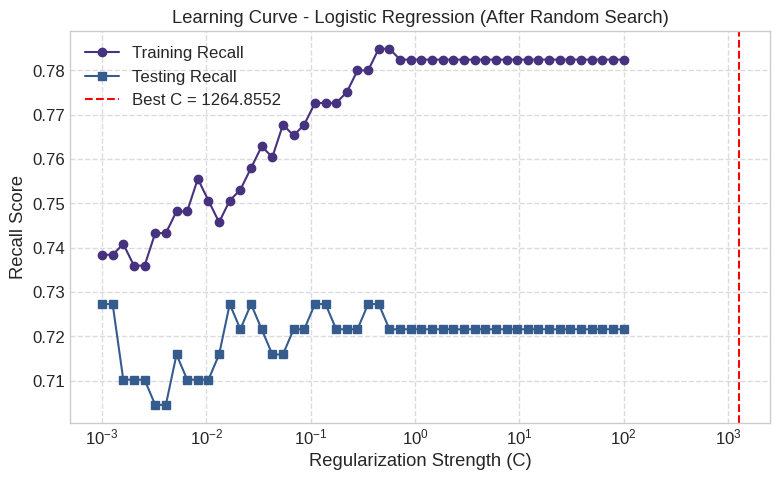

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df_pos = df_encoded.copy()
to_flip = ['manager_support_score', 'marital_status', 'target_achievement', 'promotion_potential']
for col in to_flip:
    df_pos[col] = df_pos[col].max() - df_pos[col]

selected_features = [
    'achieve_status',
    'company_tenure_years',
    'distance_to_office_km',
    'working_hours_per_week',
    'manager_support_score',
    'marital_status',
    'target_achievement',
    'promotion_potential'
]
target_column = 'churn'

X = df_pos[selected_features]
y = df_pos[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribusi sebelum SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

param_dist = {
    'C': np.logspace(-3, 10, 50),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=2000, random_state=42)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled_df, y_train_resampled)

print("\n===== 🔍 Best Logistic Regression Hyperparameters =====")
print(random_search.best_params_)
print(f"Best CV Recall: {random_search.best_score_:.4f}\n")

best_log_reg = random_search.best_estimator_

y_train_pred = best_log_reg.predict(X_train_scaled_df)
y_test_pred = best_log_reg.predict(X_test_scaled_df)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== Logistic Regression Model Evaluation (After Random Search) =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}")

print("\n🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}")

print("\n===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (After Random Search)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression - After Random Search)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 Positive Coefficients (Increase Churn Likelihood):")
print(feature_importance.head(10))
print("\nTop 10 Negative Coefficients (Decrease Churn Likelihood):")
print(feature_importance.tail(10))

best_c = best_log_reg.C
param_values = np.logspace(-3, 2, 50)

train_recalls, test_recalls = [], []

for c in param_values:
    model = LogisticRegression(
        C=c,
        penalty=best_log_reg.penalty,
        solver=best_log_reg.solver,
        max_iter=2000,
        random_state=42
    )
    model.fit(X_train_scaled_df, y_train_resampled)
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(best_c, color='red', linestyle='--', label=f"Best C = {best_c:.4f}")
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Logistic Regression (After Random Search)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Decision Tree Base Model

===== Decision Tree Baseline Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

🔹 TESTING PERFORMANCE
Accuracy  : 0.6511
Precision : 0.7257
Recall    : 0.7216
F1-Score  : 0.7236

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5243    0.5294    0.5268       102
           1     0.7257    0.7216    0.7236       176

    accuracy                         0.6511       278
   macro avg     0.6250    0.6255    0.6252       278
weighted avg     0.6518    0.6511    0.6514       278



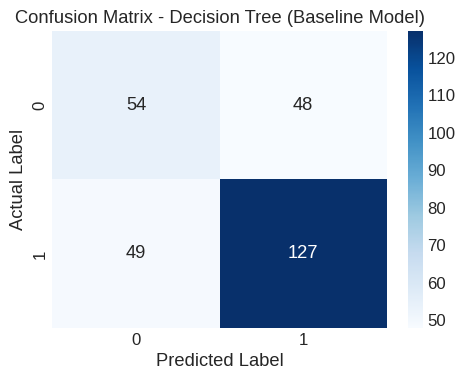

/tmp/ipython-input-1919207681.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='coolwarm')


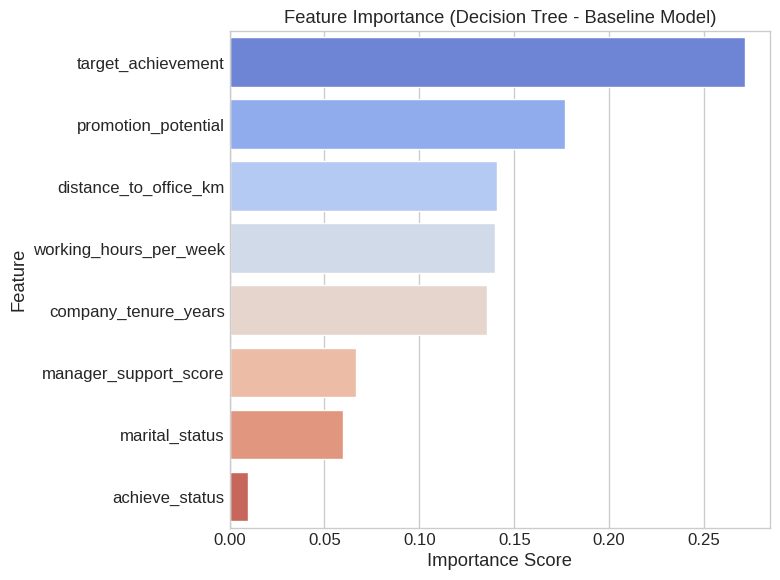


Top 10 most important features:


Feature  Importance
6      target_achievement    0.271358
7     promotion_potential    0.176534
2   distance_to_office_km    0.140905
3  working_hours_per_week    0.139590
1    company_tenure_years    0.135709
4   manager_support_score    0.066566
5          marital_status    0.059876
0          achieve_status    0.009462


Least important features:


Feature  Importance
6      target_achievement    0.271358
7     promotion_potential    0.176534
2   distance_to_office_km    0.140905
3  working_hours_per_week    0.139590
1    company_tenure_years    0.135709
4   manager_support_score    0.066566
5          marital_status    0.059876
0          achieve_status    0.009462

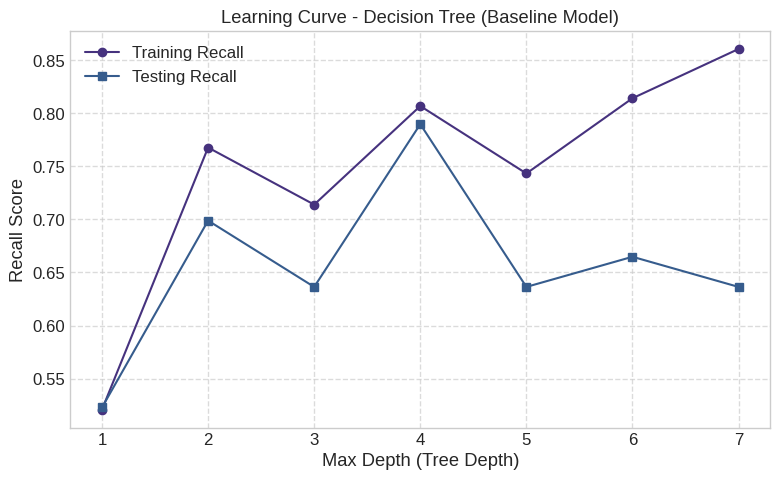

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'X_train_resampled' not in locals() or 'y_train_resampled' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    print("⚠️ Data training/testing belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)

    y_train_pred = dt.predict(X_train_resampled)
    y_train_prob = dt.predict_proba(X_train_resampled)[:, 1]
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_prec = precision_score(y_train_resampled, y_train_pred)
    train_rec = recall_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)

    y_test_pred = dt.predict(X_test)
    y_test_prob = dt.predict_proba(X_test)[:, 1]
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print("===== Decision Tree Baseline Model Evaluation =====\n")
    print("🔹 TRAINING PERFORMANCE")
    print(f"Accuracy  : {train_acc:.4f}")
    print(f"Precision : {train_prec:.4f}")
    print(f"Recall    : {train_rec:.4f}")
    print(f"F1-Score  : {train_f1:.4f}\n")
    print("🔹 TESTING PERFORMANCE")
    print(f"Accuracy  : {test_acc:.4f}")
    print(f"Precision : {test_prec:.4f}")
    print(f"Recall    : {test_rec:.4f}")
    print(f"F1-Score  : {test_f1:.4f}\n")
    print("===== Classification Report (Testing Set) =====")
    print(classification_report(y_test, y_test_pred, digits=4))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Decision Tree (Baseline Model)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

    feature_importance = pd.DataFrame({
        'Feature': X_train_resampled.columns,
        'Importance': dt.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='coolwarm')
    plt.title("Feature Importance (Decision Tree - Baseline Model)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    print("\nTop 10 most important features:")
    display(feature_importance.head(10))
    print("\nLeast important features:")
    display(feature_importance.tail(10))

    param_values = np.arange(1, min(20, X_train_resampled.shape[1]))
    train_recalls, test_recalls = [], []

    for d in param_values:
        model = DecisionTreeClassifier(max_depth=d, random_state=42)
        model.fit(X_train_resampled, y_train_resampled)
        y_train_pred = model.predict(X_train_resampled)
        y_test_pred = model.predict(X_test)
        train_recalls.append(recall_score(y_train_resampled, y_train_pred))
        test_recalls.append(recall_score(y_test, y_test_pred))

    plt.figure(figsize=(8, 5))
    plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
    plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
    plt.xlabel("Max Depth (Tree Depth)")
    plt.ylabel("Recall Score")
    plt.title("Learning Curve - Decision Tree (Baseline Model)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Decision Tree Hypertuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits
===== 🔍 Best Decision Tree Hyperparameters =====
{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 1, 'criterion': 'gini'}
Best CV Recall: 0.8460

===== Decision Tree Model Evaluation (After Random Search) =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.5306
Precision : 0.5187
Recall    : 0.8484
F1-Score  : 0.6438

🔹 TESTING PERFORMANCE
Accuracy  : 0.6439
Precision : 0.6696
Recall    : 0.8636
F1-Score  : 0.7543

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5294    0.2647    0.3529       102
           1     0.6696    0.8636    0.7543       176

    accuracy                         0.6439       278
   macro avg     0.5995    0.5642    0.5536       278
weighted avg     0.6182    0.6439    0.6071       278



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

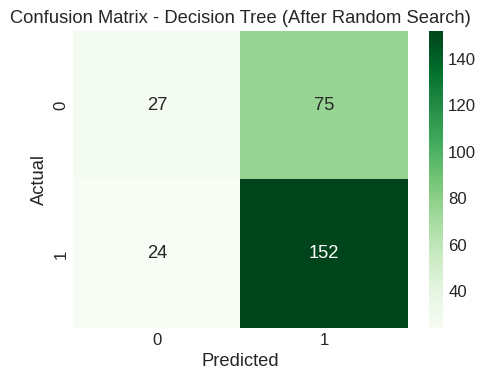

/tmp/ipython-input-3961686544.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')


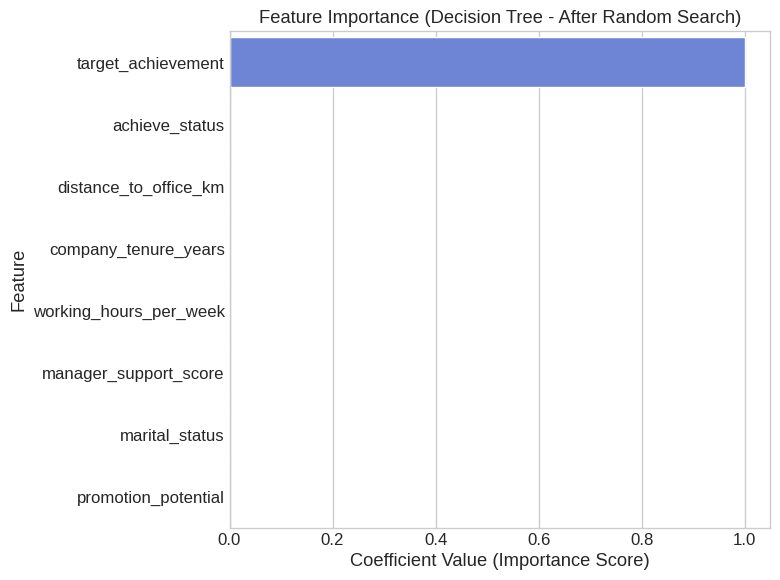


Top 10 positive coefficients (increase churn likelihood):
                  Feature  Coefficient
6      target_achievement          1.0
0          achieve_status          0.0
2   distance_to_office_km          0.0
1    company_tenure_years          0.0
3  working_hours_per_week          0.0
4   manager_support_score          0.0
5          marital_status          0.0
7     promotion_potential          0.0

Top 10 negative coefficients (decrease churn likelihood):
                  Feature  Coefficient
6      target_achievement          1.0
0          achieve_status          0.0
2   distance_to_office_km          0.0
1    company_tenure_years          0.0
3  working_hours_per_week          0.0
4   manager_support_score          0.0
5          marital_status          0.0
7     promotion_potential          0.0


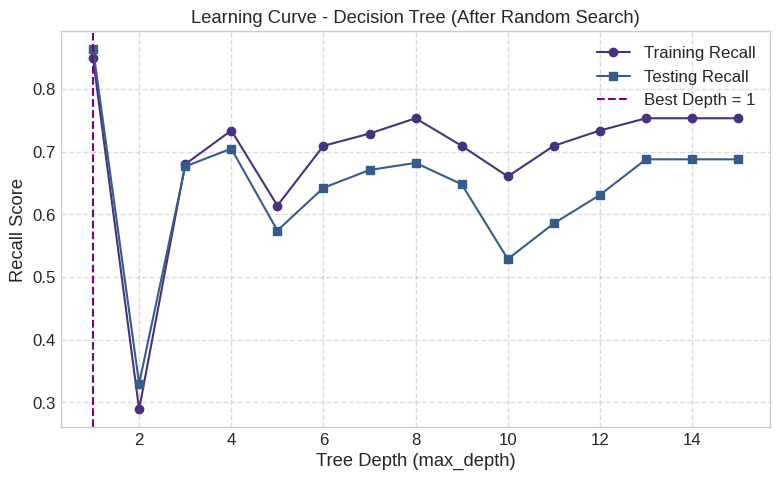

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if hasattr(X_train_resampled, "columns"):
    feature_names = X_train_resampled.columns
else:
    feature_names = getattr(X_train, "columns", [f"Feature_{i}" for i in range(np.asarray(X_train_resampled).shape[1])])

param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(0, 21)),
    'min_samples_split': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=40,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search_dt.fit(X_train_resampled, y_train_resampled)

print("===== 🔍 Best Decision Tree Hyperparameters =====")
print(random_search_dt.best_params_)
print(f"Best CV Recall: {random_search_dt.best_score_:.4f}\n")

best_dt = random_search_dt.best_estimator_

y_train_pred = best_dt.predict(X_train_resampled)
y_test_pred = best_dt.predict(X_test)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== Decision Tree Model Evaluation (After Random Search) =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree (After Random Search)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_dt.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Decision Tree - After Random Search)")
plt.xlabel("Coefficient Value (Importance Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 positive coefficients (increase churn likelihood):")
print(feature_importance.head(10))
print("\nTop 10 negative coefficients (decrease churn likelihood):")
print(feature_importance.tail(10))

param_values = np.arange(1, 16, 1)
train_recalls, test_recalls = [], []

for d in param_values:
    model = DecisionTreeClassifier(
        criterion=best_dt.criterion,
        max_depth=d,
        min_samples_split=best_dt.min_samples_split,
        min_samples_leaf=best_dt.min_samples_leaf,
        max_features=best_dt.max_features,
        splitter=best_dt.splitter,
        random_state=42
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

best_depth_curve = param_values[int(np.argmax(test_recalls))]
plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(best_depth_curve, color='purple', linestyle='--', label=f"Best Depth = {best_depth_curve}")
plt.xlabel("Tree Depth (max_depth)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Decision Tree (After Random Search)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Random Forest Base Model

===== Random Forest Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.9792
Precision : 0.9828
Recall    : 0.9756
F1-Score  : 0.9791

🔹 TESTING PERFORMANCE
Accuracy  : 0.6906
Precision : 0.7647
Recall    : 0.7386
F1-Score  : 0.7514

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5741    0.6078    0.5905       102
           1     0.7647    0.7386    0.7514       176

    accuracy                         0.6906       278
   macro avg     0.6694    0.6732    0.6710       278
weighted avg     0.6948    0.6906    0.6924       278



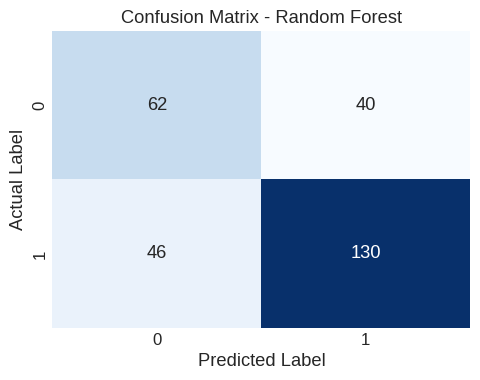

/tmp/ipython-input-3112908555.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')


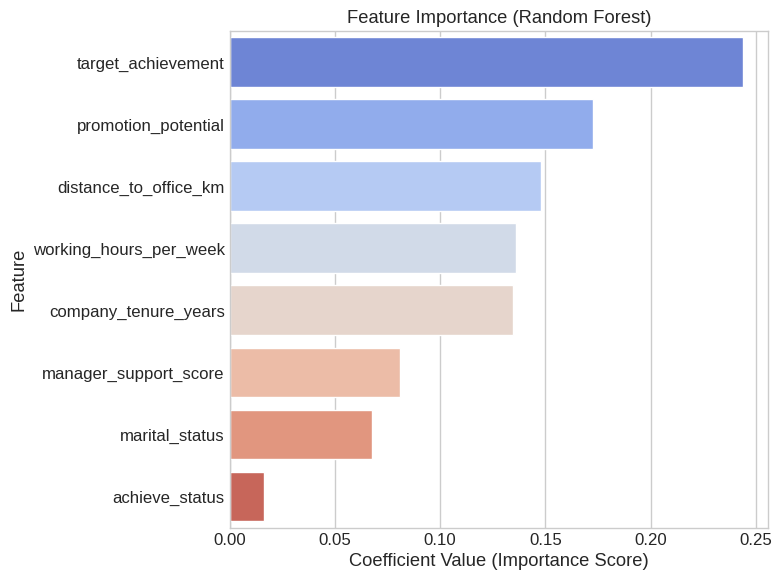


Top 10 positive coefficients (increase churn likelihood):
                  Feature  Coefficient
6      target_achievement     0.243664
7     promotion_potential     0.172488
2   distance_to_office_km     0.147993
3  working_hours_per_week     0.136192
1    company_tenure_years     0.134407
4   manager_support_score     0.081196
5          marital_status     0.067836
0          achieve_status     0.016224

Top 10 negative coefficients (decrease churn likelihood):
                  Feature  Coefficient
6      target_achievement     0.243664
7     promotion_potential     0.172488
2   distance_to_office_km     0.147993
3  working_hours_per_week     0.136192
1    company_tenure_years     0.134407
4   manager_support_score     0.081196
5          marital_status     0.067836
0          achieve_status     0.016224


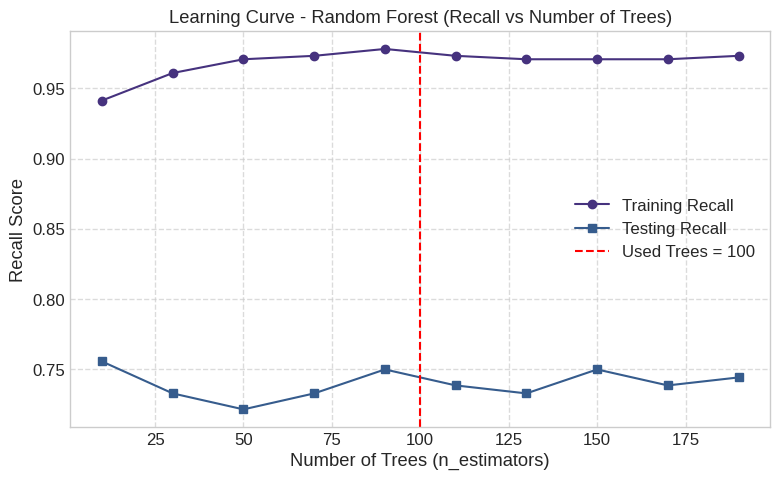

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf.predict(X_train_resampled)
y_train_prob = rf.predict_proba(X_train_resampled)[:, 1]
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== Random Forest Model Evaluation =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': rf.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Coefficient Value (Importance Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 positive coefficients (increase churn likelihood):")
print(feature_importance.head(10))
print("\nTop 10 negative coefficients (decrease churn likelihood):")
print(feature_importance.tail(10))

param_values = np.arange(10, 210, 20)
train_recalls, test_recalls = [], []

for n in param_values:
    model = RandomForestClassifier(
        n_estimators=n,
        criterion=rf.criterion,
        max_depth=rf.max_depth,
        min_samples_split=rf.min_samples_split,
        min_samples_leaf=rf.min_samples_leaf,
        max_features=rf.max_features,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(rf.n_estimators, color='red', linestyle='--', label=f"Used Trees = {rf.n_estimators}")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Random Forest (Recall vs Number of Trees)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Random Forest Hypertuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits
===== 🔍 Best Random Forest Hyperparameters =====
{'n_estimators': 80, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'log_loss', 'bootstrap': False}
Best CV Recall: 0.7799

===== Random Forest Model Evaluation (After Random Search) =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.9939
Precision : 1.0000
Recall    : 0.9878
F1-Score  : 0.9938

🔹 TESTING PERFORMANCE
Accuracy  : 0.6906
Precision : 0.7528
Recall    : 0.7614
F1-Score  : 0.7571

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5800    0.5686    0.5743       102
           1     0.7528    0.7614    0.7571       176

    accuracy                         0.6906       278
   macro avg     0.6664    0.6650    0.6657       278
weighted avg     0.6894    0.6906    0.6900       278



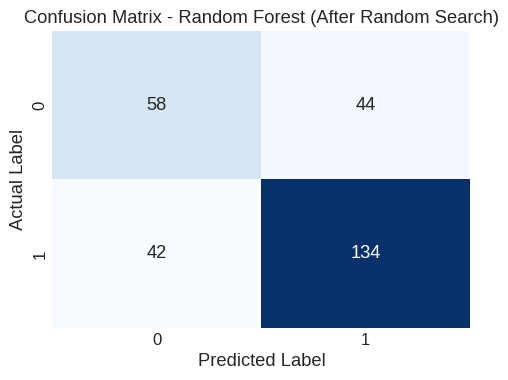

/tmp/ipython-input-1629258131.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')


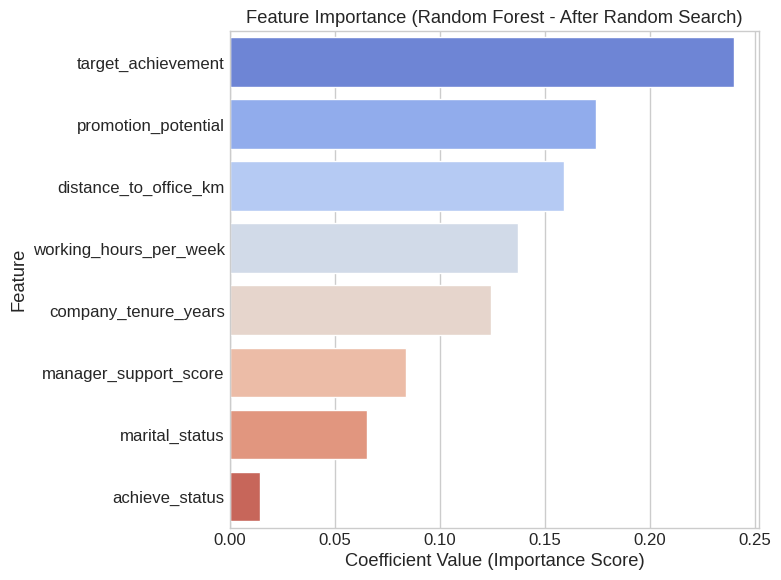


Top 10 most important features:
                  Feature  Coefficient
6      target_achievement     0.240196
7     promotion_potential     0.174554
2   distance_to_office_km     0.159421
3  working_hours_per_week     0.137518
1    company_tenure_years     0.124486
4   manager_support_score     0.083943
5          marital_status     0.065374
0          achieve_status     0.014506

Least important features:
                  Feature  Coefficient
6      target_achievement     0.240196
7     promotion_potential     0.174554
2   distance_to_office_km     0.159421
3  working_hours_per_week     0.137518
1    company_tenure_years     0.124486
4   manager_support_score     0.083943
5          marital_status     0.065374
0          achieve_status     0.014506


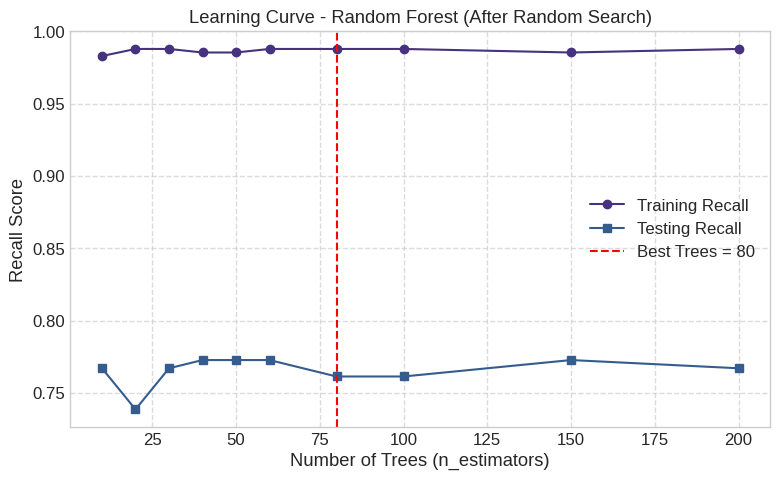

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

param_dist = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 80, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_rf.fit(X_train_resampled, y_train_resampled)

print("===== 🔍 Best Random Forest Hyperparameters =====")
print(random_search_rf.best_params_)
print(f"Best CV Recall: {random_search_rf.best_score_:.4f}\n")

best_rf = random_search_rf.best_estimator_

y_train_pred = best_rf.predict(X_train_resampled)
y_train_prob = best_rf.predict_proba(X_train_resampled)[:, 1]
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== Random Forest Model Evaluation (After Random Search) =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest (After Random Search)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': best_rf.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Random Forest - After Random Search)")
plt.xlabel("Coefficient Value (Importance Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(feature_importance.head(10))
print("\nLeast important features:")
print(feature_importance.tail(10))

param_values = [10, 20, 30, 40, 50, 60, 80, 100, 150, 200]
train_recalls, test_recalls = [], []

for n in param_values:
    model = RandomForestClassifier(
        n_estimators=n,
        criterion=best_rf.criterion,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        bootstrap=best_rf.bootstrap,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(best_rf.n_estimators, color='red', linestyle='--', label=f"Best Trees = {best_rf.n_estimators}")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Random Forest (After Random Search)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# XGBClassifier Base Model


===== XGBoost Baseline Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.8949
Precision : 0.9048
Recall    : 0.8826
F1-Score  : 0.8936

🔹 TESTING PERFORMANCE
Accuracy  : 0.6835
Precision : 0.7785
Recall    : 0.6989
F1-Score  : 0.7365

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5583    0.6569    0.6036       102
           1     0.7785    0.6989    0.7365       176

    accuracy                         0.6835       278
   macro avg     0.6684    0.6779    0.6701       278
weighted avg     0.6977    0.6835    0.6878       278



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


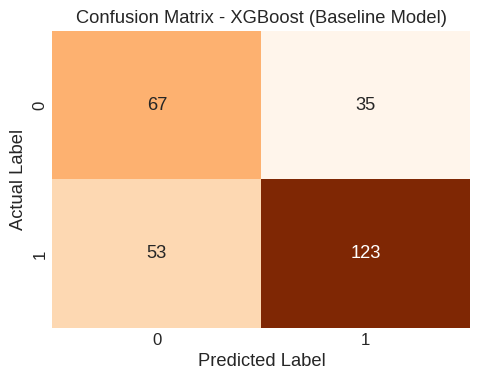

/tmp/ipython-input-931518468.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')


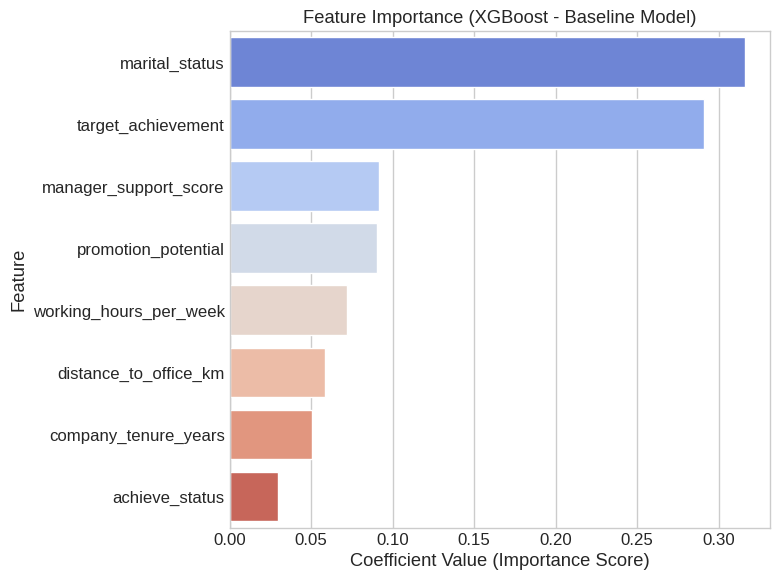

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 10 positive coefficients (increase churn likelihood):
                  Feature  Coefficient
5          marital_status     0.315977
6      target_achievement     0.290885
4   manager_support_score     0.091862
7     promotion_potential     0.090272
3  working_hours_per_week     0.072251
2   distance_to_office_km     0.058356
1    company_tenure_years     0.050722
0          achieve_status     0.029675

Top 10 negative coefficients (decrease churn likelihood):
                  Feature  Coefficient
5          marital_status     0.315977
6      target_achievement     0.290885
4   manager_support_score     0.091862
7     promotion_potential     0.090272
3  working_hours_per_week     0.072251
2   distance_to_office_km     0.058356
1    company_tenure_years     0.050722
0          achieve_status     0.029675


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:04] WARNING: /w

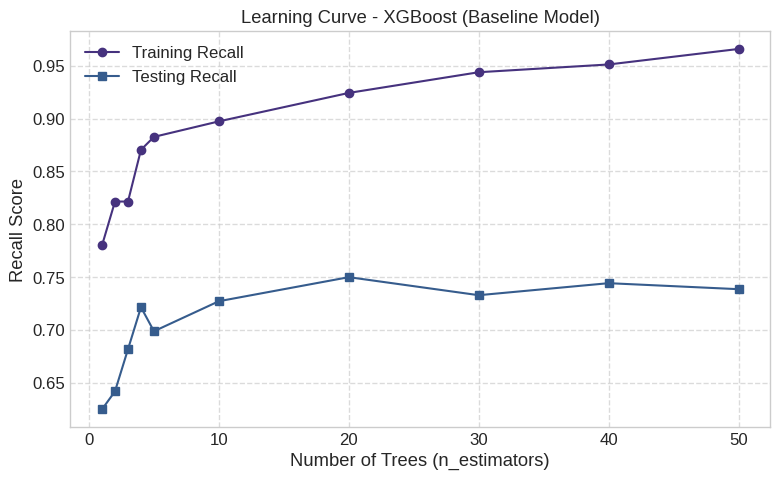

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=5,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_resampled, y_train_resampled)

y_train_pred = xgb.predict(X_train_resampled)
y_train_prob = xgb.predict_proba(X_train_resampled)[:, 1]
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

y_test_pred = xgb.predict(X_test)
y_test_prob = xgb.predict_proba(X_test)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== XGBoost Baseline Model Evaluation =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - XGBoost (Baseline Model)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': xgb.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (XGBoost - Baseline Model)")
plt.xlabel("Coefficient Value (Importance Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 positive coefficients (increase churn likelihood):")
print(feature_importance.head(10))
print("\nTop 10 negative coefficients (decrease churn likelihood):")
print(feature_importance.tail(10))

param_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
train_recalls, test_recalls = [], []

for n in param_values:
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=n,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - XGBoost (Baseline Model)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# XGBClassifier Hypertuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== 🔍 Best XGBoost Hyperparameters =====
{'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.3, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best CV Recall: 0.7751

===== XGBoost Model Evaluation (After Random Search) =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.9597
Precision : 0.9631
Recall    : 0.9560
F1-Score  : 0.9595

🔹 TESTING PERFORMANCE
Accuracy  : 0.7014
Precision : 0.7688
Recall    : 0.7557
F1-Score  : 0.7622

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.5905    0.6078    0.5990       102
           1     0.7688    0.7557    0.7622       176

    accuracy                         0.7014       278
   macro avg     0.6796    0.6818    0.6806       278
weighted avg     0.7034    0.7014    0.7023       278



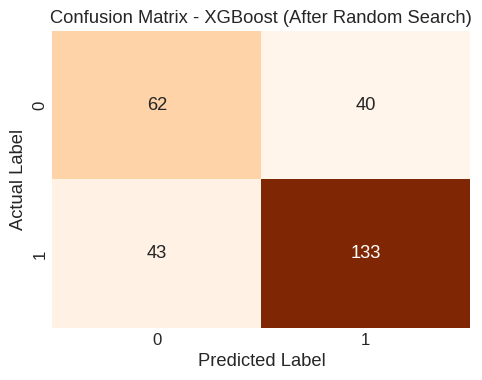

/tmp/ipython-input-2760057918.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')


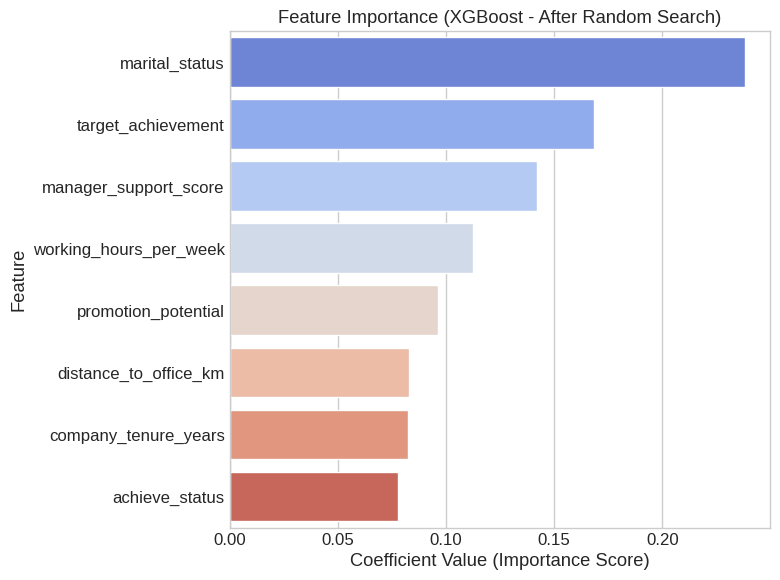


Top 10 most important features:
                  Feature  Coefficient
5          marital_status     0.237960
6      target_achievement     0.168457
4   manager_support_score     0.141987
3  working_hours_per_week     0.112260
7     promotion_potential     0.096337
2   distance_to_office_km     0.082695
1    company_tenure_years     0.082601
0          achieve_status     0.077705

Least important features:
                  Feature  Coefficient
5          marital_status     0.237960
6      target_achievement     0.168457
4   manager_support_score     0.141987
3  working_hours_per_week     0.112260
7     promotion_potential     0.096337
2   distance_to_office_km     0.082695
1    company_tenure_years     0.082601
0          achieve_status     0.077705


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:26] WARNING: /w

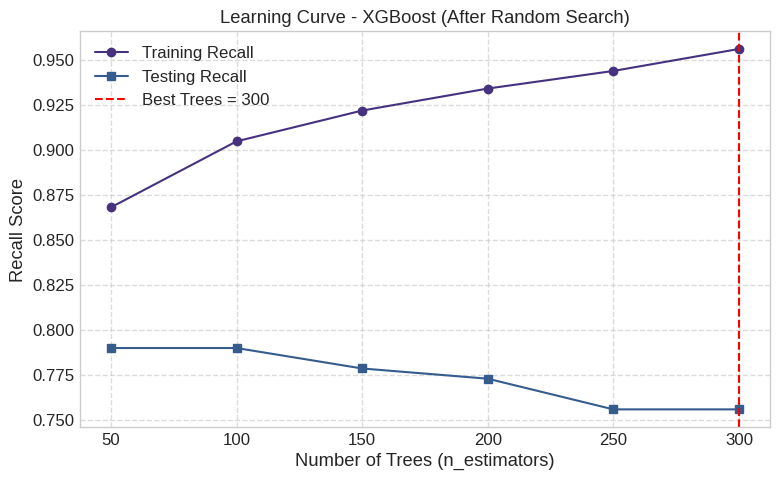

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [0.5, 1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.3, 0.5]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train_resampled, y_train_resampled)

print("===== 🔍 Best XGBoost Hyperparameters =====")
print(random_search_xgb.best_params_)
print(f"Best CV Recall: {random_search_xgb.best_score_:.4f}\n")

best_xgb = random_search_xgb.best_estimator_

y_train_pred = best_xgb.predict(X_train_resampled)
y_train_prob = best_xgb.predict_proba(X_train_resampled)[:, 1]
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

y_test_pred = best_xgb.predict(X_test)
y_test_prob = best_xgb.predict_proba(X_test)[:, 1]
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== XGBoost Model Evaluation (After Random Search) =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - XGBoost (After Random Search)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': best_xgb.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(15), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (XGBoost - After Random Search)")
plt.xlabel("Coefficient Value (Importance Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(feature_importance.head(10))
print("\nLeast important features:")
print(feature_importance.tail(10))

param_values = [50, 100, 150, 200, 250, 300]
train_recalls, test_recalls = [], []

for n in param_values:
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=n,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        min_child_weight=best_xgb.min_child_weight,
        reg_lambda=best_xgb.reg_lambda,
        reg_alpha=best_xgb.reg_alpha,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(best_xgb.n_estimators, color='red', linestyle='--', label=f"Best Trees = {best_xgb.n_estimators}")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - XGBoost (After Random Search)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# KNN Base Model

===== KNN Baseline Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.8264
Precision : 0.8761
Recall    : 0.7604
F1-Score  : 0.8141

🔹 TESTING PERFORMANCE
Accuracy  : 0.6043
Precision : 0.7089
Recall    : 0.6364
F1-Score  : 0.6707

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.4667    0.5490    0.5045       102
           1     0.7089    0.6364    0.6707       176

    accuracy                         0.6043       278
   macro avg     0.5878    0.5927    0.5876       278
weighted avg     0.6200    0.6043    0.6097       278



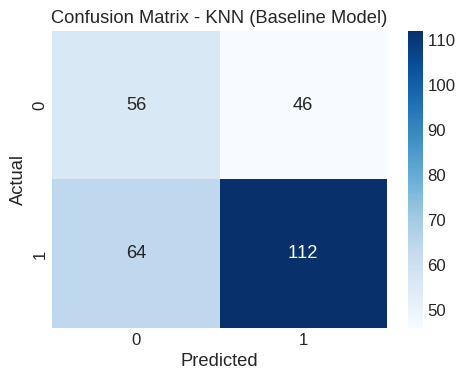

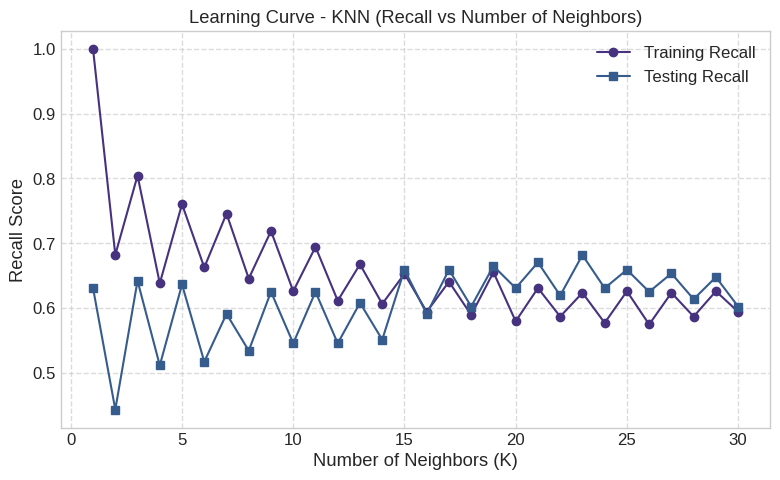

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2, n_jobs=-1)
knn.fit(X_train_resampled, y_train_resampled)

y_train_pred = knn.predict(X_train_resampled)
y_test_pred = knn.predict(X_test)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== KNN Baseline Model Evaluation =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}")
print("\n🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}")
print("\n===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN (Baseline Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

param_values = np.arange(1, 31)
train_recalls, test_recalls = [], []

for k in param_values:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - KNN (Recall vs Number of Neighbors)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# KNN Hyperparametertuning

Fitting 5 folds for each of 40 candidates, totalling 200 fits
===== 🔍 Best KNN Hyperparameters =====
{'weights': 'distance', 'p': 2, 'n_neighbors': 4, 'metric': 'minkowski'}
Best CV Recall: 0.6478

===== KNN Model Evaluation (After Random Search) =====

🔹 TRAINING PERFORMANCE
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

🔹 TESTING PERFORMANCE
Accuracy  : 0.6079
Precision : 0.7161
Recall    : 0.6307
F1-Score  : 0.6707

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.4715    0.5686    0.5156       102
           1     0.7161    0.6307    0.6707       176

    accuracy                         0.6079       278
   macro avg     0.5938    0.5997    0.5931       278
weighted avg     0.6264    0.6079    0.6138       278



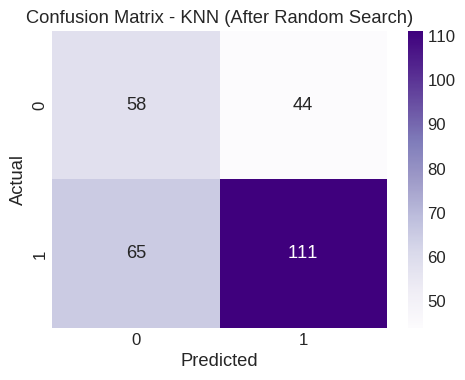

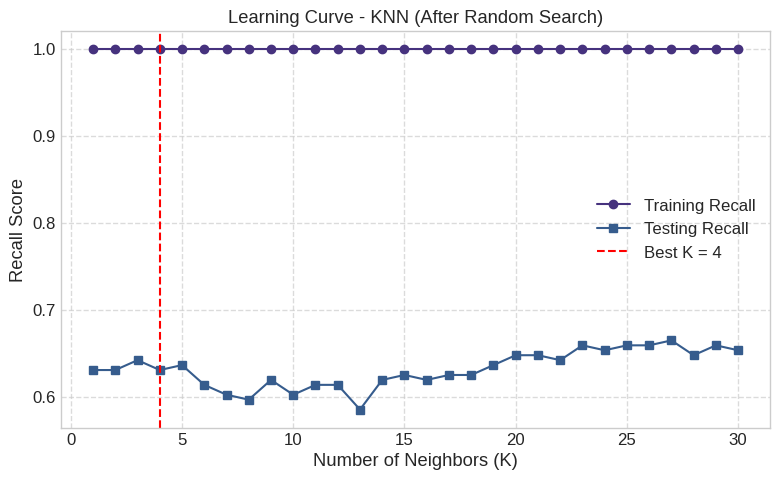

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

param_dist = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

knn = KNeighborsClassifier(n_jobs=-1)

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=40,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_knn.fit(X_train_resampled, y_train_resampled)

print("===== 🔍 Best KNN Hyperparameters =====")
print(random_search_knn.best_params_)
print(f"Best CV Recall: {random_search_knn.best_score_:.4f}\n")

best_knn = random_search_knn.best_estimator_

y_train_pred = best_knn.predict(X_train_resampled)
y_test_pred = best_knn.predict(X_test)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("===== KNN Model Evaluation (After Random Search) =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}")
print("\n🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}")
print("\n===== Classification Report (Testing Set) =====")
print(classification_report(y_test, y_test_pred, digits=4))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - KNN (After Random Search)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

param_values = np.arange(1, 31)
train_recalls, test_recalls = [], []

for k in param_values:
    model = KNeighborsClassifier(
        n_neighbors=k,
        weights=best_knn.weights,
        metric=best_knn.metric,
        p=best_knn.p,
        n_jobs=-1
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    train_recalls.append(recall_score(y_train_resampled, y_train_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_recalls, marker='o', label="Training Recall")
plt.plot(param_values, test_recalls, marker='s', label="Testing Recall")
plt.axvline(best_knn.n_neighbors, color='red', linestyle='--', label=f"Best K = {best_knn.n_neighbors}")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - KNN (After Random Search)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Evaluasi & Interpretasion

In [ ]:
Model_report = pd.read_csv('report.csv')

In [ ]:
Model_report


Model  Tuning  Training Recall  Testing Recall  \
0  Logistic Regression   After           0.7824          0.7216   
1        Decision Tree   After           0.8484          0.8636   
2        Random Forest   After           0.9878          0.7614   
3              XGBoost   After           0.9560          0.7557   
4  Logistic Regression  Before           0.7495          0.6780   
5        Decision Tree  Before           1.0000          0.7881   
6        Random Forest  Before           0.9756          0.7386   
7              XGBoost  Before           0.8826          0.6989   
8                  KNN   After           1.0000          0.6307   
9                  KNN  Before           0.7604          0.6364   

   Training F1-Score  Testing F1-Score  Gap F1-Score  \
0             0.7795            0.7744        0.0051   
1             0.6438            0.7543       -0.1105   
2             0.9938            0.7571        0.2367   
3             0.9595            0.7622        0.1973   
4             0.7527            0.7373        0.0154   
5             1.0000            0.7881        0.2119   
6             0.9791            0.7514        0.2277   
7             0.8936            0.7365        0.1571   
8             1.0000            0.6707        0.3293   
9             0.8141            0.6707        0.1434   

                               Keterangan  
0                    Sangat Stabil & Baik  
1  Recall Tinggi, Performa Tidak Seimbang  
2                     Overfitting Ekstrem  
3                     Overfitting Ekstrem  
4                            Cukup Stabil  
5                     Overfitting Ekstrem  
6                     Overfitting Ekstrem  
7                             Overfitting  
8                Overfitting Paling Parah  
9                             Overfitting

## Best Model

The selection of the best model winner is Logistic Regression after tuning
this is the reason:

- Trustworthy Model: With a very small difference in training and testing performance, we can trust that this model will perform well on new employee data in the future. The performance will not drop suddenly. It is a stable model and generalization is good.

- Balanced Performance: This model not only has a good Recall, but also a high F1-Score (0.7744), which is one of the best among all stable models. This shows it finds a good balance between catching churn cases (Recall) and not making too many false alarms (Precision).

- Avoiding Hidden Risks: Choosing the Decision Tree with the highest Recall is tempting. However, its lower other performance indicates the risk that the model might just "guess churn" more often to get a high Recall, which could be inefficient in practice. In contrast, Logistic Regression delivers solid results across all metrics.


# Logistic Reg (Split Test 70:30)

In [ ]:
# Split Test 70:30

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape :", x_train_lr.shape)
print("Testing set shape  :", x_test_lr.shape)

SM = SMOTE(random_state=42)
x_train_lr_resampled, y_train_lr_resampled = SM.fit_resample(x_train_lr, y_train_lr)

print("\nDistribusi kelas sebelum SMOTE:")
print(Counter(y_train_lr))

print("Distribusi kelas setelah SMOTE:")
print(Counter(y_train_lr_resampled))

Training set shape : (648, 8)
Testing set shape  : (278, 8)

Distribusi kelas sebelum SMOTE:
Counter({1: 412, 0: 236})
Distribusi kelas setelah SMOTE:
Counter({0: 412, 1: 412})


In [ ]:
# Modelling

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_lr_resampled, y_train_lr_resampled)

y_train_pred = log_reg.predict(x_train_lr_resampled)
y_train_prob = log_reg.predict_proba(x_train_lr_resampled)[:, 1]
train_acc = accuracy_score(y_train_lr_resampled, y_train_pred)
train_prec = precision_score(y_train_lr_resam
                             pled, y_train_pred)
train_rec = recall_score(y_train_lr_resampled, y_train_pred)
train_f1 = f1_score(y_train_lr_resampled, y_train_pred)

y_test_pred = log_reg.predict(x_test_lr)
y_test_prob = log_reg.predict_proba(x_test_lr)[:, 1]
test_acc = accuracy_score(y_test_lr, y_test_pred)
test_prec = precision_score(y_test_lr, y_test_pred)
test_rec = recall_score(y_test_lr, y_test_pred)
test_f1 = f1_score(y_test_lr, y_test_pred)

print("===== Logistic Regression Model Evaluation =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test_lr, y_test_pred, digits=4))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_lr, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importance = pd.DataFrame({
    'Feature': x_train_lr_resampled.columns,
        'Coefficient': log_reg.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 positive coefficients (increase churn likelihood):")
print(feature_importance.head(10))
print("\nTop 10 negative coefficients (decrease churn likelihood):")
print(feature_importance.tail(10))

from sklearn.metrics import recall_score
param_values = [float(x) for x in np.logspace(-3, 2, 20)]
train_lr_recalls, test_lr_recalls = [], []

for p in param_values:
    model = LogisticRegression(C=p, max_iter=2000, random_state=42)
    model.fit(x_train_lr_resampled, y_train_lr_resampled)
    y_train_pred = model.predict(x_train_lr_resampled)
    y_test_pred = model.predict(x_test_lr)
    train_lr_recalls.append(recall_score(y_train_lr_resampled, y_train_pred))
    test_lr_recalls.append(recall_score(y_test_lr, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_lr_recalls, label="Training Recall", marker='o')
plt.plot(param_values, test_lr_recalls, label="Testing Recall", marker='s')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Logistic Regression (Recall vs C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-2064034181.py, line 9)

# Logistic Regression (Split test 75:25)

In [ ]:
# Split data set (75:25)

x_train_lr2, x_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape :", x_train_lr2.shape)
print("Testing set shape  :", x_test_lr2.shape)

# Handling Imbalance


SM = SMOTE(random_state=42)
x_train_lr2_resampled, y_train_lr2_resampled = SM.fit_resample(x_train_lr2, y_train_lr2)

print("\nDistribusi kelas sebelum SMOTE:")
print(Counter(y_train_lr2))
print("Distribusi kelas setelah SMOTE:")
print(Counter(y_train_lr2_resampled))

Training set shape : (694, 8)
Testing set shape  : (232, 8)

Distribusi kelas sebelum SMOTE:
Counter({1: 443, 0: 251})
Distribusi kelas setelah SMOTE:
Counter({1: 443, 0: 443})


===== Logistic Regression Model Evaluation =====

🔹 TRAINING PERFORMANCE
Accuracy  : 0.7912
Precision : 0.7932
Recall    : 0.7878
F1-Score  : 0.7905

🔹 TESTING PERFORMANCE
Accuracy  : 0.7328
Precision : 0.7857
Recall    : 0.7746
F1-Score  : 0.7801

===== Classification Report (Testing Set) =====
              precision    recall  f1-score   support

           0     0.6522    0.6667    0.6593        90
           1     0.7857    0.7746    0.7801       142

    accuracy                         0.7328       232
   macro avg     0.7189    0.7207    0.7197       232
weighted avg     0.7339    0.7328    0.7333       232



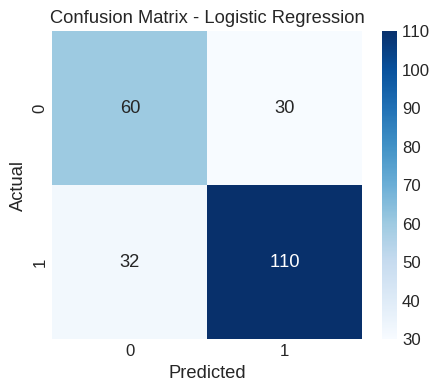

/tmp/ipython-input-649573646.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')


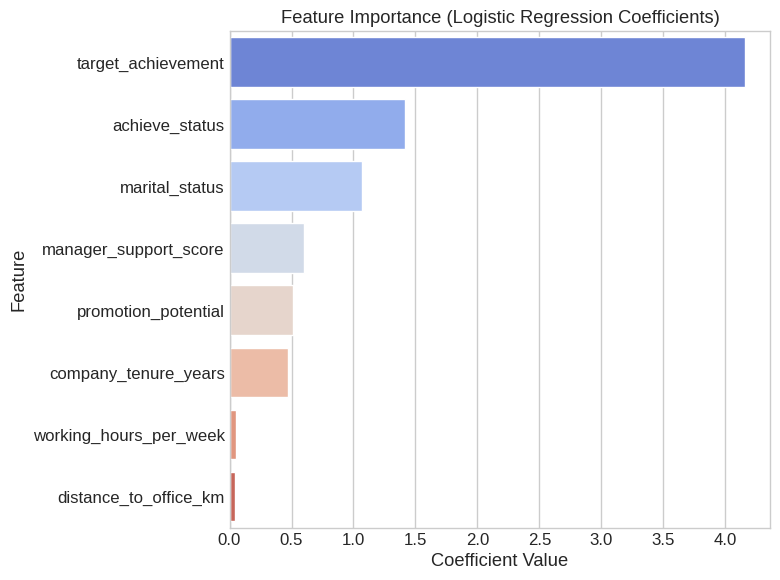


Top 10 positive coefficients (increase churn likelihood):
                  Feature  Coefficient
6      target_achievement     4.156319
0          achieve_status     1.419640
5          marital_status     1.065826
4   manager_support_score     0.599733
7     promotion_potential     0.513178
1    company_tenure_years     0.468011
3  working_hours_per_week     0.052243
2   distance_to_office_km     0.046654

Top 10 negative coefficients (decrease churn likelihood):
                  Feature  Coefficient
6      target_achievement     4.156319
0          achieve_status     1.419640
5          marital_status     1.065826
4   manager_support_score     0.599733
7     promotion_potential     0.513178
1    company_tenure_years     0.468011
3  working_hours_per_week     0.052243
2   distance_to_office_km     0.046654


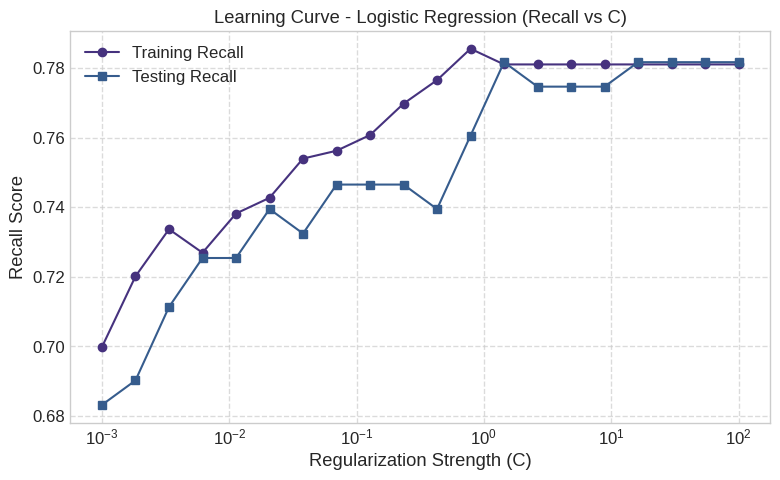

In [ ]:
# Modelling

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_lr2_resampled, y_train_lr2_resampled)

y_train_pred = log_reg.predict(x_train_lr2_resampled)
y_train_prob = log_reg.predict_proba(x_train_lr2_resampled)[:, 1]
train_acc = accuracy_score(y_train_lr2_resampled, y_train_pred)
train_prec = precision_score(y_train_lr2_resampled, y_train_pred)
train_rec = recall_score(y_train_lr2_resampled, y_train_pred)
train_f1 = f1_score(y_train_lr2_resampled, y_train_pred)

y_test_pred = log_reg.predict(x_test_lr2)
y_test_prob = log_reg.predict_proba(x_test_lr2)[:, 1]
test_acc = accuracy_score(y_test_lr2, y_test_pred)
test_prec = precision_score(y_test_lr2, y_test_pred)
test_rec = recall_score(y_test_lr2, y_test_pred)
test_f1 = f1_score(y_test_lr2, y_test_pred)

print("===== Logistic Regression Model Evaluation =====\n")
print("🔹 TRAINING PERFORMANCE")
print(f"Accuracy  : {train_acc:.4f}")
print(f"Precision : {train_prec:.4f}")
print(f"Recall    : {train_rec:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")
print("🔹 TESTING PERFORMANCE")
print(f"Accuracy  : {test_acc:.4f}")
print(f"Precision : {test_prec:.4f}")
print(f"Recall    : {test_rec:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")
print("===== Classification Report (Testing Set) =====")
print(classification_report(y_test_lr2, y_test_pred, digits=4))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_lr2, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importance = pd.DataFrame({
    'Feature': x_train_lr2_resampled.columns,
        'Coefficient': log_reg.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\nTop 10 positive coefficients (increase churn likelihood):")
print(feature_importance.head(10))
print("\nTop 10 negative coefficients (decrease churn likelihood):")
print(feature_importance.tail(10))

from sklearn.metrics import recall_score
param_values = [float(x) for x in np.logspace(-3, 2, 20)]
train_lr_recalls, test_lr_recalls = [], []

for p in param_values:
    model = LogisticRegression(C=p, max_iter=2000, random_state=42)
    model.fit(x_train_lr2_resampled, y_train_lr2_resampled)
    y_train_pred = model.predict(x_train_lr2_resampled)
    y_test_pred = model.predict(x_test_lr2)
    train_lr_recalls.append(recall_score(y_train_lr2_resampled, y_train_pred))
    test_lr_recalls.append(recall_score(y_test_lr2, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(param_values, train_lr_recalls, label="Training Recall", marker='o')
plt.plot(param_values, test_lr_recalls, label="Testing Recall", marker='s')
plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Recall Score")
plt.title("Learning Curve - Logistic Regression (Recall vs C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Explainable AI: SHAP

In [ ]:
!pip install shap

NameError: name 'shap_values' is not defined

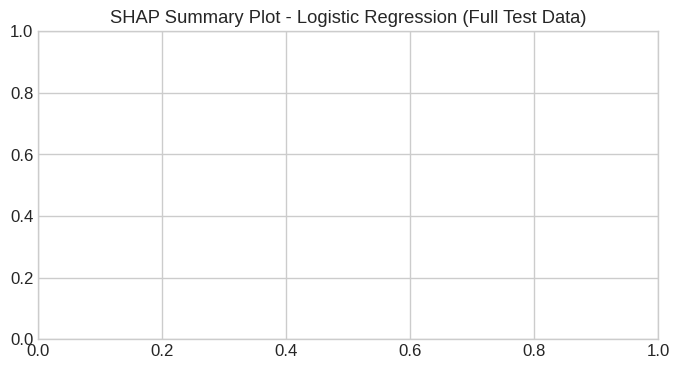

In [ ]:
import shap
import matplotlib.pyplot as plt

# ==========================================================
# 1️⃣ SHAP Summary Plot (Overall Feature Impact)
# ==========================================================
plt.title("SHAP Summary Plot - Logistic Regression (Full Test Data)")
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=selected_features)
plt.show()

# ==========================================================
# 2️⃣ SHAP Bar Plot (Mean Absolute SHAP Value)
# ==========================================================
plt.title("SHAP Feature Importance (mean |SHAP|) - Logistic Regression")
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=selected_features, plot_type="bar")
plt.show()

# ==========================================================
# 3️⃣ SHAP Explanation for One Employee (Waterfall)
# ==========================================================
idx = 5
X_single = X_test_scaled_df.iloc[[idx]]

print(f"\n🔍 Contoh interpretasi untuk 1 karyawan (index = {idx})")
shap_value_single = explainer.shap_values(X_single)

# Waterfall Plot
plt.title(f"SHAP Waterfall Plot - Sample {idx}")
shap.plots.waterfall(
    shap.Explanation(
        values=shap_value_single[0],
        base_values=explainer.expected_value,
        data=X_single.values[0],
        feature_names=selected_features
    )
)
plt.show()


#Explainable AI: LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7845dee2b43c09e71f48d40860c16ac4bf36f889bf1d35a3506d78787b3f5ec0
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



🎯 Sample index: 5
Predicted class: Churn
Prediction probabilities: Not Churn = 0.105, Churn = 0.895


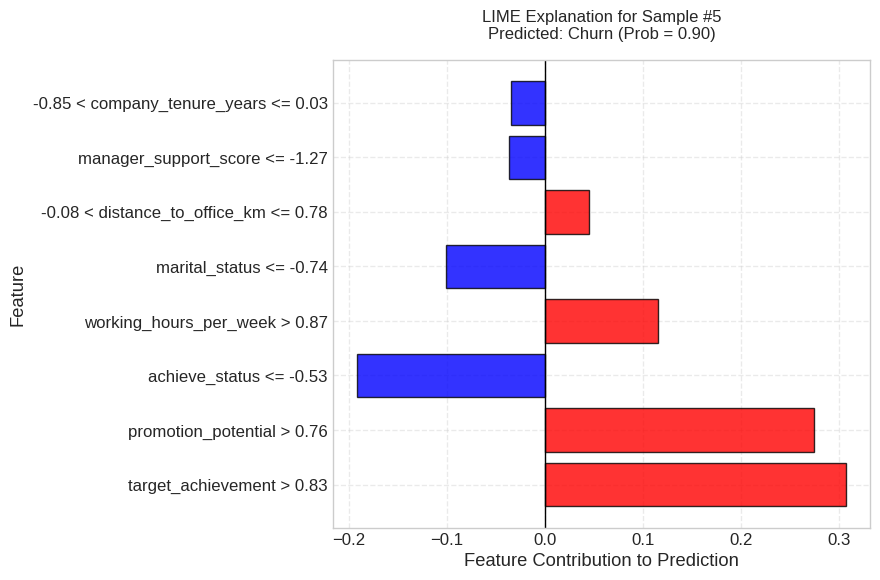


===== LIME Feature Contribution Table =====


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

explainer = LimeTabularExplainer(
    training_data=X_train_scaled_df.values,
    feature_names=selected_features,
    class_names=['Not Churn', 'Churn'],
    mode='classification',
    discretize_continuous=True
)


i = 5
sample = X_test_scaled_df.iloc[i]
sample_array = sample.values.reshape(1, -1)

pred_class = best_log_reg.predict(sample_array)[0]
pred_prob = best_log_reg.predict_proba(sample_array)[0]

print(f"\n🎯 Sample index: {i}")
print(f"Predicted class: {'Churn' if pred_class == 1 else 'Not Churn'}")
print(f"Prediction probabilities: Not Churn = {pred_prob[0]:.3f}, Churn = {pred_prob[1]:.3f}")

exp = explainer.explain_instance(
    data_row=sample.values,
    predict_fn=best_log_reg.predict_proba,
    num_features=8
)

lime_result = pd.DataFrame(exp.as_list(), columns=['Feature', 'Weight'])
lime_result['Color'] = np.where(lime_result['Weight'] > 0, 'red', 'blue')

plt.figure(figsize=(9, 6))
bars = plt.barh(
    lime_result['Feature'],
    lime_result['Weight'],
    color=lime_result['Color'],
    edgecolor='black',
    alpha=0.8
)

plt.axvline(0, color='black', linewidth=1)
plt.title(
    f"LIME Explanation for Sample #{i}\nPredicted: {'Churn' if pred_class == 1 else 'Not Churn'} "
    f"(Prob = {pred_prob[1]:.2f})",
    fontsize=12, pad=15
)
plt.xlabel("Feature Contribution to Prediction")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

print("\n===== LIME Feature Contribution Table =====")
display(lime_result.style.bar(subset=['Weight'], color=['#5fba7d', '#f28b82']))

# Bias & Fairness Asessment

--- 1. Mempersiapkan Data untuk Analisis ---
Data analisis siap.

--- 2. Stratifikasi FitUR 'age' (Usia) ---
Kelompok usia dibuat: ['18-30', '31-40', '41-50', '51-65']

Fungsi 'calculate_fairness_metrics' siap digunakan.

--- 4. Menjalankan Analisis GroupBy ---

===== Hasil Asesmen Fairness berdasarkan: gender =====
        Count    Recall  F1-Score  FNR (Miss Rate)  FPR (False Alarm)
gender                                                               
Female   67.0  0.641026  0.666667         0.358974           0.392857
Male    165.0  0.825243  0.821256         0.174757           0.306452


/tmp/ipython-input-854339884.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_results = analysis_df.groupby(feature).apply(calculate_fairness_metrics)



===== Hasil Asesmen Fairness berdasarkan: work_location =====
               Count    Recall  F1-Score  FNR (Miss Rate)  FPR (False Alarm)
work_location                                                               
Rural           37.0  0.850000  0.809524         0.150000           0.294118
Suburban        75.0  0.808511  0.800000         0.191489           0.357143
Urban          120.0  0.733333  0.758621         0.266667           0.333333


/tmp/ipython-input-854339884.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_results = analysis_df.groupby(feature).apply(calculate_fairness_metrics)



===== Hasil Asesmen Fairness berdasarkan: age_group =====
           Count    Recall  F1-Score  FNR (Miss Rate)  FPR (False Alarm)
age_group                                                               
18-30       70.0  0.795455  0.813953         0.204545           0.269231
31-40      104.0  0.781250  0.769231         0.218750           0.400000
41-50       58.0  0.735294  0.757576         0.264706           0.291667
51-65        0.0  0.000000  0.000000         0.000000           0.000000


/tmp/ipython-input-854339884.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_results = analysis_df.groupby(feature).apply(calculate_fairness_metrics)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-854339884.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping c


=== Analisis Fairness Selesai ===


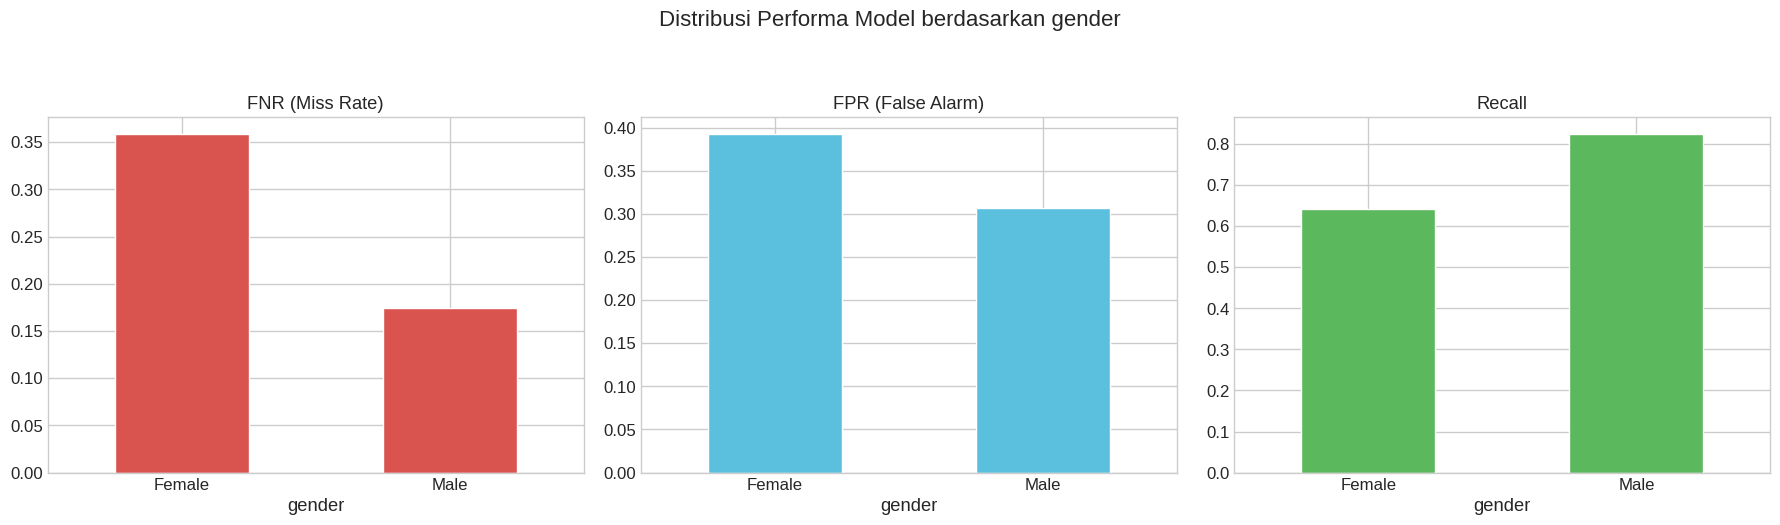

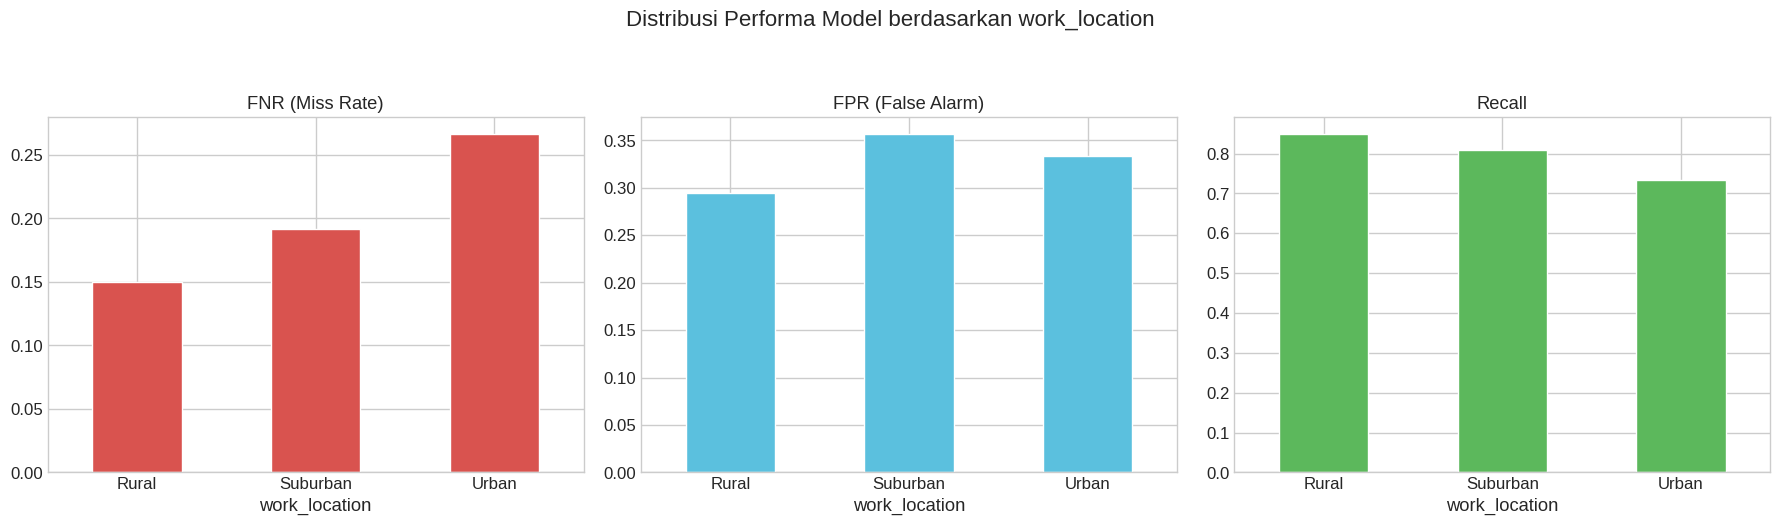

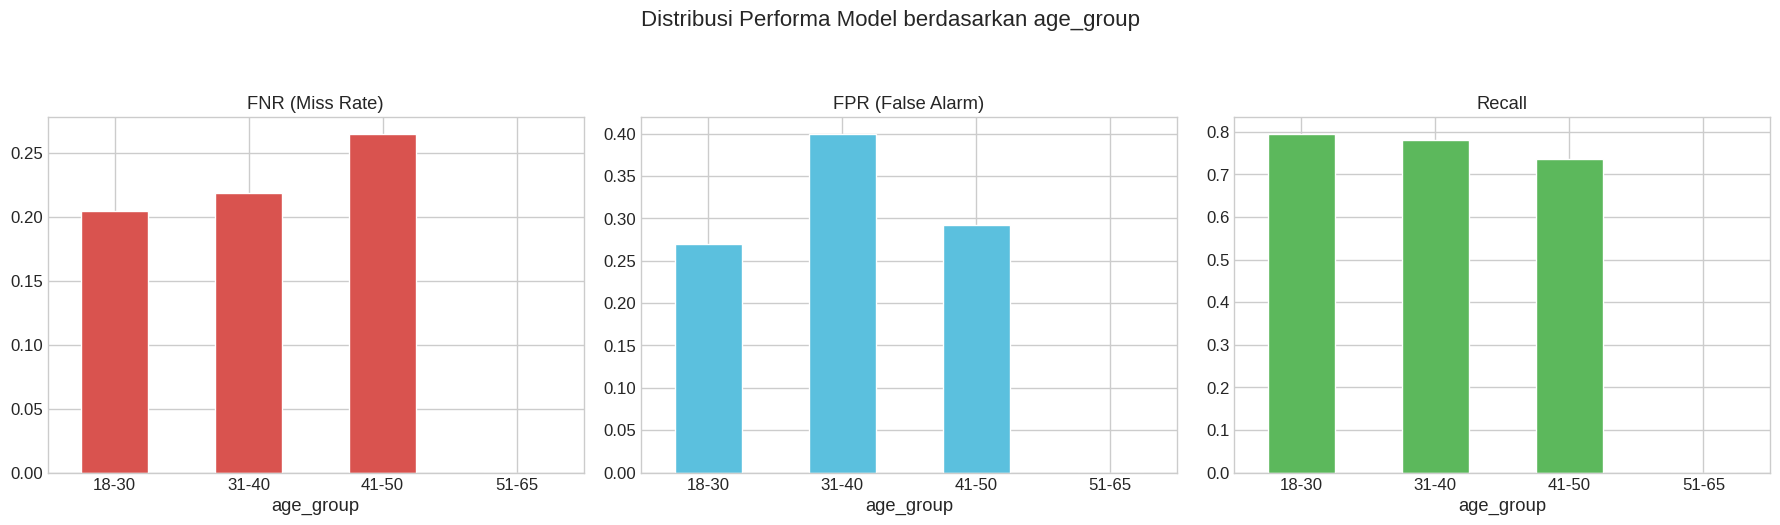

In [ ]:
print("--- 1. Mempersiapkan Data untuk Analisis ---")
# Replika model
y_pred = log_reg.predict(x_test_lr2)
# Ambil index dari data test
test_indices = x_test_lr2.index
# Buat DataFrame analisis baru dengan mengambil data asli berdasarkan index
analysis_df = df.loc[test_indices].copy()
# Tambahkan label aktual (dari y_test_lr2) dan label prediksi (dari y_pred)
analysis_df['actual_churn'] = y_test_lr2
analysis_df['predicted_churn'] = y_pred
# Hapus baris yang mungkin memiliki data kosong (jika ada)
analysis_df = analysis_df.dropna(subset=['gender', 'age', 'work_location', 'actual_churn', 'predicted_churn'])
print("Data analisis siap.\n")

print("--- 2. Stratifikasi FitUR 'age' (Usia) ---")

# Buat kelompok usia (bins)
# Anda bisa sesuaikan rentang usia ini jika perlu
bins = [18, 30, 40, 50, 65]
labels = ['18-30', '31-40', '41-50', '51-65']
analysis_df['age_group'] = pd.cut(analysis_df['age'], bins=bins, labels=labels, right=False)
print(f"Kelompok usia dibuat: {labels}\n")

# Membuat fungsi groupby untuk performa metrik
def calculate_fairness_metrics(group):
    """
    Menghitung metrik performa dan fairness untuk subgroup.
    Fokus pada FNR (Tingkat Kecolongan) dan FPR (Alarm Palsu).
    """
    # Dapatkan TP, FP, TN, FN
    # labels=[0, 1] memastikan urutan [TN, FP, FN, TP] benar
    try:
        tn, fp, fn, tp = confusion_matrix(group['actual_churn'], group['predicted_churn'], labels=[0, 1]).ravel()
    except ValueError:
        # Jika satu kelompok tidak memiliki kasus (misal: tidak ada churn)
        return pd.Series({
            'Count': len(group),
            'Recall': 0, 'F1-Score': 0,
            'FNR (Miss Rate)': 0, 'FPR (False Alarm)': 0
        })

    total_positive = tp + fn
    total_negative = tn + fp

    # Hitung metrik standar
    recall = tp / total_positive if total_positive > 0 else 0
    f1 = f1_score(group['actual_churn'], group['predicted_churn'])

    # --- Metrik Kritis untuk Fairness ---

    # FNR (False Negative Rate) atau Tingkat "Kecolongan"
    # Seberapa sering model gagal mendeteksi churn yang sebenarnya terjadi?
    fnr = fn / total_positive if total_positive > 0 else 0

    # FPR (False Positive Rate) atau Tingkat "Alarm Palsu"
    # Seberapa sering model salah menuduh karyawan akan churn?
    fpr = fp / total_negative if total_negative > 0 else 0

    return pd.Series({
        'Count': len(group),
        'Recall': recall,
        'F1-Score': f1,
        'FNR (Miss Rate)': fnr,
        'FPR (False Alarm)': fpr
    })

print("Fungsi 'calculate_fairness_metrics' siap digunakan.\n")

print("--- 4. Menjalankan Analisis GroupBy ---")

# 'kota' kita gunakan 'work_location'
features_to_assess = ['gender', 'work_location', 'age_group']
results = {}

for feature in features_to_assess:
    print(f"\n===== Hasil Asesmen Fairness berdasarkan: {feature} =====")

    # Terapkan fungsi groupby
    grouped_results = analysis_df.groupby(feature).apply(calculate_fairness_metrics)
    print(grouped_results.to_string())
    results[feature] = grouped_results

    # --- Visualisasi ---
    # Kita fokuskan visualisasi pada metrik kesalahan: FNR dan FPR
    plot_metrics = ['FNR (Miss Rate)', 'FPR (False Alarm)', 'Recall']
    fig = grouped_results[plot_metrics].plot(
        kind='bar',
        subplots=True,
        layout=(1, 3),
        figsize=(18, 5),
        legend=False,
        rot=0,
        color=['#d9534f', '#5bc0de', '#5cb85c'] # Warna untuk FNR, FPR, Recall
    )

    plt.suptitle(f'Distribusi Performa Model berdasarkan {feature}', fontsize=16, y=1.05)
    plt.tight_layout()

print("\n=== Analisis Fairness Selesai ===")